<a href="https://colab.research.google.com/github/SinghSaheb44/Modelling-the-Crypto-Market-using-XGBoost-/blob/main/XGBoost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1680]:
import numpy as np



In [1681]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# Define the ticker symbol for Bitcoin
btc_ticker = "BTC-USD"

# Download the historical data for the given date range
btc_data = yf.download(btc_ticker, start="2018-01-01", end="2022-12-31")

# Display the first few rows of the data
print(btc_data)

[*********************100%***********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                  ...           ...           ...           ...   
2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688   
2022-12-27  16919.291016  16959.845703  16642.072266  16717.173828   
2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266   
2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797   
2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   

               Adj Close       Volume  
Date                                   
2018-01-0

# New Section

In [1682]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1683]:

file_path='/content/drive/My Drive/bitcoin_usd.csv'
df=pd.read_csv(file_path)
df_inverted = df.iloc[::-1]
df_inverted = df_inverted.reset_index(drop=True)
df =df_inverted
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap  
0     13577.188555  9.527935e+09  2.292229e+11  
1     14938.176676  1.151926e+10  2.345984e+11  
2     15079.152185  1.548623e+10  2.538832e+11  
3     15163.898948  1.785376e+10  2.510367e+11  
4     16989.161482  1.960998e+10  2.718434e+11  
...            ...           ...           ...  
1821  16706.459710  3.144405e+10  3.229231e+11  
1822  16549.983266  3.860298e+10  3.197136e+11  
1823  16641.444864  4.178537e+10  3.188295e+11  
1824  16603.751953  3.645157e+10  3.180110e+11  
1825  16538.347900  3.406534e+10  3.183907e+11  

[1826 rows x 8 columns]

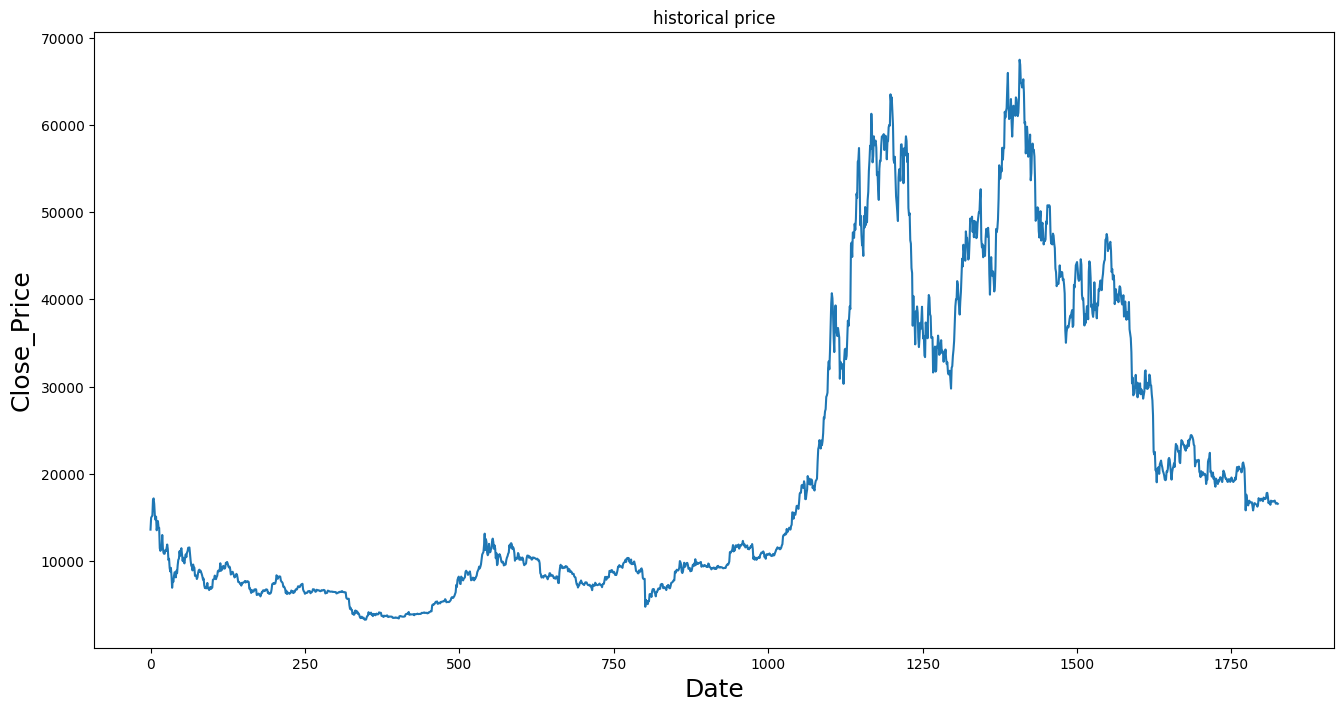

In [1684]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [1685]:
!pip install pandas-ta
!pip install ta

In [1686]:
import pandas_ta as pt
import ta

In [1687]:
                                          #Trend Indicator

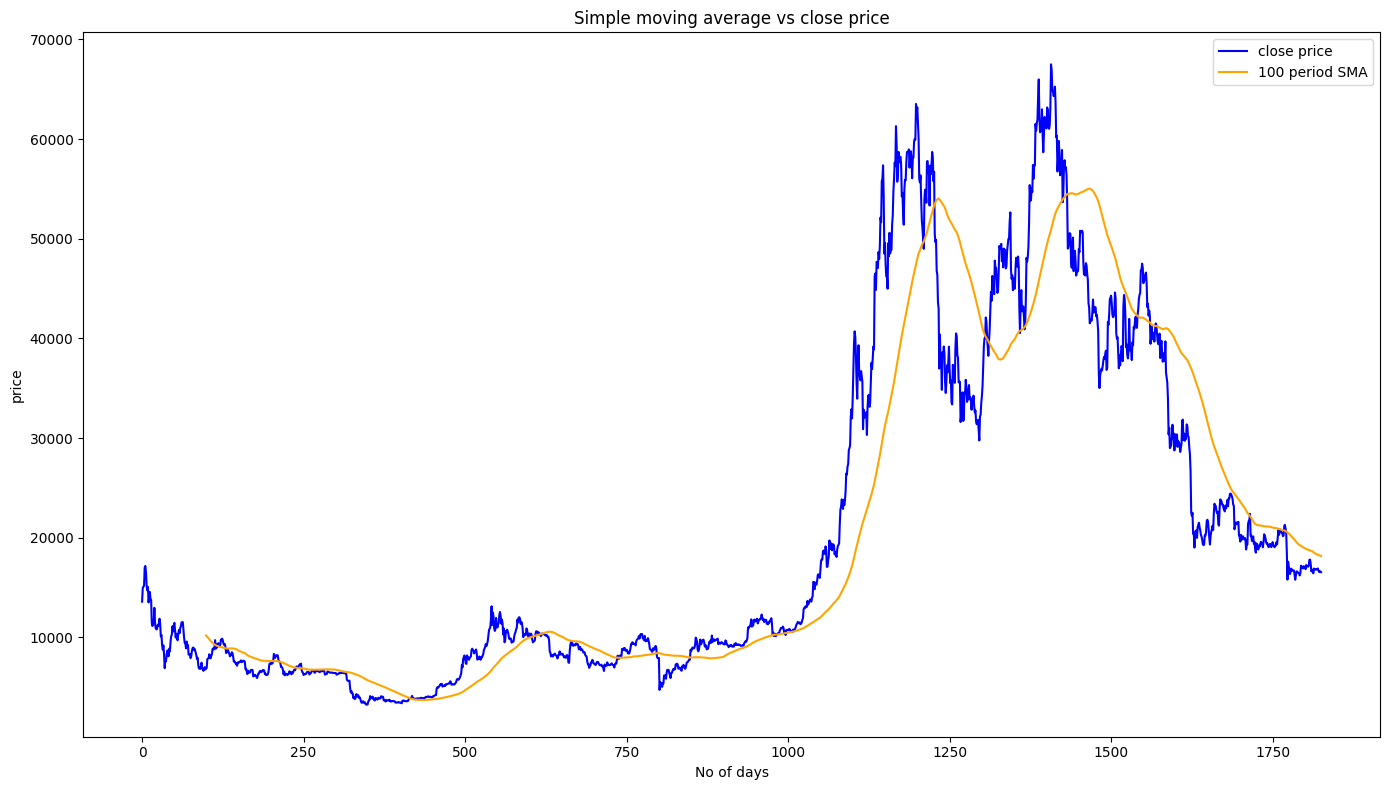

In [1688]:
#implementation of SMA indicator
df['SMA_100']=ta.trend.SMAIndicator(close=df['Close'],window=100).sma_indicator()

#plot the SMA indicator
fig,ax=plt.subplots(figsize=(14,8))
ax.plot(df.index, df['Close'], label='close price', color='blue')
ax.plot(df.index ,df['SMA_100'], label='100 period SMA', color='orange')
ax.set_title('Simple moving average vs close price')
ax.set_ylabel('price')
ax.set_xlabel('No of days')
plt.legend()
plt.tight_layout()
plt.show()

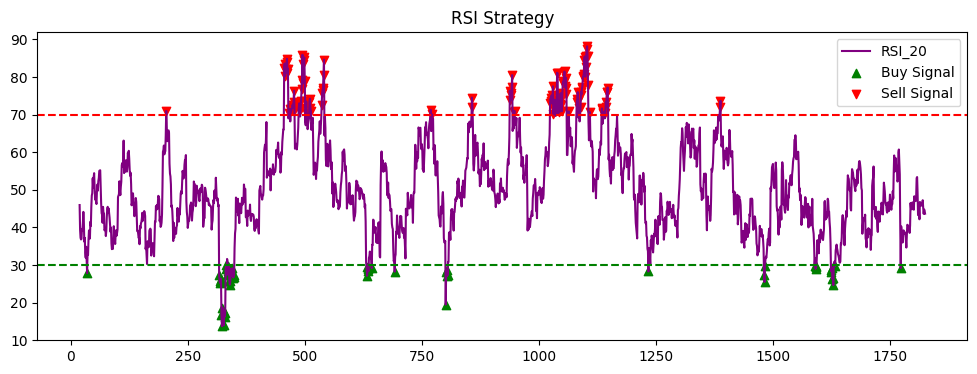

In [1689]:
#mean reversion strategy implementation
#RSI indicator
df['RSI_20']=ta.momentum.RSIIndicator(close=df['Close'],window=20).rsi()

#plot the rsi
df['Buy']=df['RSI_20'] < 30
df['Sell']=df['RSI_20'] > 70
plt.figure(figsize=(12,4))
plt.title('RSI Strategy')
plt.plot(df.index, df['RSI_20'], label='RSI_20', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')

# Mark Buy signals
plt.scatter(df.index[df['Buy']], df['RSI_20'][df['Buy']], marker='^', color='green', label='Buy Signal', alpha=1)

# Mark Sell signals
plt.scatter(df.index[df['Sell']], df['RSI_20'][df['Sell']], marker='v', color='red', label='Sell Signal', alpha=1)
plt.legend()
plt.show()

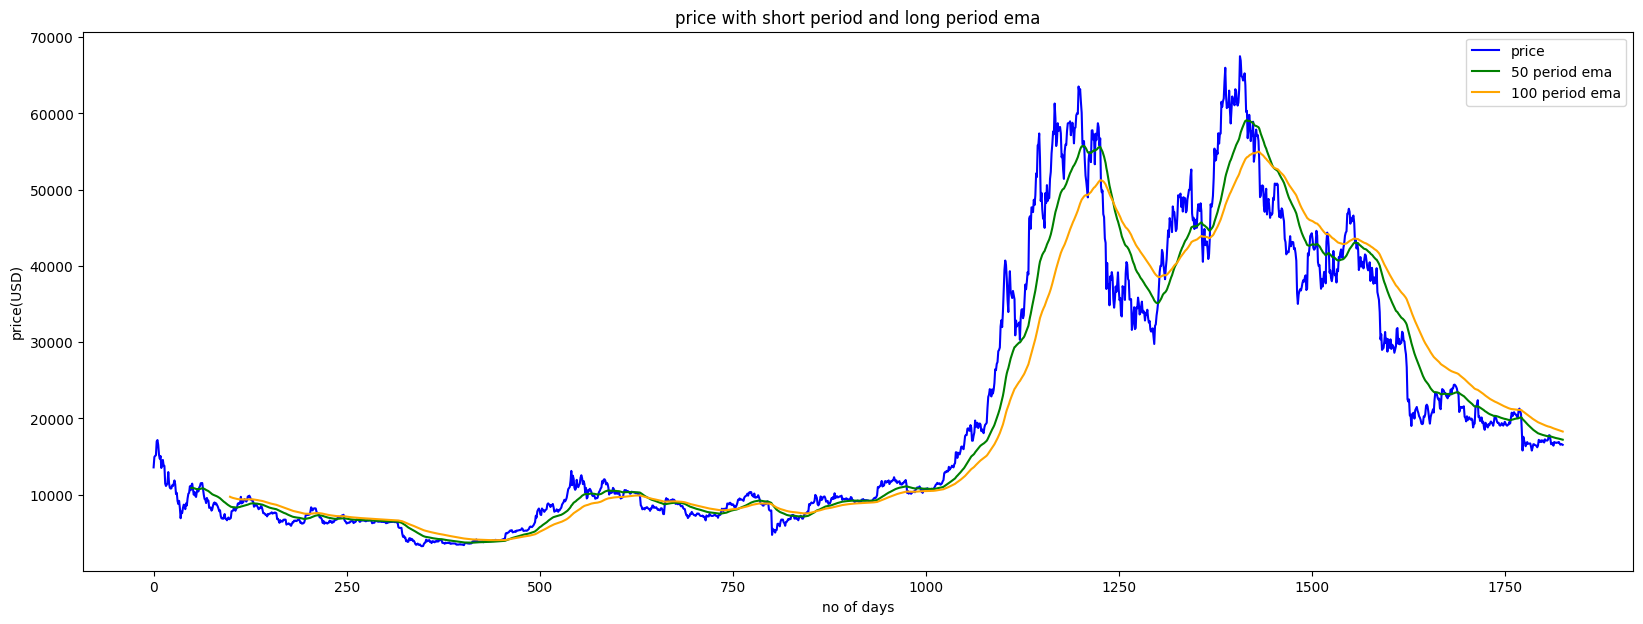

In [1690]:
#implementation of EMA strategy
df['EMA_50']=ta.trend.EMAIndicator(close=df['Close'], window=50).ema_indicator()      # short ema
df['EMA_100']=ta.trend.EMAIndicator(close=df['Close'], window=100).ema_indicator()    #long ema

#plot the EMA
plt.figure(figsize=(20,7))
plt.plot(df.index, df['Close'], label="price", color="blue")
plt.plot(df.index, df['EMA_50'], label="50 period ema", color="green", linestyle="-")
plt.plot(df.index, df['EMA_100'], label="100 period ema", color="orange", linestyle="-")
plt.title('price with short period and long period ema')
plt.xlabel('no of days')
plt.ylabel('price(USD)')
plt.legend()
plt.show()


In [1691]:
!pip install mplfinance



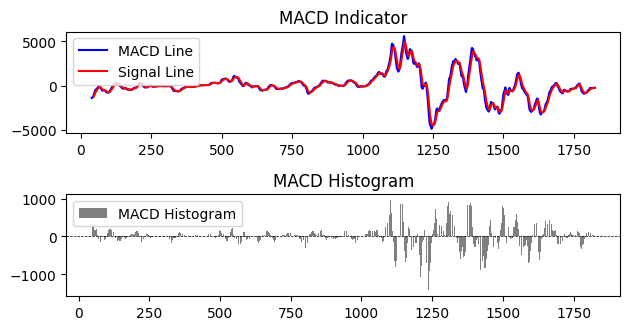

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN   
...            ...           ...           ...           ...        ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836   

        Buy   Sell        EMA_50       EMA_100  MACD_diff  
0     False  False           NaN           NaN        NaN  
1     False  False           NaN           NaN        NaN  
2     False  False           NaN           NaN        NaN  
3     False  False           NaN           NaN        NaN  
4     False  False           NaN           NaN        NaN  
...     ...    ...           ...           ...        ...  
1821  False  False  17317.379170  18420.988013  26.107809  
1822  False  False  17287.285213  18383.938414  16.324325  
1823  False  False  17261.958141  18349.433592  13.773002  
1824  False  False  17236.146133  18314.865638  11.072717  
1825  False  False  17208.781497  18279.687069   7.240132  

[1826 rows x 15 columns]

In [1692]:
#implementing MACD indicator
macd=ta.trend.MACD(close=df['Close'],window_slow=39,window_fast=19,window_sign=9)
df['MACD']=macd.macd()
df['MACD_Signal']=macd.macd_signal()
df['MACD_diff']=macd.macd_diff()
#plot macd
#macd plot line
plt.subplot(3, 1, 1)
plt.plot(df['MACD'], label='MACD Line', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
plt.title('MACD Indicator')
plt.legend(loc='upper left')

#macd histogram
plt.subplot(3, 1, 2)
plt.bar(df.index, df['MACD_diff'], label='MACD Histogram', color='gray')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.title('MACD Histogram')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
df.drop(['MACD','MACD_Signal'],axis=1)

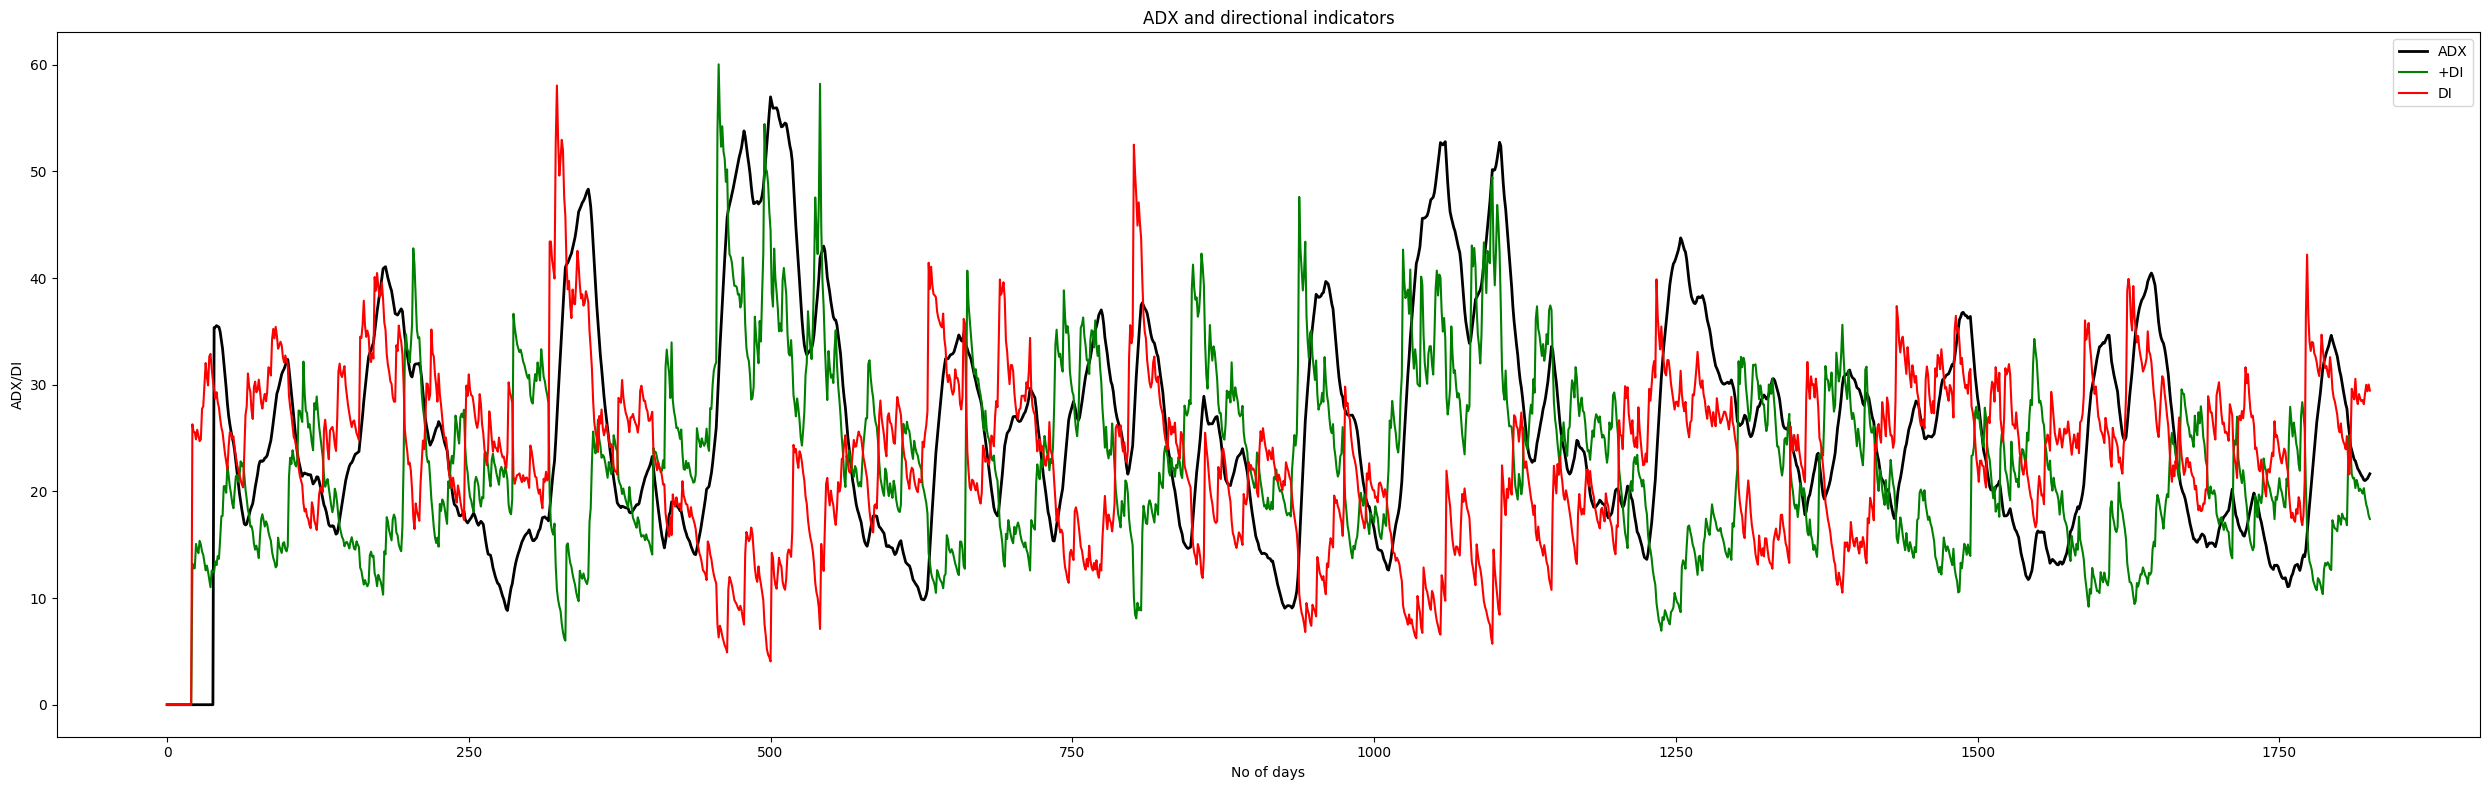

In [1693]:
#implementation of ADX indicator
adx_indicator=ta.trend.ADXIndicator(high=df['High'],low=df['Low'], close=df['Close'],window=20)
df['ADX']=adx_indicator.adx()
df['+DI']=adx_indicator.adx_pos()
df['-DI']=adx_indicator.adx_neg()
df
#plot the adx_indicator
plt.figure(figsize=(25,8))


plt.plot(df.index, df['ADX'], label='ADX',color='black', linewidth=2)
plt.plot(df.index, df['+DI'], label='+DI',color='green',linestyle='-')
plt.plot(df.index, df['-DI'], label='DI', color='red', linestyle='-')
plt.title('ADX and directional indicators')
plt.ylabel('ADX/DI')
plt.xlabel('No of days')
plt.legend()
plt.tight_layout()
plt.show()

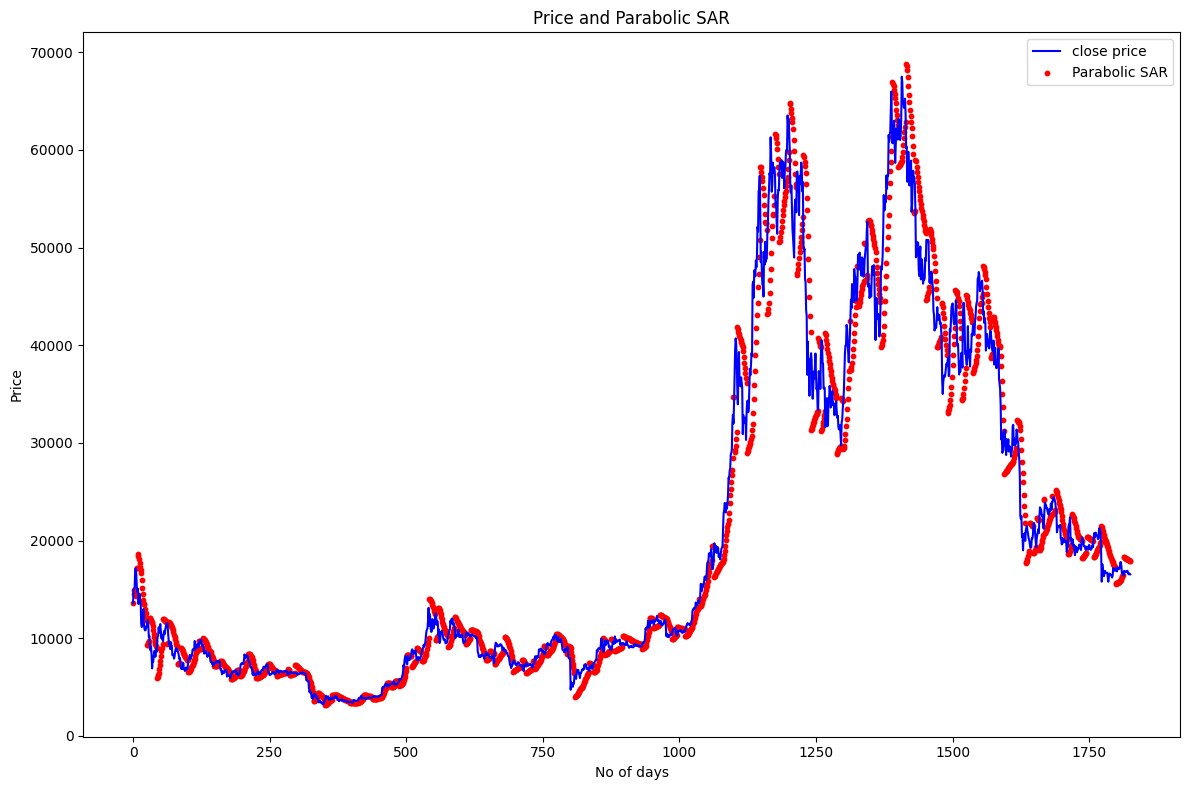

In [1694]:
#parabolic SAR
df['PSAR']=ta.trend.PSARIndicator(high=df['High'], low=df['Low'], close=df['Close'],step=0.02, max_step=0.2).psar()

#plt the parabolic SAR
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(df.index, df['Close'], label='close price',color='blue')
ax.scatter(df.index, df['PSAR'], label='Parabolic SAR', color='red', marker='o',s=10)
ax.set_title('Price and Parabolic SAR')
ax.set_ylabel('Price')
ax.set_xlabel('No of days')
ax.legend()
plt.tight_layout()
plt.show()

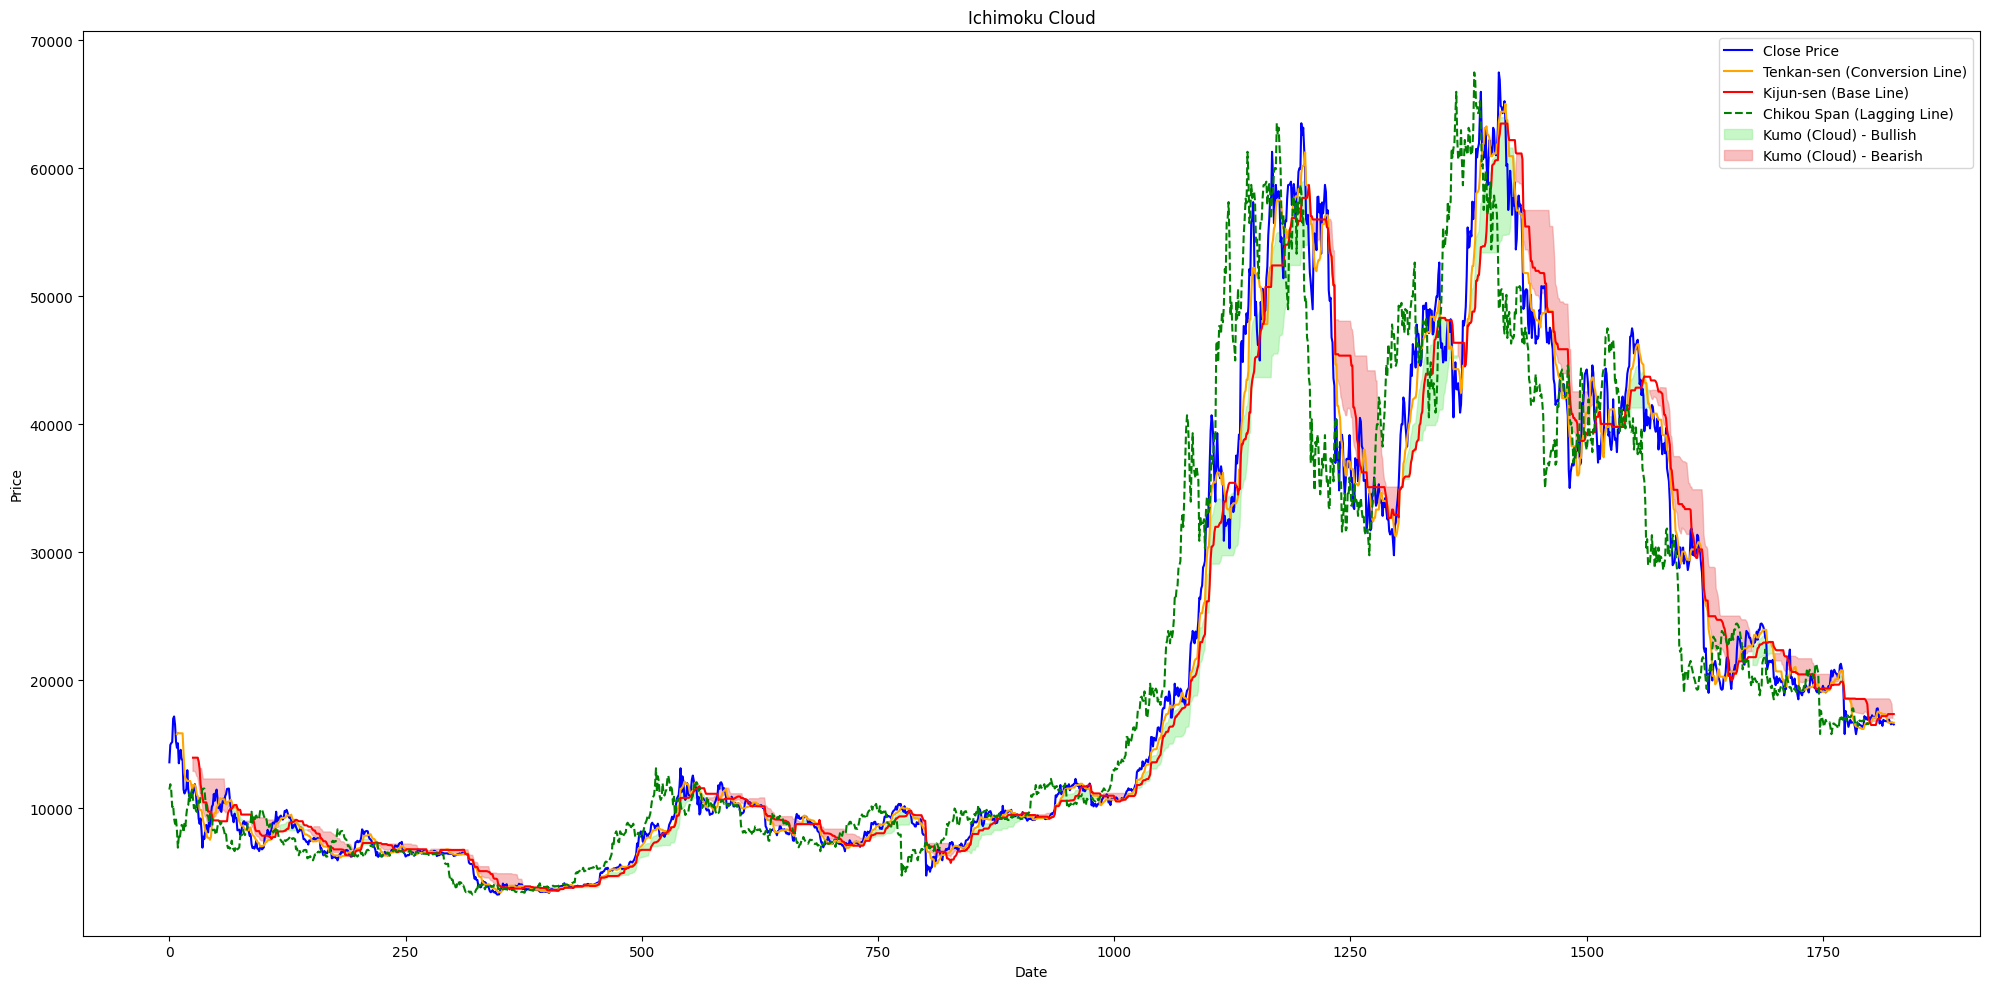

In [1695]:
#ichimoku cloud indicator
ichimoku = ta.trend.IchimokuIndicator(high=df['High'], low=df['Low'], window1=9, window2=26, window3=52)
df['Tenkan-sen'] = ichimoku.ichimoku_conversion_line()
df['Kijun-sen'] = ichimoku.ichimoku_base_line()
df['Senkou Span A'] = ichimoku.ichimoku_a()
df['Senkou Span B'] = ichimoku.ichimoku_b()
df['Chikou Span'] = df['Close'].shift(-26)

#plot the ichimoku cloud
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df['Close'], label='Close Price', color='blue')

ax.plot(df.index, df['Tenkan-sen'], label='Tenkan-sen (Conversion Line)', color='orange')
ax.plot(df.index, df['Kijun-sen'], label='Kijun-sen (Base Line)', color='red')
ax.plot(df.index, df['Chikou Span'], label='Chikou Span (Lagging Line)', color='green', linestyle='--')
ax.fill_between(df.index, df['Senkou Span A'], df['Senkou Span B'],
                    where=(df['Senkou Span A'] > df['Senkou Span B']),
                    color='lightgreen', label='Kumo (Cloud) - Bullish', alpha=0.5)

ax.fill_between(df.index, df['Senkou Span A'], df['Senkou Span B'],
                    where=(df['Senkou Span A'] < df['Senkou Span B']),
                    color='lightcoral', label='Kumo (Cloud) - Bearish', alpha=0.5)

ax.set_title('Ichimoku Cloud')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend()

plt.tight_layout()
plt.show()

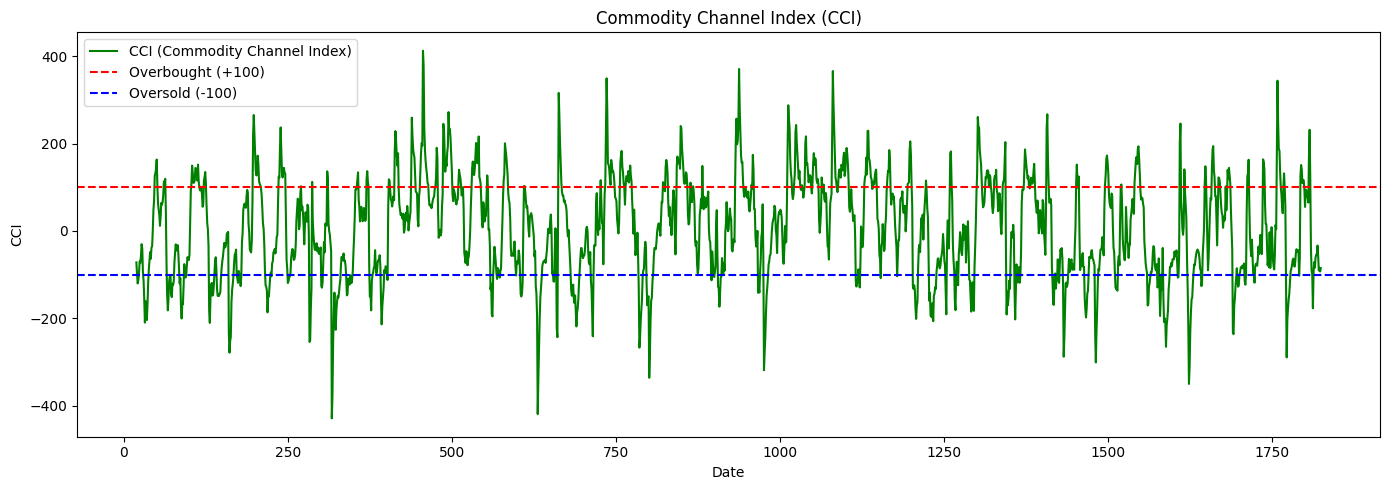

In [1696]:
#cci indicator implementation
df['CCI'] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=20, constant=0.015).cci()

#plot the cci indicator
plt.figure(figsize=(14,5))
plt.plot(df.index, df['CCI'], label='CCI (Commodity Channel Index)', color='green')
plt.axhline(100, color='red', linestyle='--', label='Overbought (+100)')
plt.axhline(-100, color='blue', linestyle='--', label='Oversold (-100)')
plt.title('Commodity Channel Index (CCI)')
plt.ylabel('CCI')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

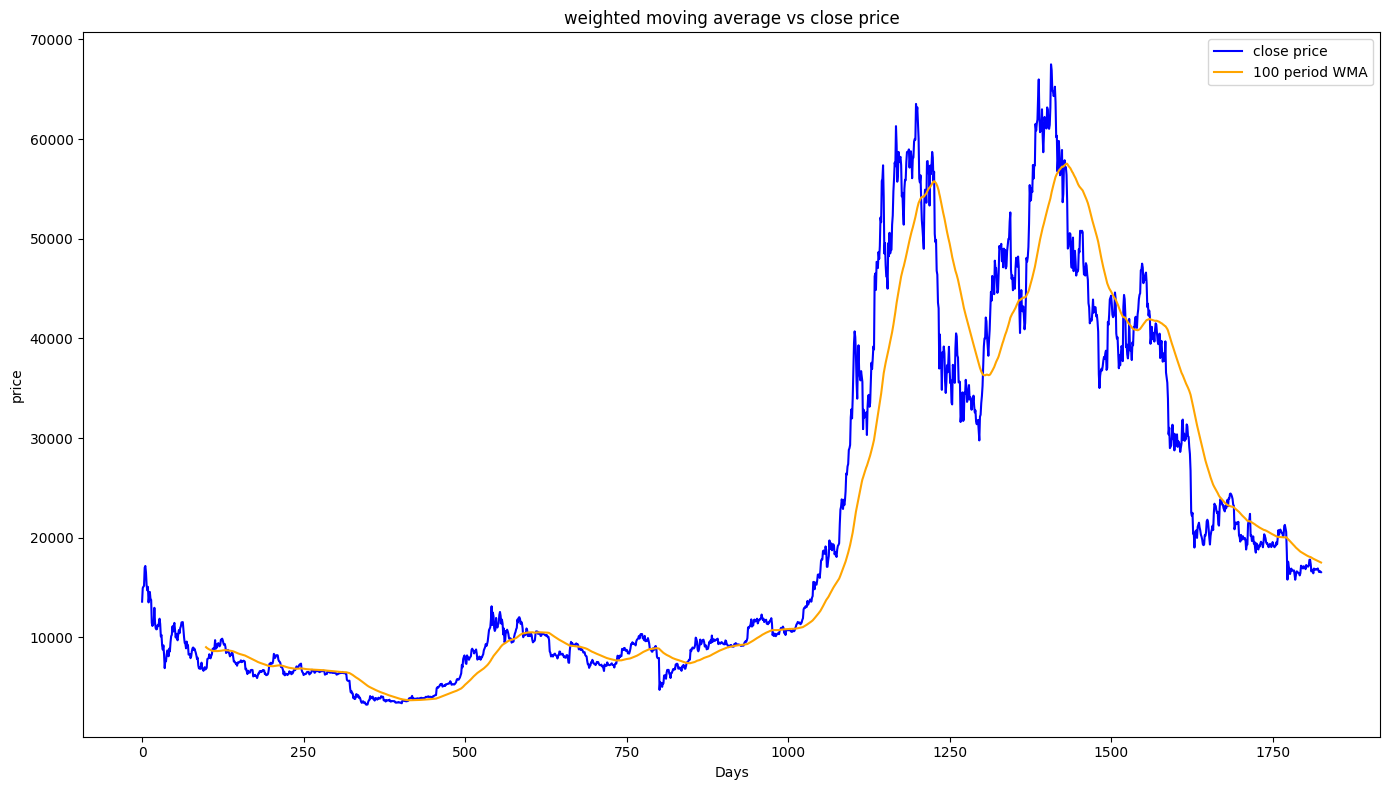

In [1697]:
#implementation of WMA indicator
df['WMA_100']=ta.trend.WMAIndicator(close=df['Close'], window=100).wma()

#plot the WMA
fig,ax=plt.subplots(figsize=(14,8))
ax.plot(df.index, df['Close'], label='close price', color='blue')
ax.plot(df.index, df['WMA_100'], label='100 period WMA', color='orange')
ax.set_title('weighted moving average vs close price')
ax.set_ylabel('price')
ax.set_xlabel("Days")
plt.legend()
plt.tight_layout()
plt.show()

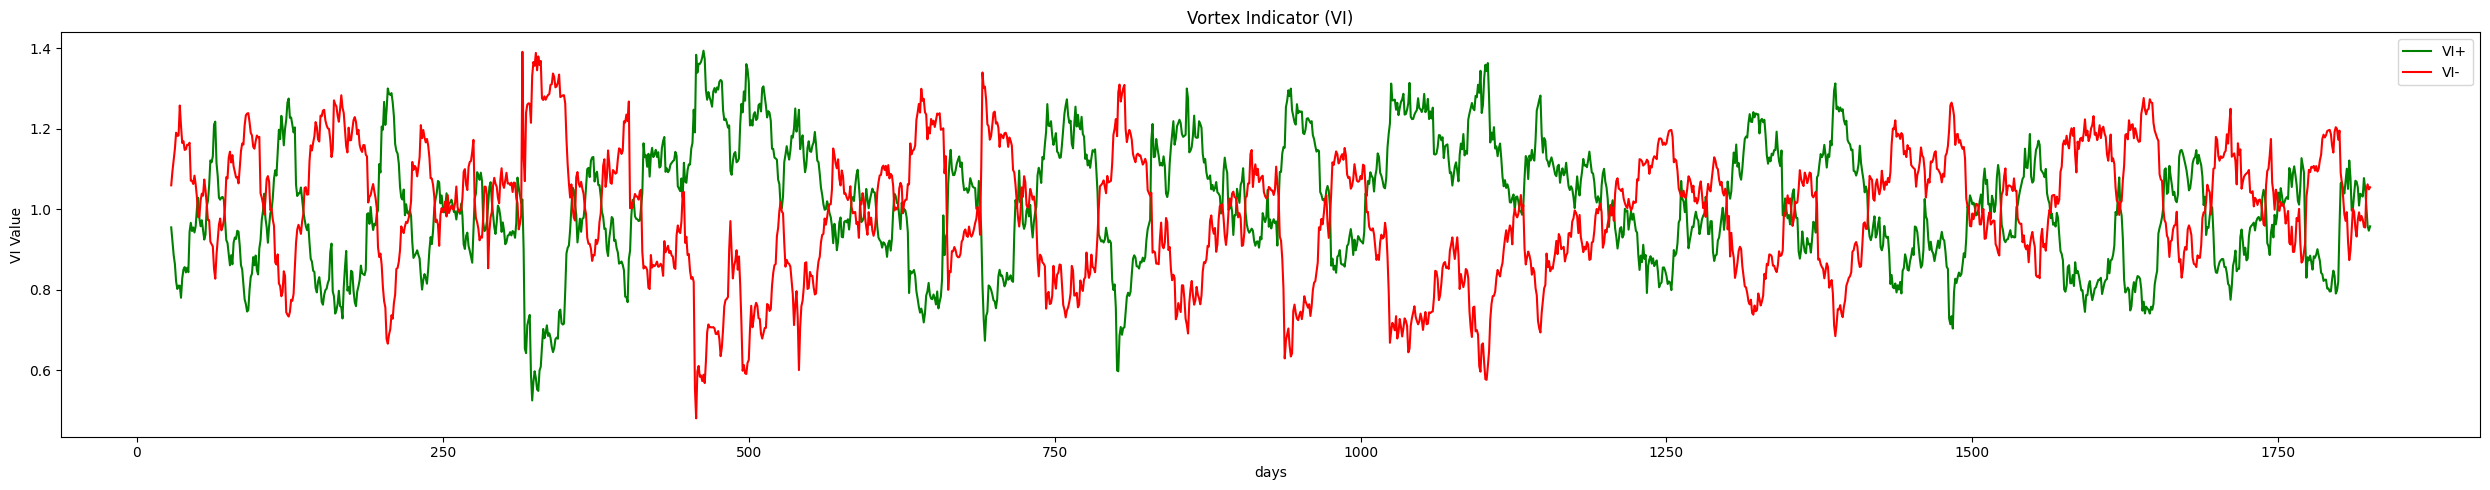

In [1698]:
#implementation of vortex indicator
vi=ta.trend.VortexIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=28)
df['+VI']=vi.vortex_indicator_pos()
df['-VI']=vi.vortex_indicator_neg()

#plot the VI indicator
plt.figure(figsize=(25, 5))
plt.plot(df.index, df['+VI'], label='VI+', color='green')
plt.plot(df.index, df['-VI'], label='VI-', color='red')
plt.title('Vortex Indicator (VI)')
plt.ylabel('VI Value')
plt.xlabel('days')
plt.legend()
plt.tight_layout()
plt.show()


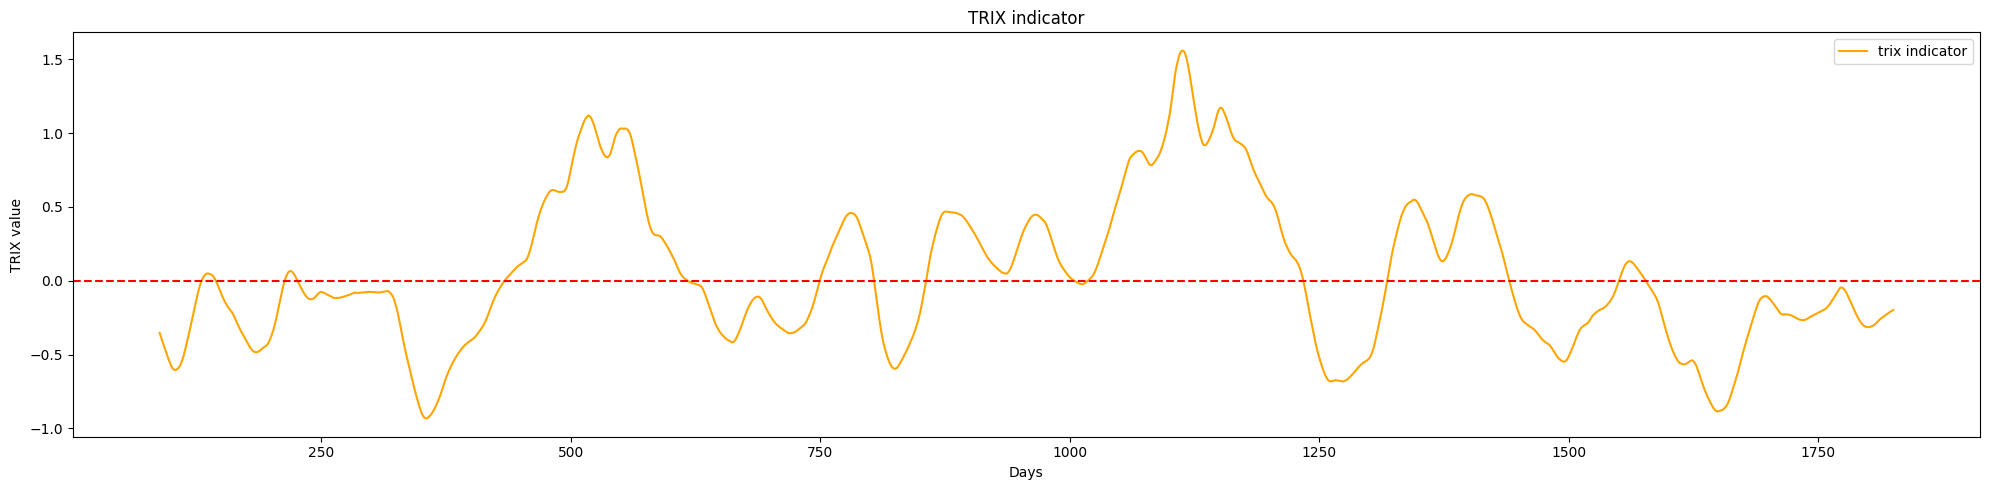

In [1699]:
#implementation of TRIX indicator
df['TRIX_30']=ta.trend.TRIXIndicator(close=df['Close'], window=30).trix()

#plot the trix indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['TRIX_30'], label='trix indicator', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('TRIX indicator')
plt.ylabel('TRIX value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()


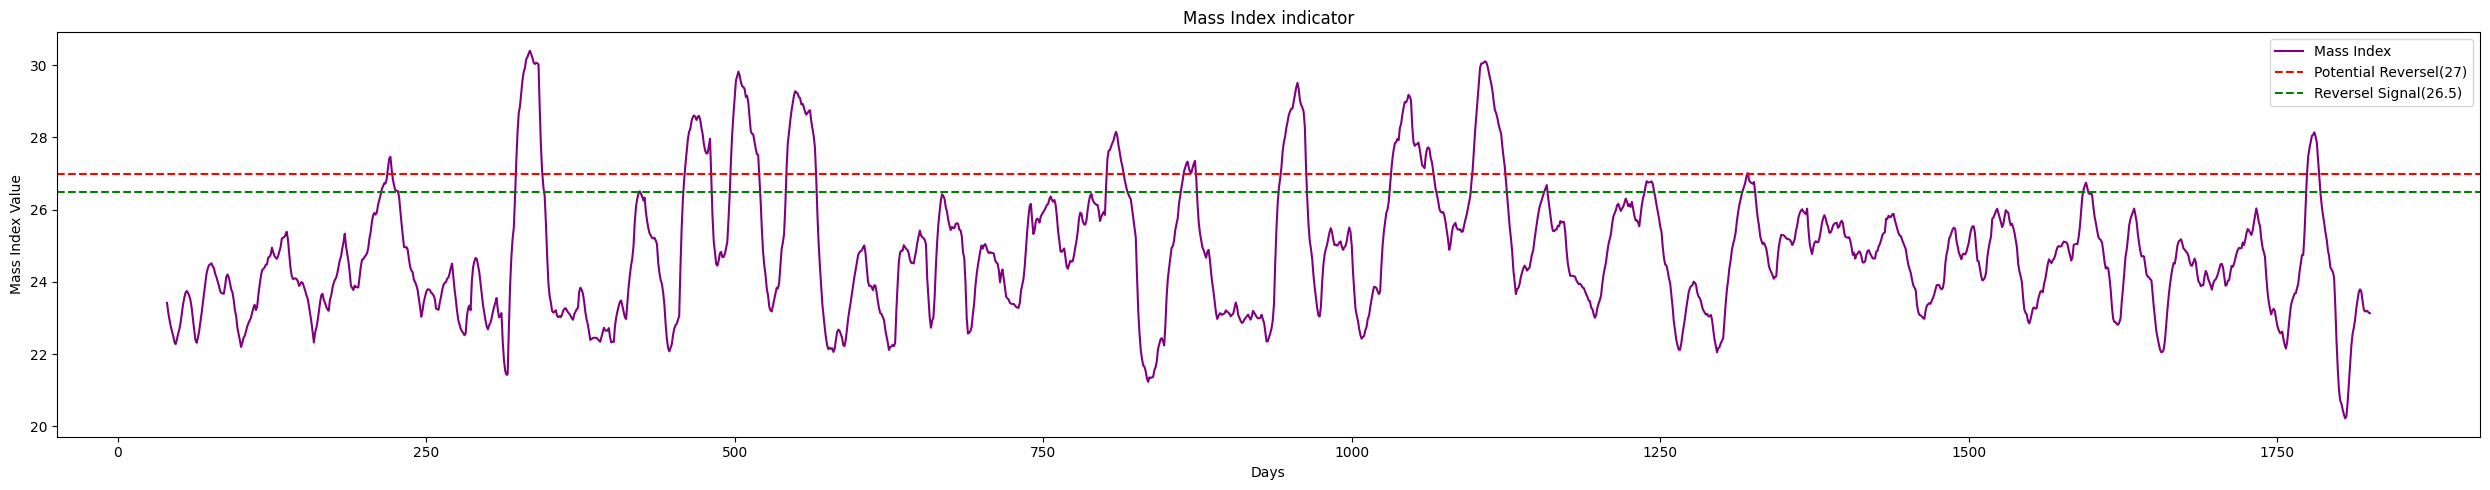

In [1700]:
#implementation of mass index indicator
df['Mass_Index']=ta.trend.MassIndex(high=df['High'], low=df['Low'], window_fast=9, window_slow=25).mass_index()
df
#plot the mass index
plt.figure(figsize=(25,5))
plt.plot(df.index, df['Mass_Index'], label='Mass Index', color='purple')
plt.axhline(27, color='red', linestyle='--', label='Potential Reversel(27)')
plt.axhline(26.5, color='green', linestyle='--', label='Reversel Signal(26.5)')
plt.title('Mass Index indicator')
plt.ylabel('Mass Index Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

In [1701]:
#implementation of DPO indicator
df['DPO']=ta.trend.DPOIndicator(close=df['Close'], window=20).dpo()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

      Senkou Span A  Senkou Span B   Chikou Span        CCI       WMA_100  \
0               NaN   13751.388338  11446.468733        NaN           NaN   
1               NaN   14224.509635  11865.231885        NaN           NaN   
2               NaN   14313.654885  11348.083791        NaN           NaN   
3               NaN   14844.760199  10084.495242        NaN           NaN   
4               NaN   15071.223068  10236.675069        NaN           NaN   
...             ...            ...           ...        ...           ...   
1821   17014.170293   18474.741600           NaN -57.918033  17634.969189   
1822   17024.761142   18320.682700           NaN -90.506242  17601.110666   
1823   17036.882538   18128.059250           NaN -84.327050  17569.662601   
1824   17009.574938   17082.605928           NaN -92.842953  17537.910073   
1825   17009.574938   16963.972636           NaN -85.380262  17505.238271   

           +VI       -VI   TRIX_30  Mass_Index         DPO  
0          NaN       NaN       NaN         NaN         NaN  
1          NaN       NaN       NaN         NaN         NaN  
2          NaN       NaN       NaN         NaN         NaN  
3          NaN       NaN       NaN         NaN         NaN  
4          NaN       NaN       NaN         NaN         NaN  
...        ...       ...       ...         ...         ...  
1821  1.053129  0.954574 -0.213969   23.181594 -385.052747  
1822  1.005414  1.048800 -0.209623   23.196708 -172.410733  
1823  0.958060  1.061728 -0.205473   23.195232 -183.440128  
1824  0.946697  1.049194 -0.201538   23.151057 -483.879793  
1825  0.957509  1.054337 -0.197872   23.135051   21.544116  

[1826 rows x 33 columns]

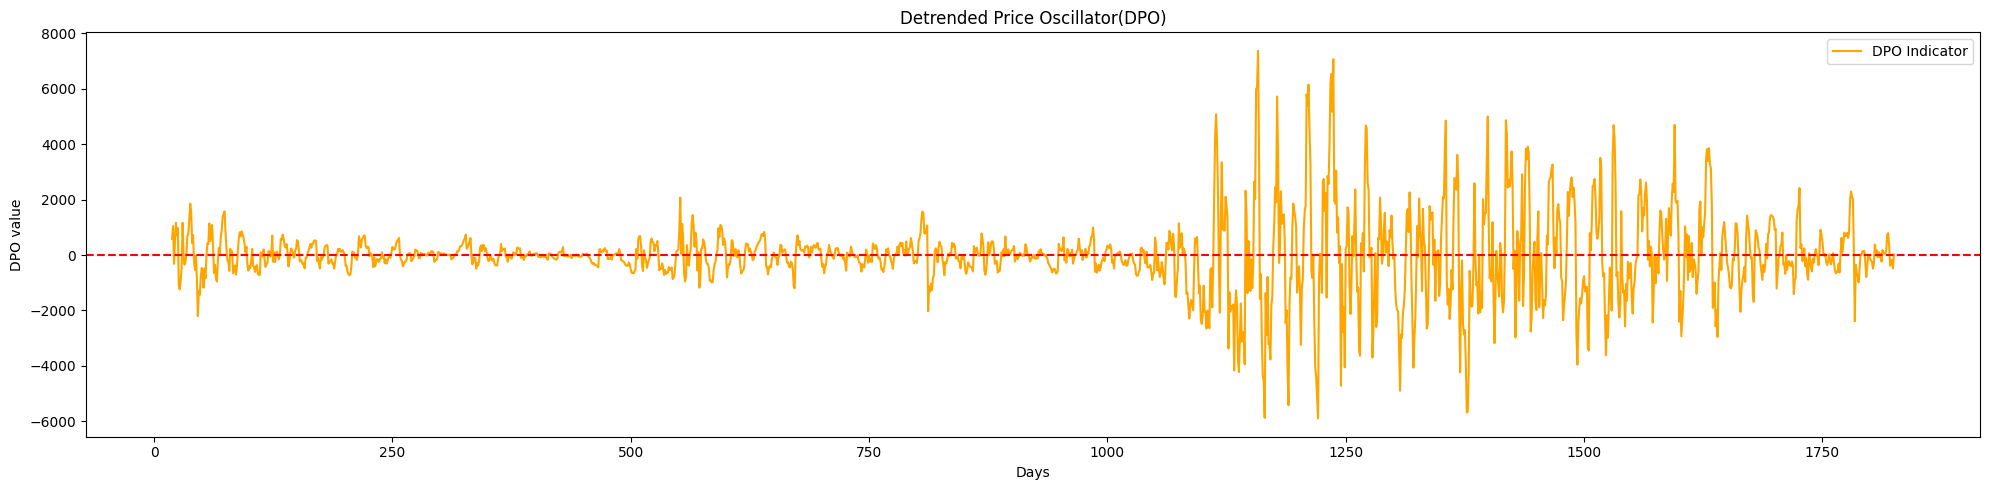

In [1702]:
#plot the DPO indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['DPO'], label='DPO Indicator', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Detrended Price Oscillator(DPO)')
plt.ylabel('DPO value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

In [1703]:
#Implementation of KST Oscillator indicator
kst=ta.trend.KSTIndicator(close=df['Close'], roc1=10, roc2=15, roc3=20, roc4=30)
df['KST']=kst.kst()
df['KST_Signal']=kst.kst_sig()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

       Chikou Span        CCI       WMA_100       +VI       -VI   TRIX_30  \
0     11446.468733        NaN           NaN       NaN       NaN       NaN   
1     11865.231885        NaN           NaN       NaN       NaN       NaN   
2     11348.083791        NaN           NaN       NaN       NaN       NaN   
3     10084.495242        NaN           NaN       NaN       NaN       NaN   
4     10236.675069        NaN           NaN       NaN       NaN       NaN   
...            ...        ...           ...       ...       ...       ...   
1821           NaN -57.918033  17634.969189  1.053129  0.954574 -0.213969   
1822           NaN -90.506242  17601.110666  1.005414  1.048800 -0.209623   
1823           NaN -84.327050  17569.662601  0.958060  1.061728 -0.205473   
1824           NaN -92.842953  17537.910073  0.946697  1.049194 -0.201538   
1825           NaN -85.380262  17505.238271  0.957509  1.054337 -0.197872   

      Mass_Index         DPO       KST  KST_Signal  
0            NaN         NaN       NaN         NaN  
1            NaN         NaN       NaN         NaN  
2            NaN         NaN       NaN         NaN  
3            NaN         NaN       NaN         NaN  
4            NaN         NaN       NaN         NaN  
...          ...         ...       ...         ...  
1821   23.181594 -385.052747  2.957348    8.671836  
1822   23.196708 -172.410733 -2.035194    7.559142  
1823   23.195232 -183.440128 -4.336901    5.799106  
1824   23.151057 -483.879793 -7.176260    3.444815  
1825   23.135051   21.544116 -8.182988    0.730564  

[1826 rows x 35 columns]

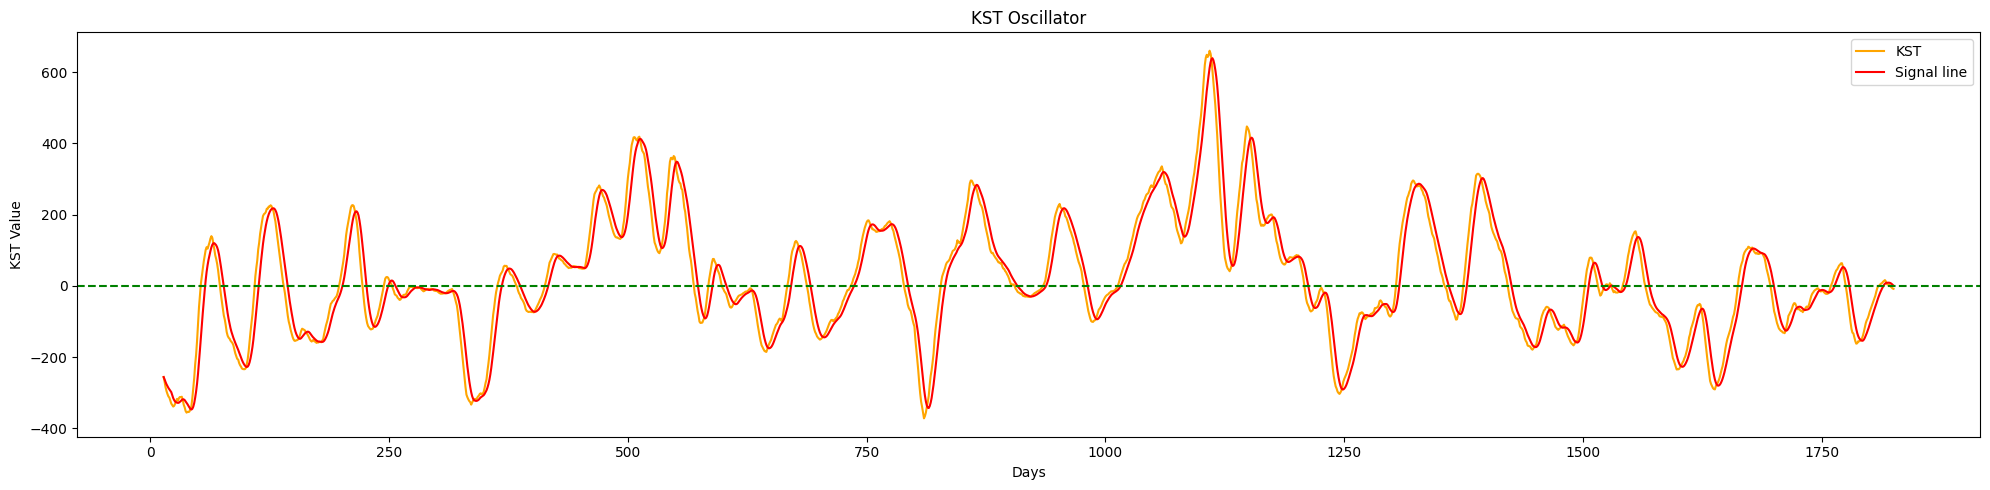

In [1704]:
#plot the KST Oscillator indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['KST'], label='KST', color='orange')
plt.plot(df.index, df['KST_Signal'], label='Signal line', color='red')
plt.axhline(0,color='green', linestyle='--')
plt.title('KST Oscillator')
plt.ylabel('KST Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

In [1705]:
#Implementation of schaff trend cycle(STC) Indicator
df['STC']=ta.trend.STCIndicator(close=df['Close'], window_slow=50, window_fast=23, cycle=10).stc()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

            CCI       WMA_100       +VI       -VI   TRIX_30  Mass_Index  \
0           NaN           NaN       NaN       NaN       NaN         NaN   
1           NaN           NaN       NaN       NaN       NaN         NaN   
2           NaN           NaN       NaN       NaN       NaN         NaN   
3           NaN           NaN       NaN       NaN       NaN         NaN   
4           NaN           NaN       NaN       NaN       NaN         NaN   
...         ...           ...       ...       ...       ...         ...   
1821 -57.918033  17634.969189  1.053129  0.954574 -0.213969   23.181594   
1822 -90.506242  17601.110666  1.005414  1.048800 -0.209623   23.196708   
1823 -84.327050  17569.662601  0.958060  1.061728 -0.205473   23.195232   
1824 -92.842953  17537.910073  0.946697  1.049194 -0.201538   23.151057   
1825 -85.380262  17505.238271  0.957509  1.054337 -0.197872   23.135051   

             DPO       KST  KST_Signal        STC  
0            NaN       NaN         NaN        NaN  
1            NaN       NaN         NaN        NaN  
2            NaN       NaN         NaN        NaN  
3            NaN       NaN         NaN        NaN  
4            NaN       NaN         NaN        NaN  
...          ...       ...         ...        ...  
1821 -385.052747  2.957348    8.671836  98.148184  
1822 -172.410733 -2.035194    7.559142  91.364368  
1823 -183.440128 -4.336901    5.799106  90.810524  
1824 -483.879793 -7.176260    3.444815  90.891764  
1825   21.544116 -8.182988    0.730564  91.666037  

[1826 rows x 36 columns]

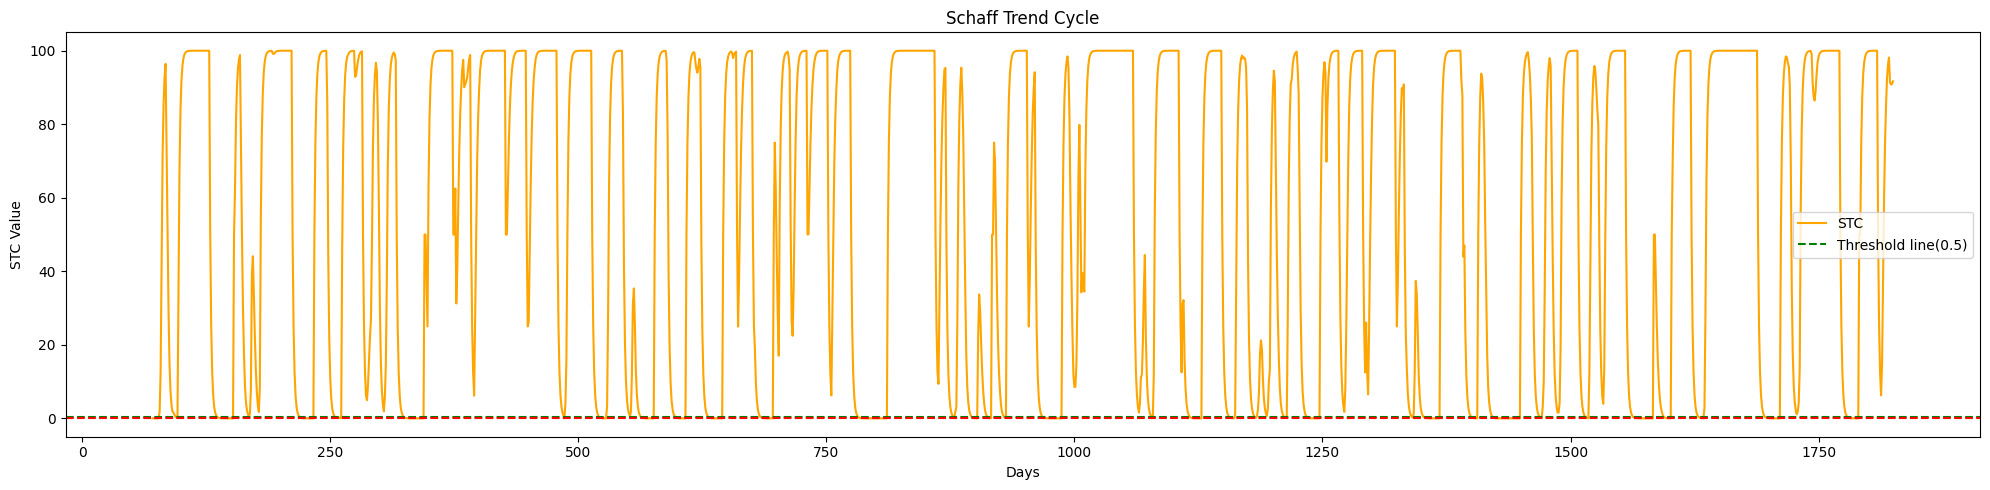

In [1706]:
#plot the STC Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['STC'], label='STC', color='orange')
plt.axhline(0.5, color='green', linestyle='--',label='Threshold line(0.5)')
plt.axhline(0, color='red', linestyle='--')
plt.title('Schaff Trend Cycle')
plt.ylabel('STC Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: >

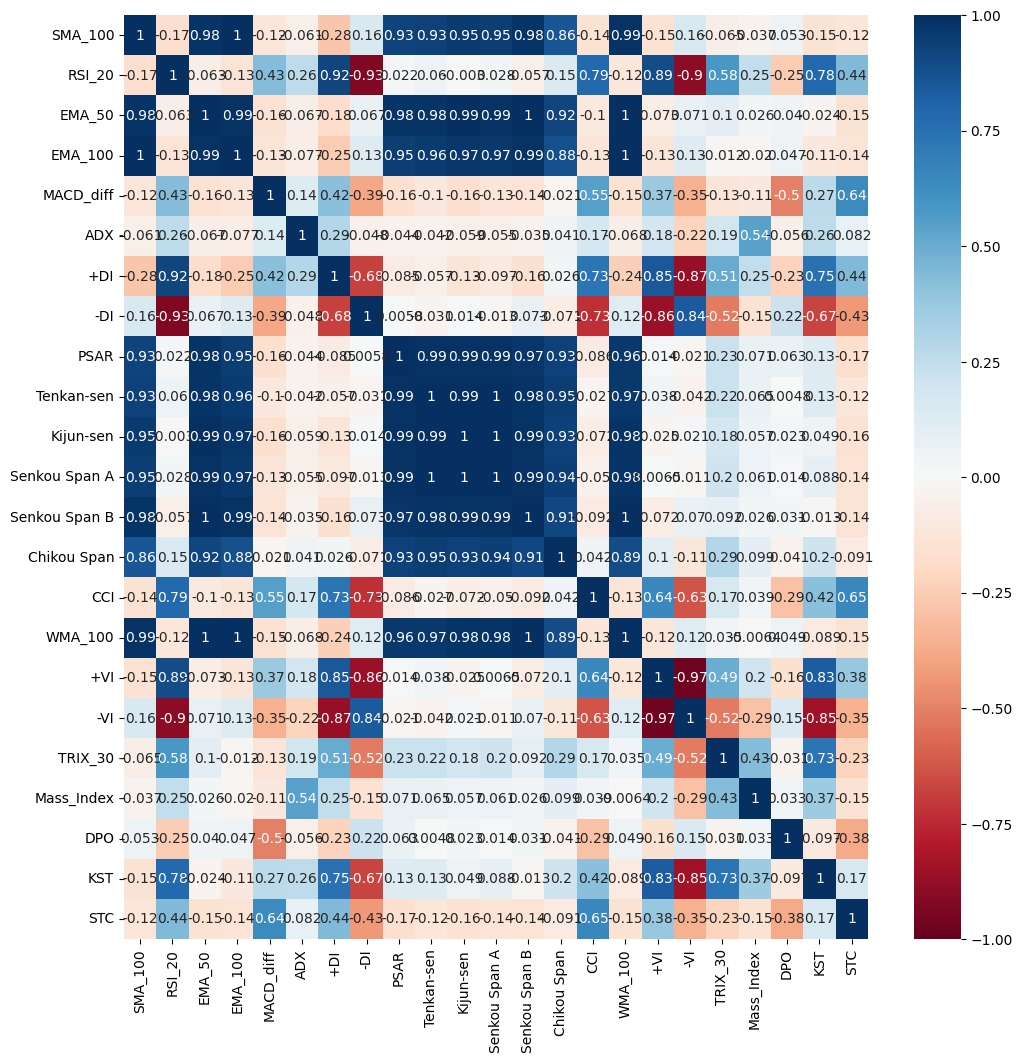

In [1707]:
import seaborn as sns
dataframe = df[['SMA_100','RSI_20','EMA_50','EMA_100','MACD_diff','ADX','+DI','-DI','PSAR','Tenkan-sen','Kijun-sen','Senkou Span A','Senkou Span B','Chikou Span','CCI','WMA_100','+VI','-VI','TRIX_30','Mass_Index','DPO','KST','STC']]
corr = dataframe.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)

In [1708]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

36
22


In [1709]:
                            ## Momentum Indicator


In [1710]:
# Stochastic Oscillator Implementation
# SLow Stochastic Oscillator to reduce noise and false signals
slow_stochastic_oscillator = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=3)
df['%D_Slow'] = slow_stochastic_oscillator.stoch_signal()
df['%K_Slow'] = slow_stochastic_oscillator.stoch()
#Fast Stochastic oscillator to generate more trading signals
fast_stochastic_oscillator = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], window=14, smooth_window=1)
df['%D_fast'] = fast_stochastic_oscillator.stoch_signal()
df['%K_fast'] = fast_stochastic_oscillator.stoch()
df

# Both slow and fast stochastic oscillator can be used independently but we can also you them combined to be more sure about the trends

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

            -DI   TRIX_30  Mass_Index         DPO  KST_Signal        STC  \
0      0.000000       NaN         NaN         NaN         NaN        NaN   
1      0.000000       NaN         NaN         NaN         NaN        NaN   
2      0.000000       NaN         NaN         NaN         NaN        NaN   
3      0.000000       NaN         NaN         NaN         NaN        NaN   
4      0.000000       NaN         NaN         NaN         NaN        NaN   
...         ...       ...         ...         ...         ...        ...   
1821  29.183679 -0.213969   23.181594 -385.052747    8.671836  98.148184   
1822  29.991675 -0.209623   23.196708 -172.410733    7.559142  91.364368   
1823  29.388362 -0.205473   23.195232 -183.440128    5.799106  90.810524   
1824  30.016409 -0.201538   23.151057 -483.879793    3.444815  90.891764   
1825  29.445128 -0.197872   23.135051   21.544116    0.730564  91.666037   

        %D_Slow    %K_Slow    %D_fast    %K_fast  
0           NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN  
4           NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...  
1821  22.861113  17.326645  17.326645  17.326645  
1822  19.135016  12.437205  12.437205  12.437205  
1823  17.912601  23.973953  23.973953  23.973953  
1824  24.734120  37.791202  37.791202  37.791202  
1825  29.715495  27.381330  27.381330  27.381330  

[1826 rows x 26 columns]

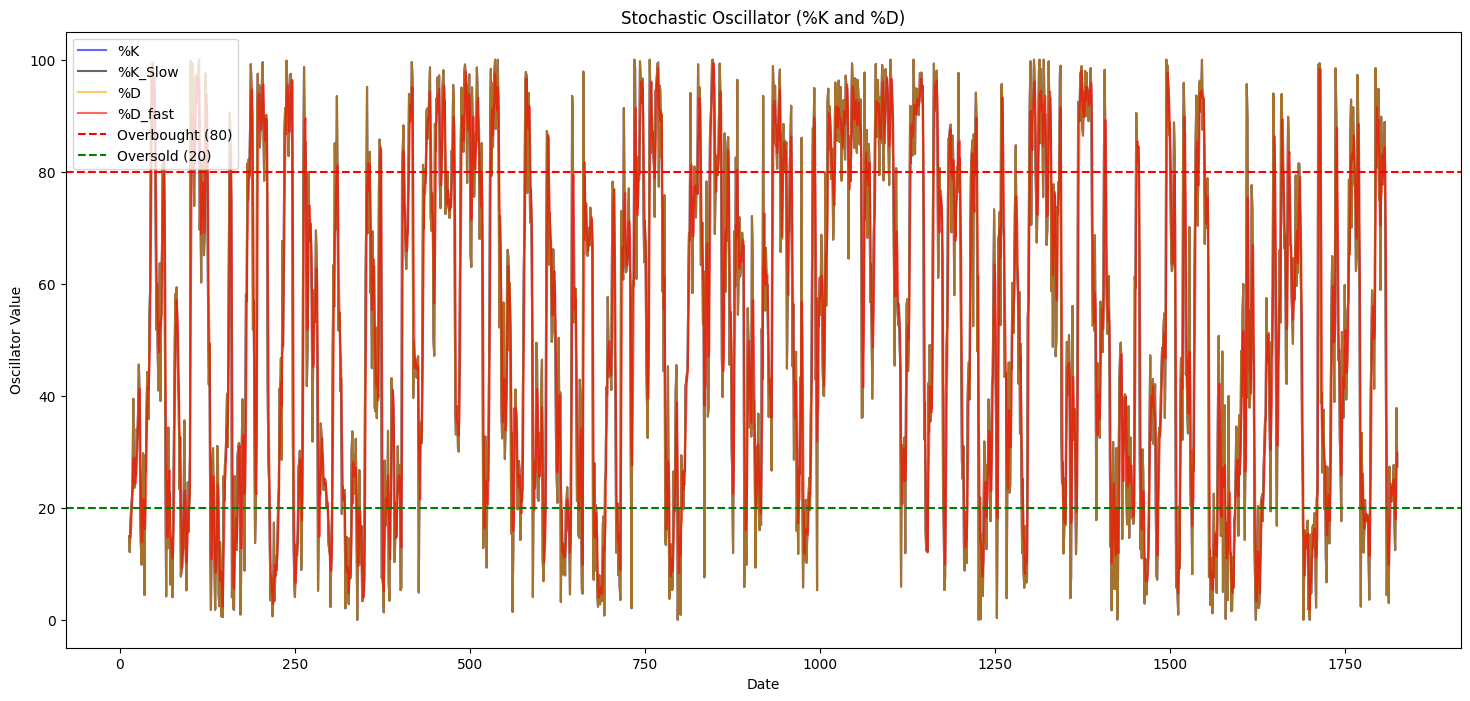

In [1711]:
plt.figure(figsize=(18, 8))

# Plot the %K and %D lines
plt.plot(df.index, df['%K_fast'], label='%K', color='blue', alpha=0.6)
plt.plot(df.index, df['%K_Slow'], label='%K_Slow', color='black', alpha=0.6)

plt.plot(df.index, df['%D_fast'], label='%D', color='orange', alpha=0.6)
plt.plot(df.index, df['%D_Slow'], label='%D_fast', color='red', alpha=0.6)
# Overbought/Oversold Levels
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')

# Labels and Title
plt.title('Stochastic Oscillator (%K and %D)')
plt.ylabel('Oscillator Value')
plt.xlabel('Date')

# Add Legend
plt.legend(loc='upper left')

# Show Plot
plt.show()

In [1712]:
#Implementation of TSI Indicator
df['TSI']=ta.momentum.TSIIndicator(close=df['Close'], window_slow=25, window_fast=13).tsi()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

       TRIX_30  Mass_Index         DPO  KST_Signal        STC    %D_Slow  \
0          NaN         NaN         NaN         NaN        NaN        NaN   
1          NaN         NaN         NaN         NaN        NaN        NaN   
2          NaN         NaN         NaN         NaN        NaN        NaN   
3          NaN         NaN         NaN         NaN        NaN        NaN   
4          NaN         NaN         NaN         NaN        NaN        NaN   
...        ...         ...         ...         ...        ...        ...   
1821 -0.213969   23.181594 -385.052747    8.671836  98.148184  22.861113   
1822 -0.209623   23.196708 -172.410733    7.559142  91.364368  19.135016   
1823 -0.205473   23.195232 -183.440128    5.799106  90.810524  17.912601   
1824 -0.201538   23.151057 -483.879793    3.444815  90.891764  24.734120   
1825 -0.197872   23.135051   21.544116    0.730564  91.666037  29.715495   

        %K_Slow    %D_fast    %K_fast       TSI  
0           NaN        NaN        NaN       NaN  
1           NaN        NaN        NaN       NaN  
2           NaN        NaN        NaN       NaN  
3           NaN        NaN        NaN       NaN  
4           NaN        NaN        NaN       NaN  
...         ...        ...        ...       ...  
1821  17.326645  17.326645  17.326645 -6.176676  
1822  12.437205  12.437205  12.437205 -7.329547  
1823  23.973953  23.973953  23.973953 -7.814096  
1824  37.791202  37.791202  37.791202 -8.397979  
1825  27.381330  27.381330  27.381330 -9.206487  

[1826 rows x 27 columns]

In [1713]:
#Implementation of Ultimate Oscillator Indicator
df['UO']=ta.momentum.UltimateOscillator(high=df['High'], low=df['Low'], close=df['Close'], window1=7, window2=14, window3=28).ultimate_oscillator()
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

      Mass_Index         DPO  KST_Signal        STC    %D_Slow    %K_Slow  \
0            NaN         NaN         NaN        NaN        NaN        NaN   
1            NaN         NaN         NaN        NaN        NaN        NaN   
2            NaN         NaN         NaN        NaN        NaN        NaN   
3            NaN         NaN         NaN        NaN        NaN        NaN   
4            NaN         NaN         NaN        NaN        NaN        NaN   
...          ...         ...         ...        ...        ...        ...   
1821   23.181594 -385.052747    8.671836  98.148184  22.861113  17.326645   
1822   23.196708 -172.410733    7.559142  91.364368  19.135016  12.437205   
1823   23.195232 -183.440128    5.799106  90.810524  17.912601  23.973953   
1824   23.151057 -483.879793    3.444815  90.891764  24.734120  37.791202   
1825   23.135051   21.544116    0.730564  91.666037  29.715495  27.381330   

        %D_fast    %K_fast       TSI         UO  
0           NaN        NaN       NaN        NaN  
1           NaN        NaN       NaN        NaN  
2           NaN        NaN       NaN        NaN  
3           NaN        NaN       NaN        NaN  
4           NaN        NaN       NaN        NaN  
...         ...        ...       ...        ...  
1821  17.326645  17.326645 -6.176676  47.528347  
1822  12.437205  12.437205 -7.329547  45.121071  
1823  23.973953  23.973953 -7.814096  44.929151  
1824  37.791202  37.791202 -8.397979  55.796179  
1825  27.381330  27.381330 -9.206487  52.861123  

[1826 rows x 28 columns]

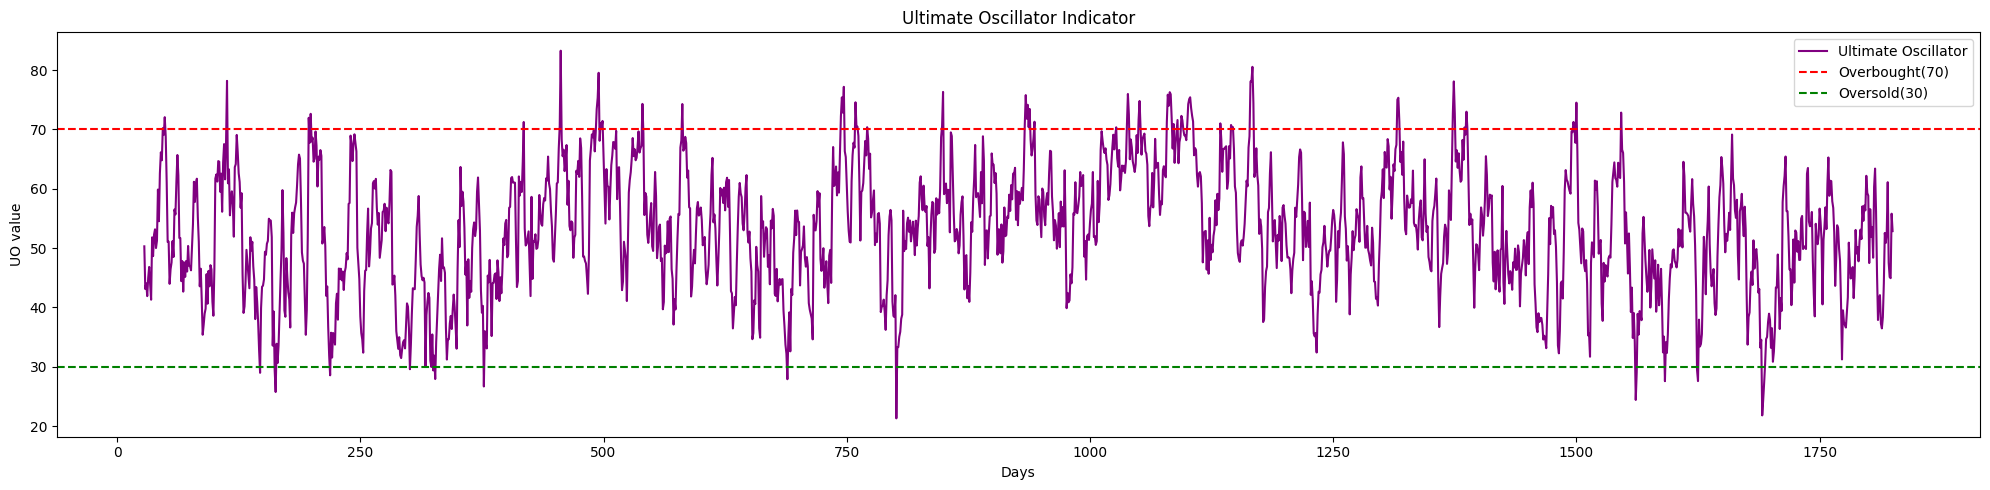

In [1714]:
#plot the UO Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['UO'], label='Ultimate Oscillator', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought(70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold(30)')
plt.title('Ultimate Oscillator Indicator')
plt.ylabel('UO value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

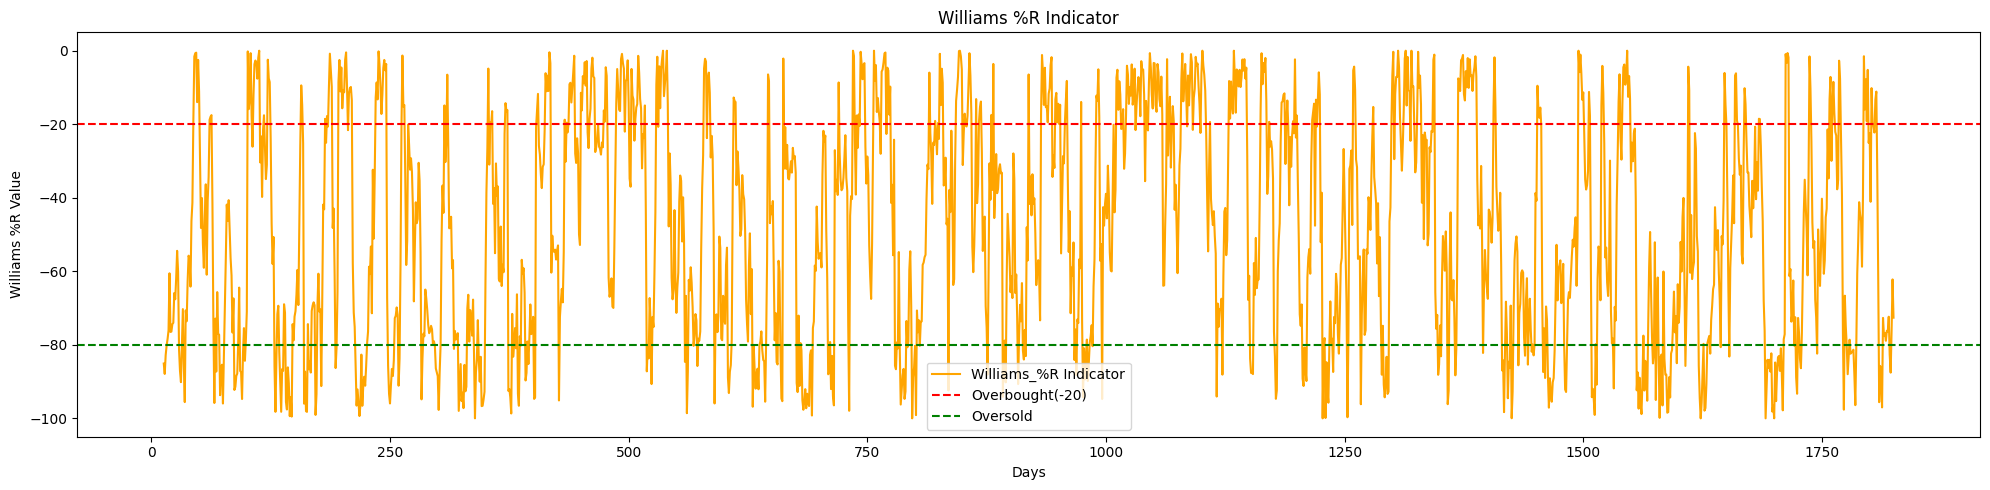

In [1715]:
#Implement WR Indicator
df['Williams_%R']=ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp=14).williams_r()

#plot the williams %R Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Williams_%R'], label='Williams_%R Indicator', color='orange')
plt.axhline(-20, label='Overbought(-20)', linestyle='--', color='red')
plt.axhline(-80, label='Oversold', linestyle='--', color='green')
plt.title('Williams %R Indicator')
plt.ylabel('Williams %R Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

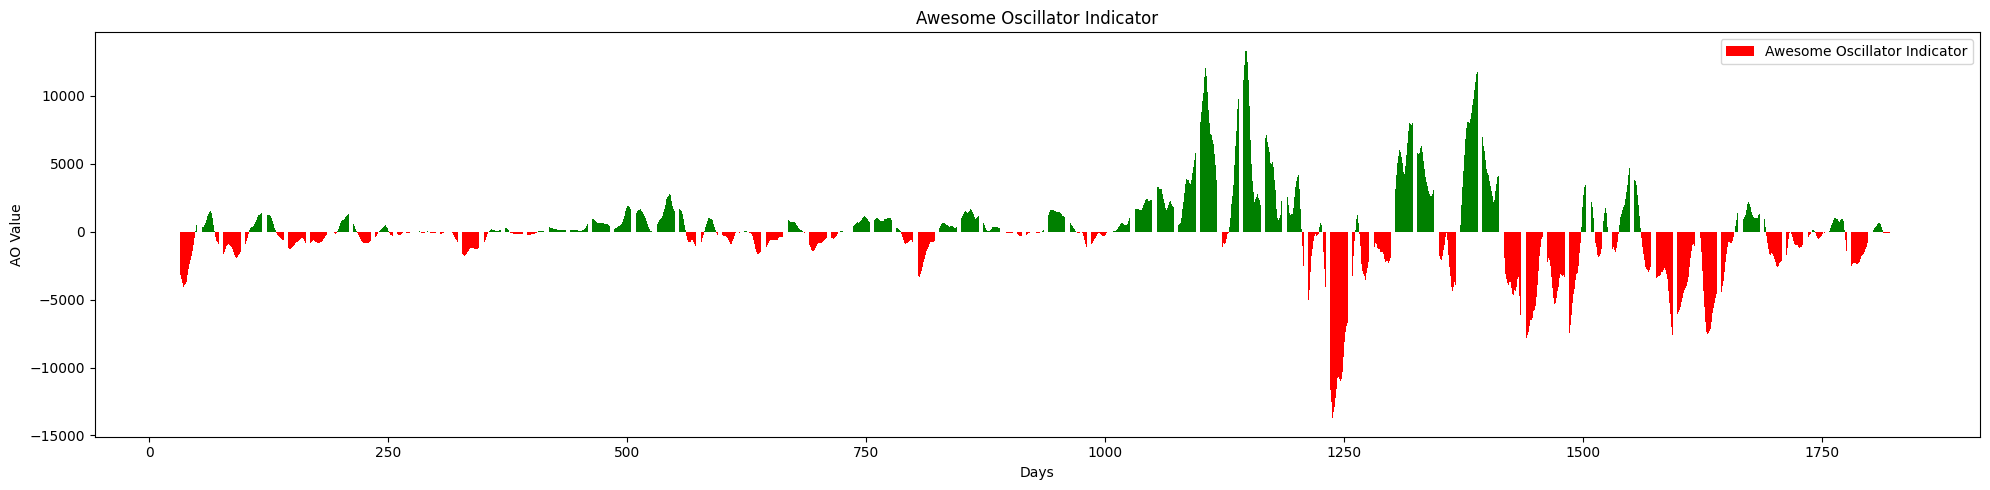

In [1716]:
#Implement Awesome Oscillator Indicator
df['AO']=ta.momentum.AwesomeOscillatorIndicator(high=df['High'], low=df['Low'], window1=5, window2=34).awesome_oscillator()

#plot the AO Indicator
plt.figure(figsize=(20,5))
plt.bar(df.index, df['AO'], label='Awesome Oscillator Indicator', color=(df['AO']>0).map({True:'green', False:'red'}))
plt.title('Awesome Oscillator Indicator')
plt.ylabel('AO Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

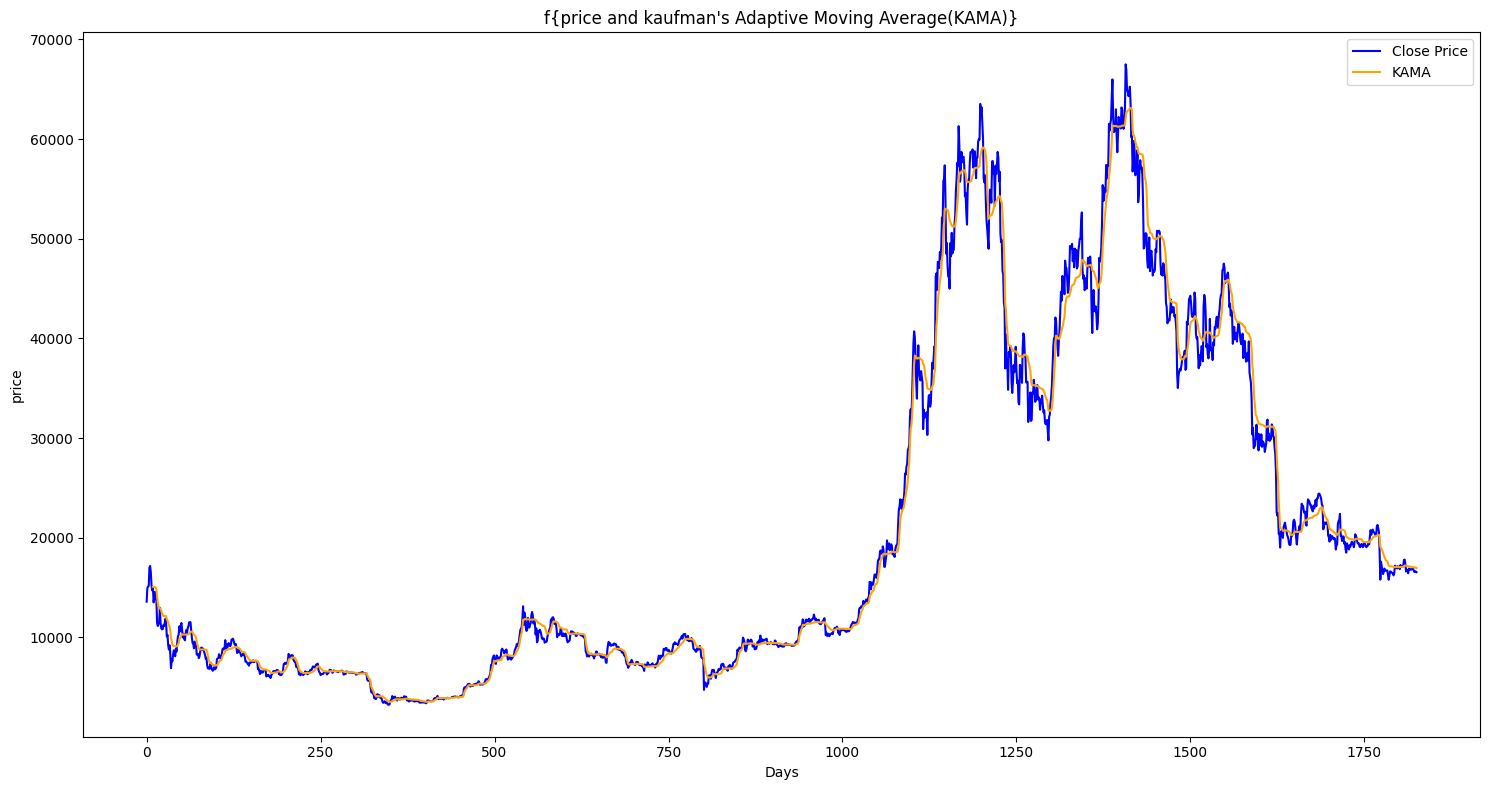

In [1717]:
#Implement KAMA Indicator
df['KAMA']=ta.momentum.KAMAIndicator(close=df['Close'], window=10, pow1=2, pow2=30).kama()

#plot the KAMA Indicator
plt.figure(figsize=(15,8))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['KAMA'], label='KAMA', color='orange')
plt.title("f{price and kaufman's Adaptive Moving Average(KAMA)}")
plt.ylabel('price')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

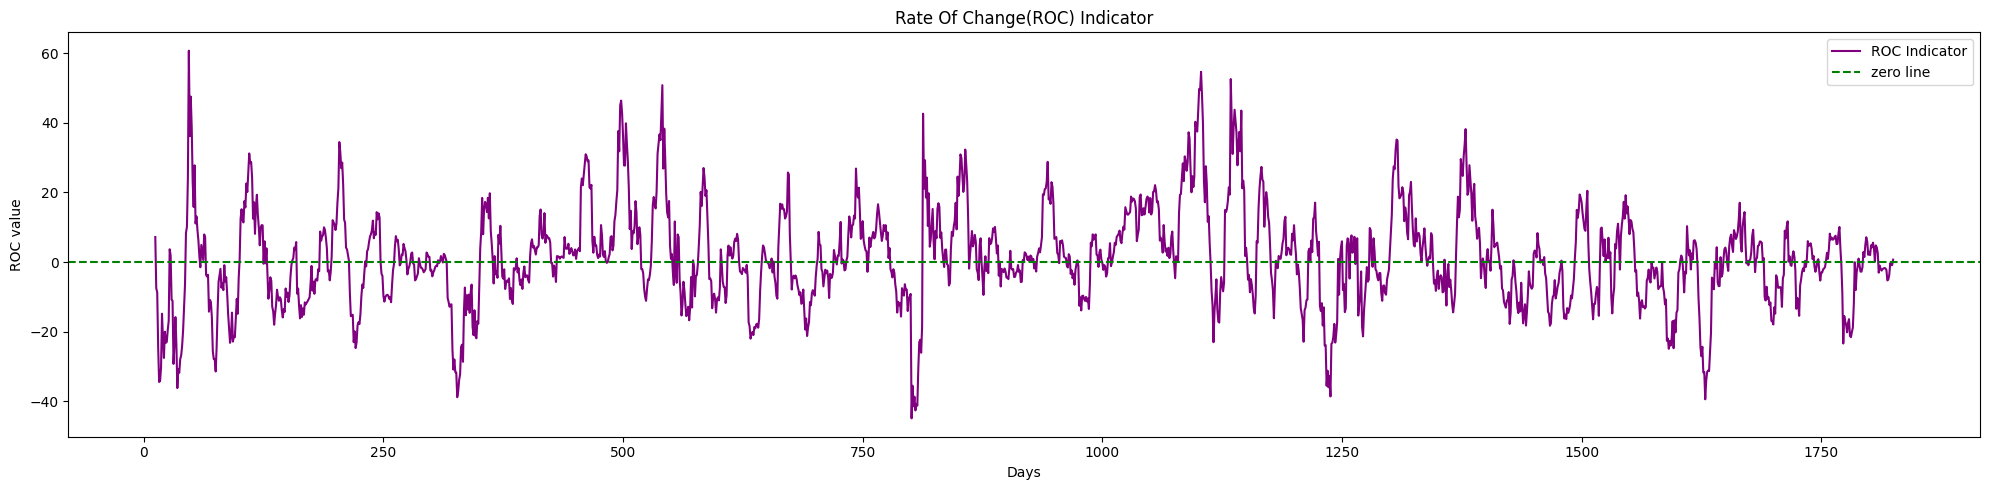

In [1718]:
#Implement Rate Of Change (ROC) Indicator
df['ROC']=ta.momentum.ROCIndicator(close=df['Close'], window=12).roc()

#plot the ROC Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['ROC'], label='ROC Indicator', color='purple')
plt.axhline(0, color='green', linestyle='--', label='zero line')
plt.title('Rate Of Change(ROC) Indicator')
plt.ylabel('ROC value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()

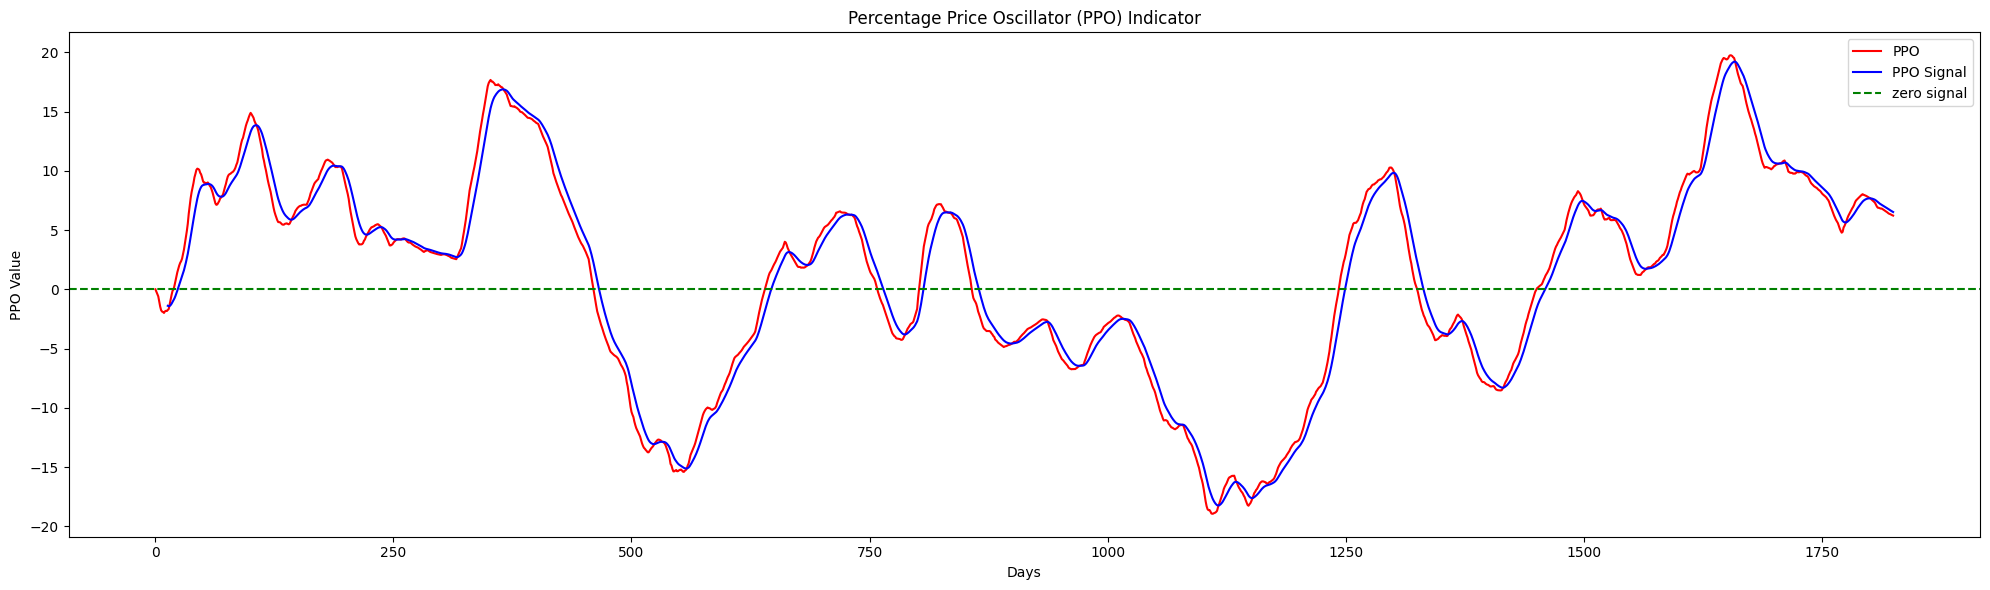

In [1719]:
#Implement Percentage Price Oscillator
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()

# Calculate the Fast and Slow EMAs
df['EMA_Fast'] = ema(df['Close'], window=50)
df['EMA_Slow'] = ema(df['Close'], window=100)
df['PPO']=((df['EMA_Slow']-df['EMA_Fast'])/df['EMA_Fast'])*100
df['PPO_Signal']=ta.trend.EMAIndicator(df['PPO']).ema_indicator()
#plot the PPO Indicator
plt.figure(figsize=(20,6))
plt.plot(df.index, df['PPO'], label='PPO', color='red')
plt.plot(df.index, df['PPO_Signal'], label='PPO Signal', color='blue')
plt.axhline(0, color='green', linestyle='--', label='zero signal')
plt.title('Percentage Price Oscillator (PPO) Indicator')
plt.ylabel('PPO Value')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()
df=df.drop('EMA_Fast',axis=1)
df=df.drop('EMA_Slow',axis=1)
df=df.drop('PPO',axis=1)

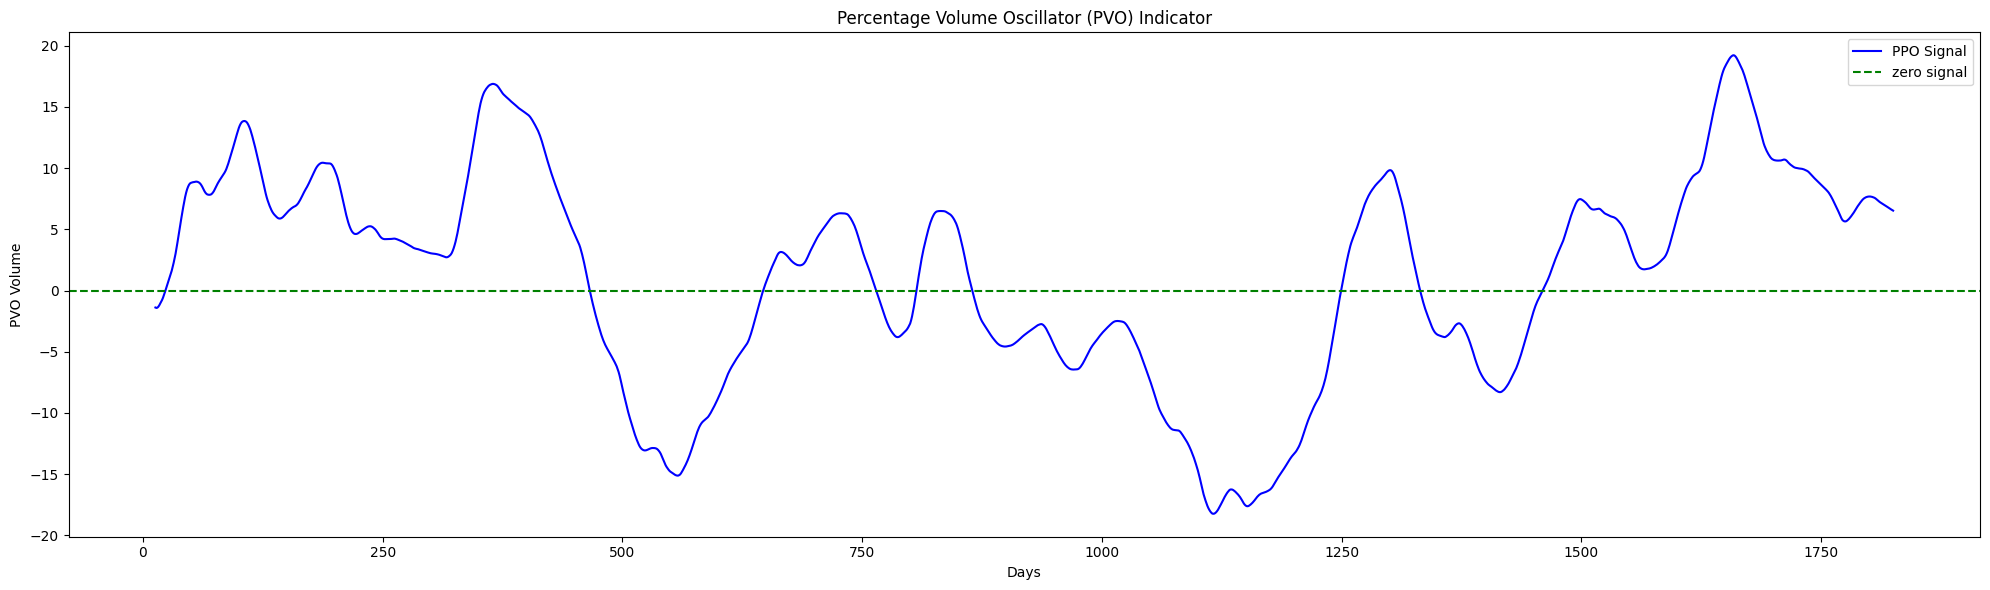

In [1720]:
#Implementation of Percentage Volume Oscillator Indicator
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()
df['EMA_Short'] = ema(df['Volume'], window=12)  # Short EMA (12 periods)
df['EMA_Long'] = ema(df['Volume'], window=26)   # Long EMA (26 periods)
df['PVO'] = ((df['EMA_Short'] - df['EMA_Long']) / df['EMA_Long']) * 100
df['PVO_Signal'] = ema(df['PVO'], window=9)
#plot the PVO Indicator
plt.figure(figsize=(20,6))
# plt.plot(df.index, df['PPO'], label='PPO', color='red')
plt.plot(df.index, df['PPO_Signal'], label='PPO Signal', color='blue')
plt.axhline(0, color='green', linestyle='--', label='zero signal')
plt.title('Percentage Volume Oscillator (PVO) Indicator')
plt.ylabel('PVO Volume')
plt.xlabel('Days')
plt.legend()
plt.tight_layout()
plt.show()
df = df.drop(['EMA_Short', 'EMA_Long','PVO'], axis=1)

<Axes: >

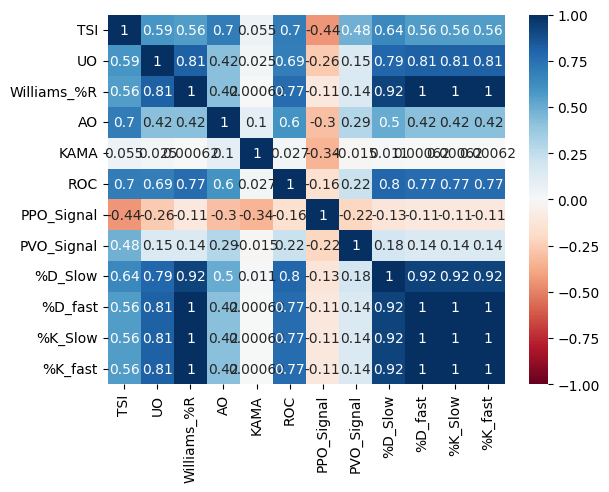

In [1721]:
import seaborn as sns
dataframe = df[['TSI','UO','Williams_%R','AO','KAMA','ROC','PPO_Signal','PVO_Signal','%D_Slow','%D_fast','%K_Slow','%K_fast']]
corr = dataframe.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)

In [1722]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

34
28


In [1723]:
                                        #Volume Indicator

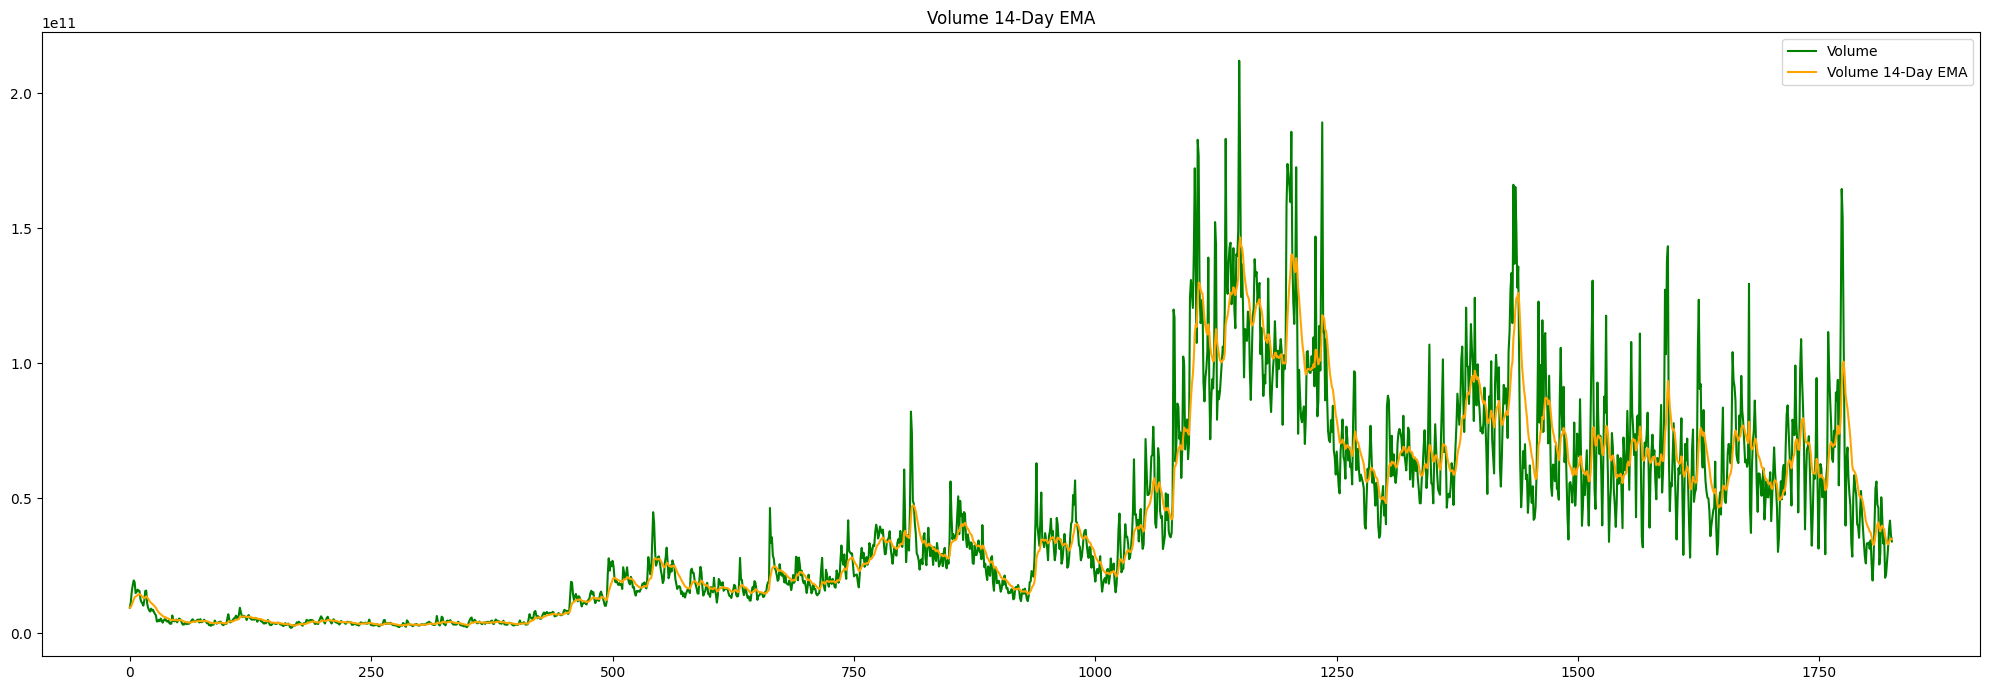

In [1724]:
# plot the VMA exponential
ema_period = 14
df['Volume_EMA'] = df['Volume'].ewm(span=ema_period, adjust=False).mean()

plt.figure(figsize=(20, 7))
plt.plot(df.index, df['Volume'], label='Volume', color='green')
plt.plot(df.index, df['Volume_EMA'], label=f'Volume {ema_period}-Day EMA', color='orange', linestyle="-")
plt.title(f'Volume {ema_period}-Day EMA')
plt.legend()

plt.tight_layout()
plt.show()


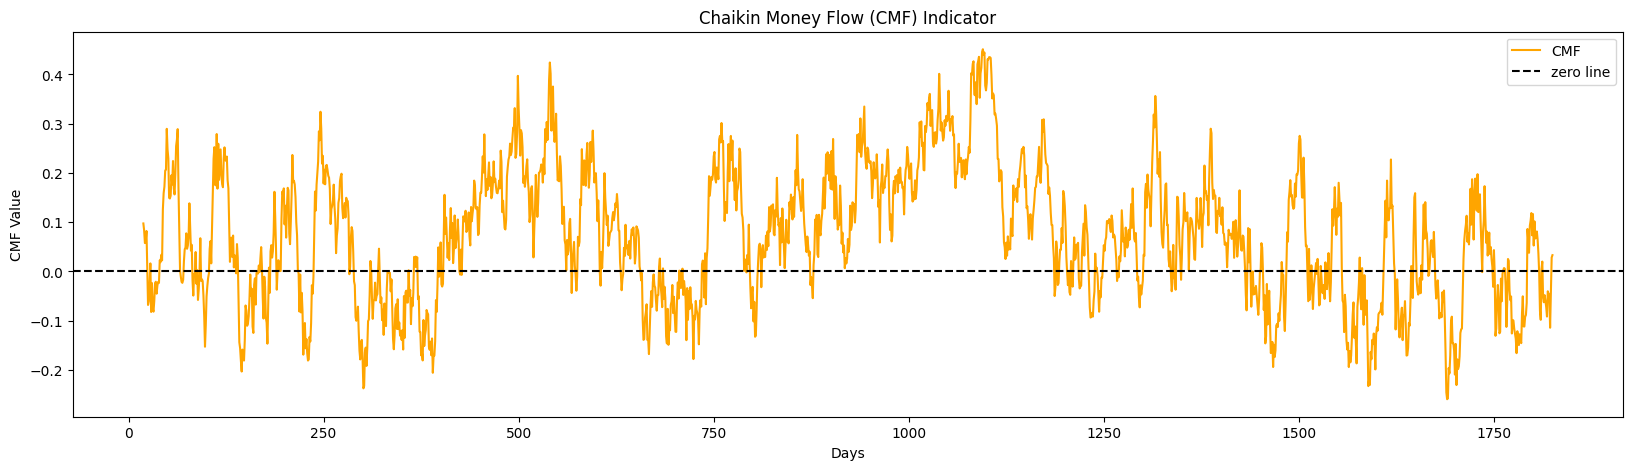

In [1725]:
#Implementation of Chaikin Money Flow Indicator
df['CMF']=ta.volume.ChaikinMoneyFlowIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume'], window=20).chaikin_money_flow()

#plot the CMF Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['CMF'], label='CMF', color='orange')
plt.axhline(0, color='black', linestyle='--', label='zero line')
plt.title('Chaikin Money Flow (CMF) Indicator')
plt.ylabel('CMF Value')
plt.xlabel('Days')
plt.legend()
plt.show()

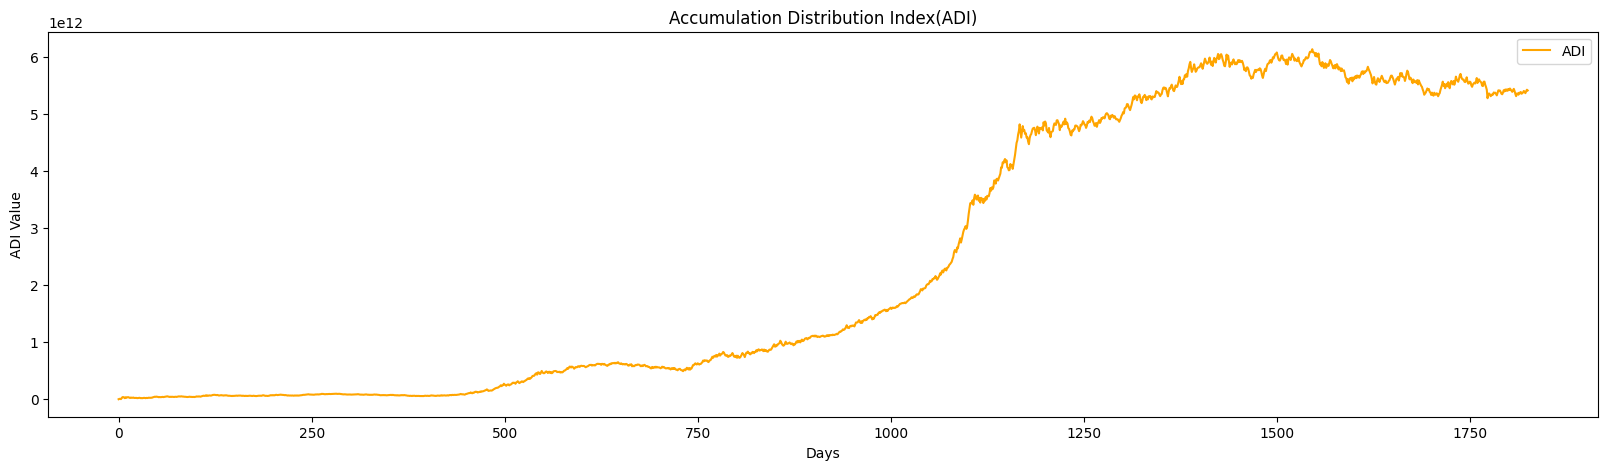

In [1726]:
#Implementation of Accumulation Distribution Index
df['ADI']=ta.volume.AccDistIndexIndicator(high=df['High'], low=df['Low'], close=df['Close'], volume=df['Volume']).acc_dist_index()

#plot the ADI Indicator
plt.figure(figsize=(20,5))
plt.plot(df.index, df['ADI'], label='ADI', color='orange')
plt.title('Accumulation Distribution Index(ADI)')
plt.ylabel('ADI Value')
plt.xlabel('Days')
plt.legend()
plt.show()

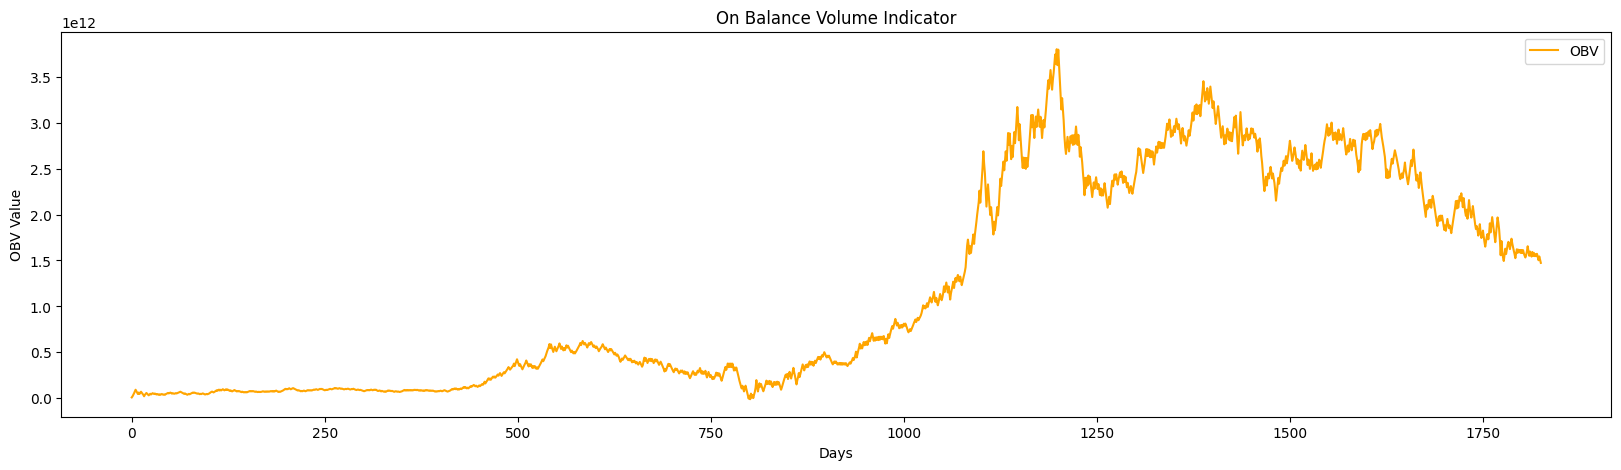

In [1727]:
#implementation of On Balance Volume(OBV) indicator
df['OBV']=ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['Volume']).on_balance_volume()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['OBV'], label='OBV', color='orange')
plt.title('On Balance Volume Indicator')
plt.ylabel('OBV Value')
plt.xlabel('Days')
plt.legend()
plt.show()

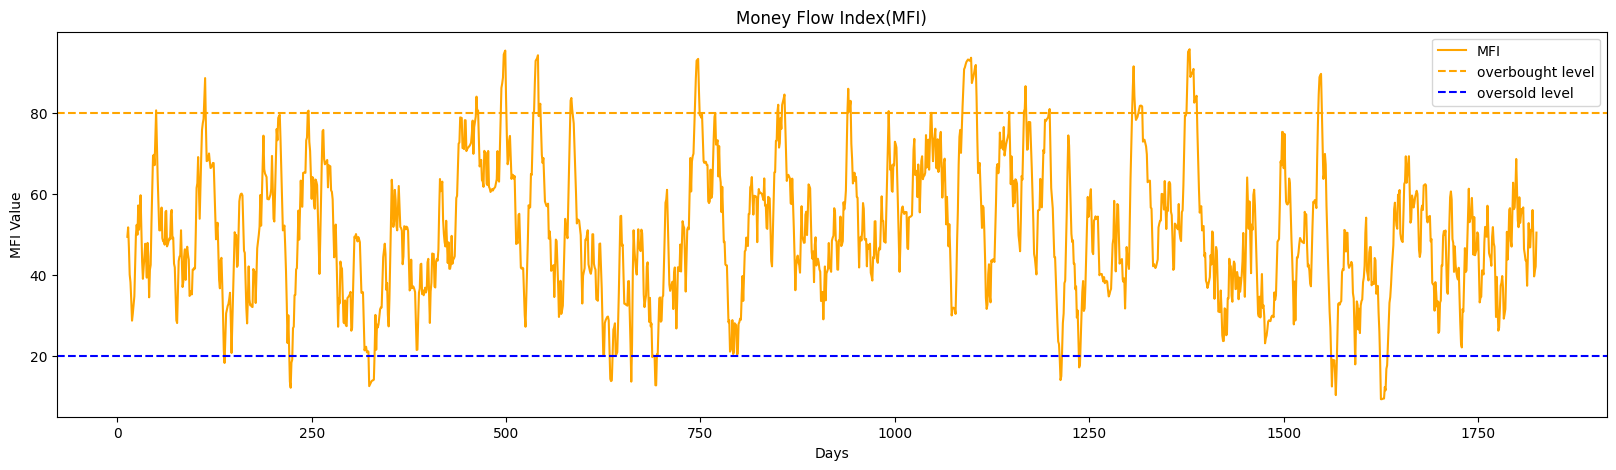

In [1728]:
#implementation of Money Flow Index(MFI) indicator
df['MFI']=ta.volume.MFIIndicator(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume'],window=14).money_flow_index()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['MFI'], label='MFI', color='orange')
plt.axhline(80, color='orange', linestyle='--', label='overbought level')
plt.axhline(20, color='blue', linestyle='--',label='oversold level')
plt.title('Money Flow Index(MFI)')
plt.ylabel('MFI Value')
plt.xlabel('Days')
plt.legend()
plt.show()

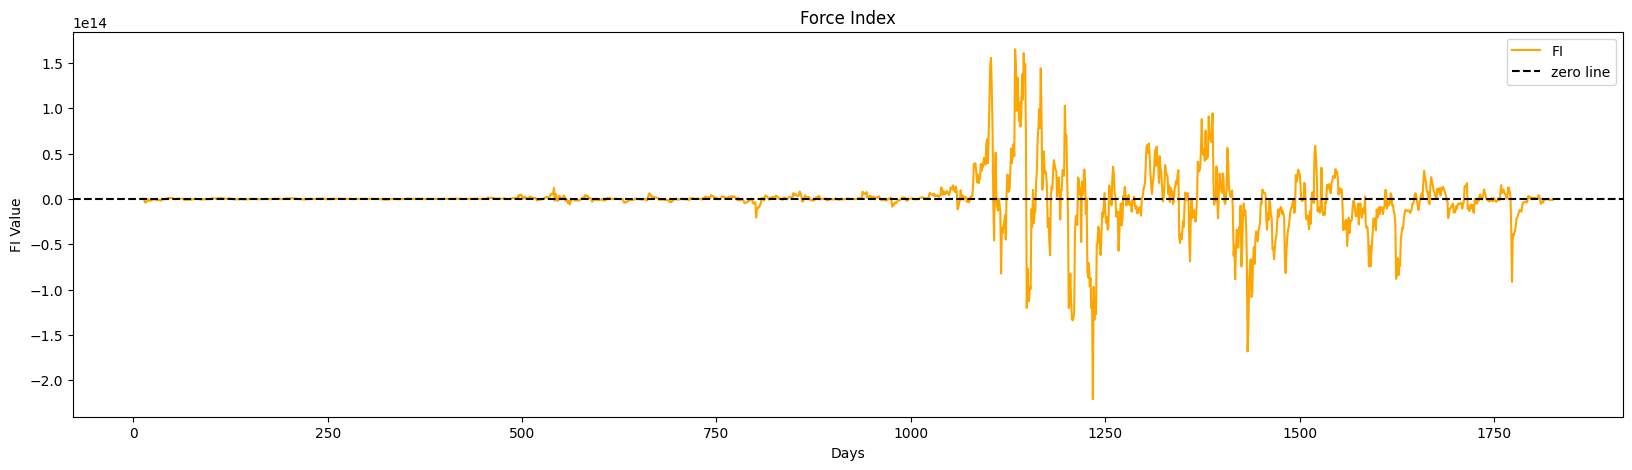

In [1729]:
#implementation of Force Index(FI) indicator
df['FI']=ta.volume.ForceIndexIndicator(close=df['Close'], volume=df['Volume'],window=13).force_index()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['FI'], label='FI', color='orange')
plt.title('Force Index Indicator')
plt.axhline(0, color='black', linestyle='--',label='zero line')
plt.title('Force Index')
plt.ylabel('FI Value')
plt.xlabel('Days')
plt.legend()
plt.show()

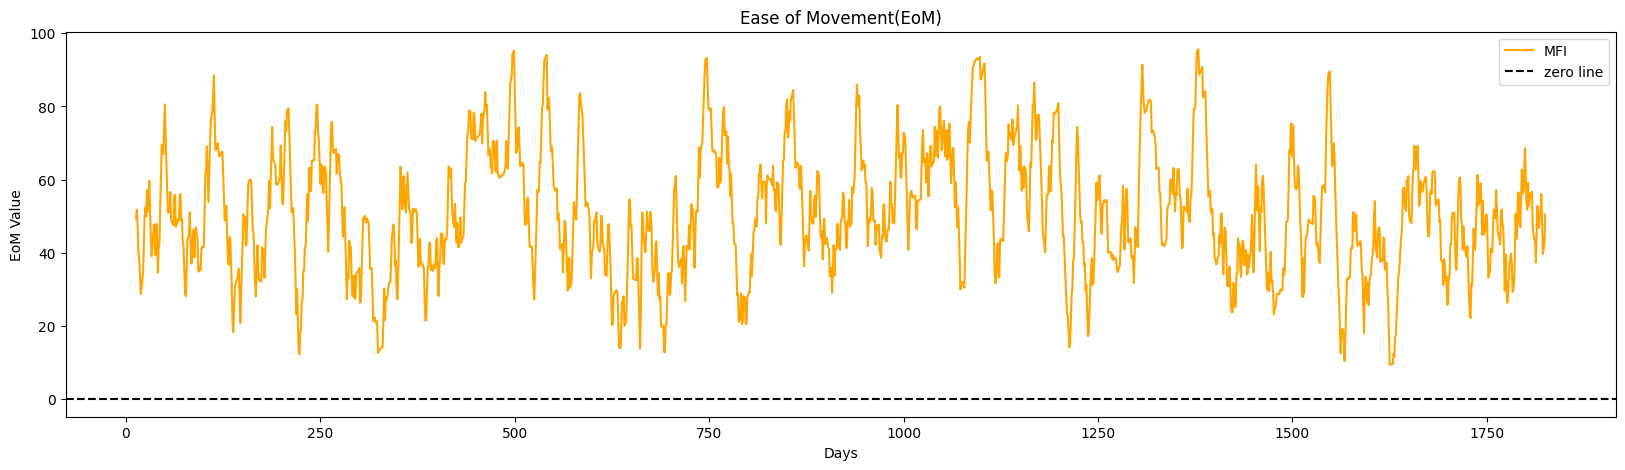

In [1730]:
#implementation of Ease of Movement(EoM,EMV) indicator
df['EoM']=ta.volume.EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'],window=14).ease_of_movement()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['MFI'], label='MFI', color='orange')
plt.axhline(0, color='black', linestyle='--', label='zero line')
plt.title('Ease of Movement(EoM)')
plt.ylabel('EoM Value')
plt.xlabel('Days')
plt.legend()
plt.show()

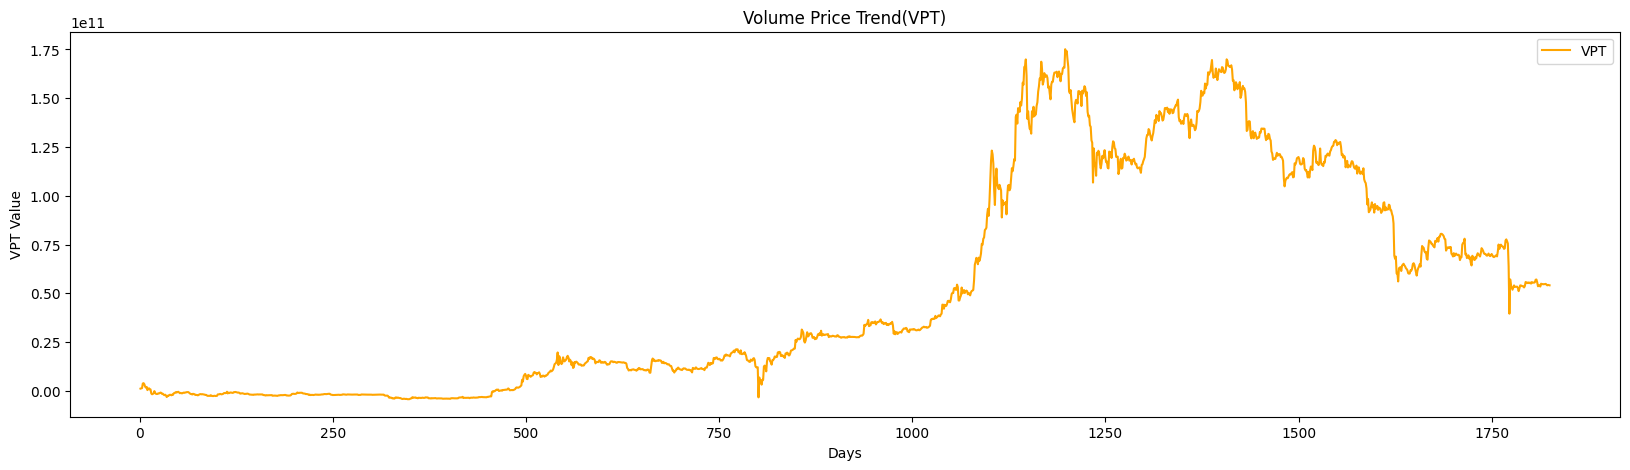

In [1731]:
#implementation of Volume Price Trend(VPT) indicator
df['VPT']=ta.volume.VolumePriceTrendIndicator(close=df['Close'],volume=df['Volume']).volume_price_trend()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['VPT'], label='VPT', color='orange')
plt.title('Volume Price Trend(VPT)')
plt.ylabel('VPT Value')
plt.xlabel('Days')
plt.legend()
plt.show()

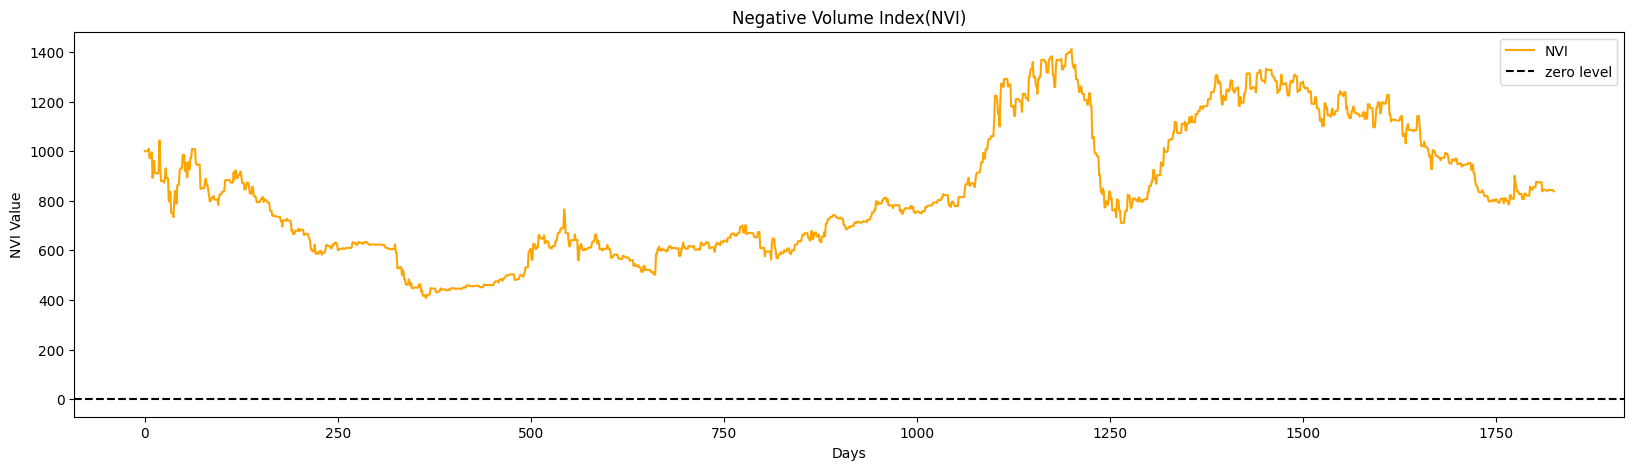

In [1732]:
#implementation of Negative Volume Index(NVI) indicator
df['NVI']=ta.volume.NegativeVolumeIndexIndicator(close=df['Close'],volume=df['Volume']).negative_volume_index()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['NVI'], label='NVI', color='orange')
plt.axhline(0, color='black', linestyle='--', label='zero level')
plt.title('Negative Volume Index(NVI)')
plt.ylabel('NVI Value')
plt.xlabel('Days')
plt.legend()
plt.show()

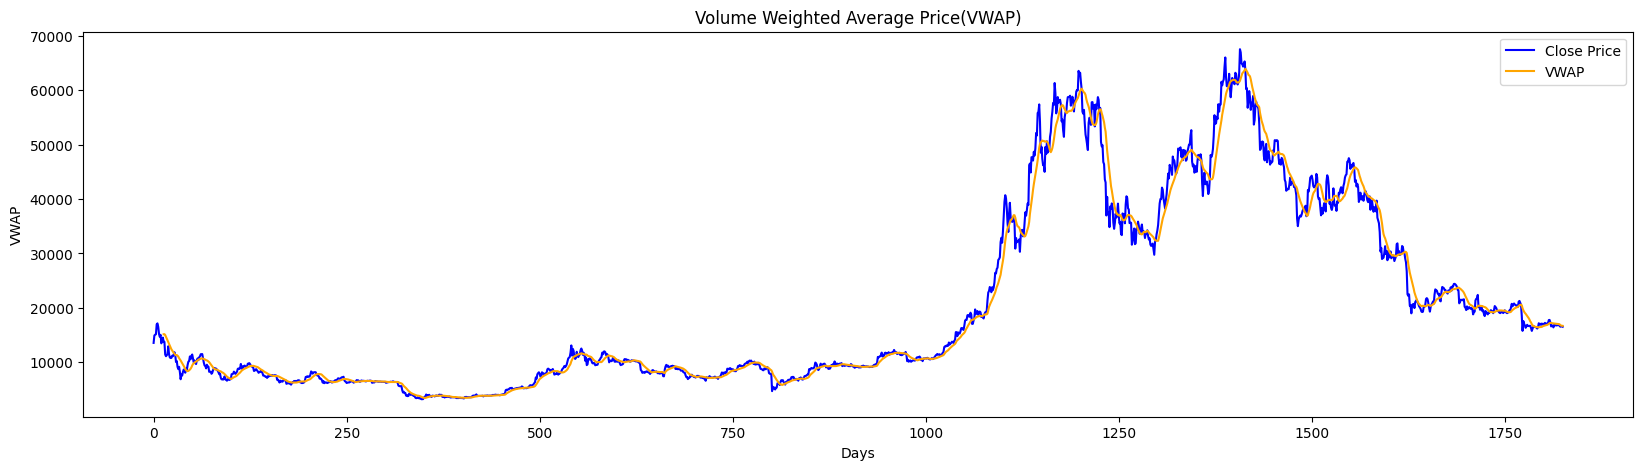

In [1733]:
#implementation of Volume Weighted Average Price(VWAP) indicator
df['VWAP']=ta.volume.VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Close'],volume=df['Volume']).volume_weighted_average_price()
plt.figure(figsize=(20,5))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['VWAP'], label='VWAP', color='orange')
plt.title('Volume Weighted Average Price(VWAP)')
plt.ylabel('VWAP')
plt.xlabel('Days')
plt.legend()
plt.show()

<Axes: >

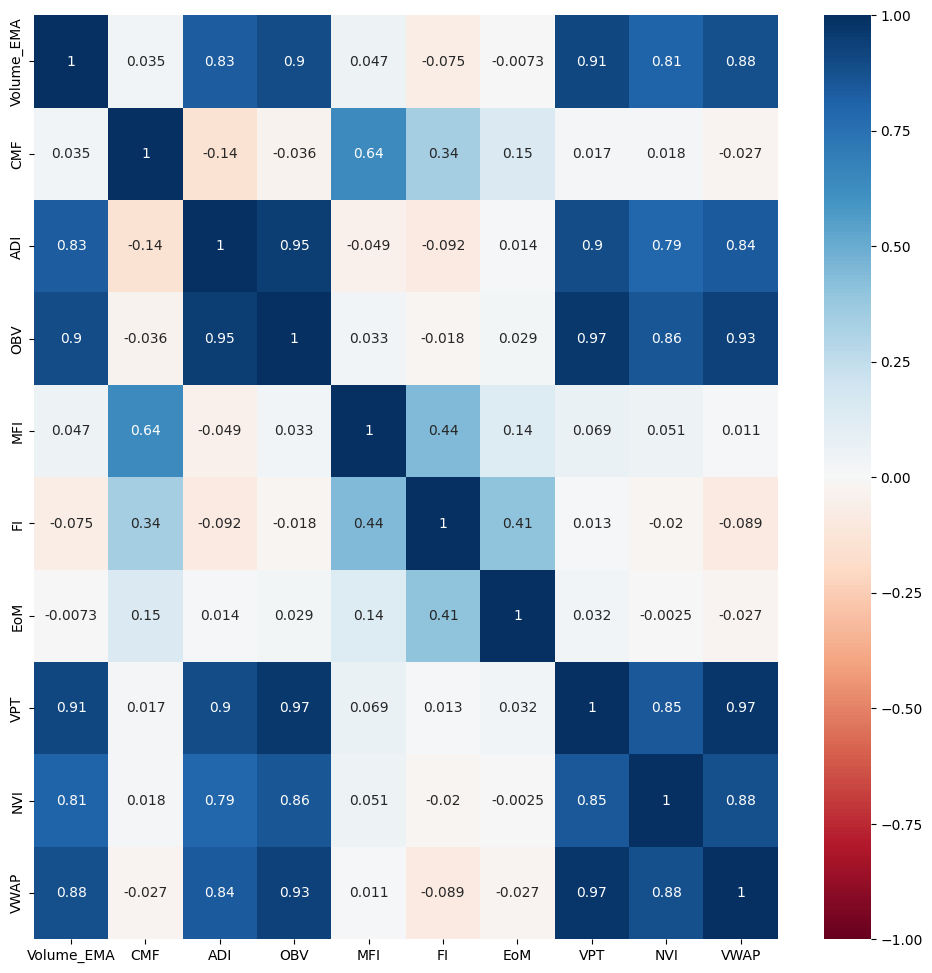

In [1734]:
import seaborn as sns
dataframe = df[['Volume_EMA','CMF','ADI','OBV','MFI','FI','EoM','VPT','NVI','VWAP']]
corr = dataframe.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)

In [1735]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

38
33


In [1736]:
                                              #Volatility Indicators

In [1737]:

import mplfinance as mpf


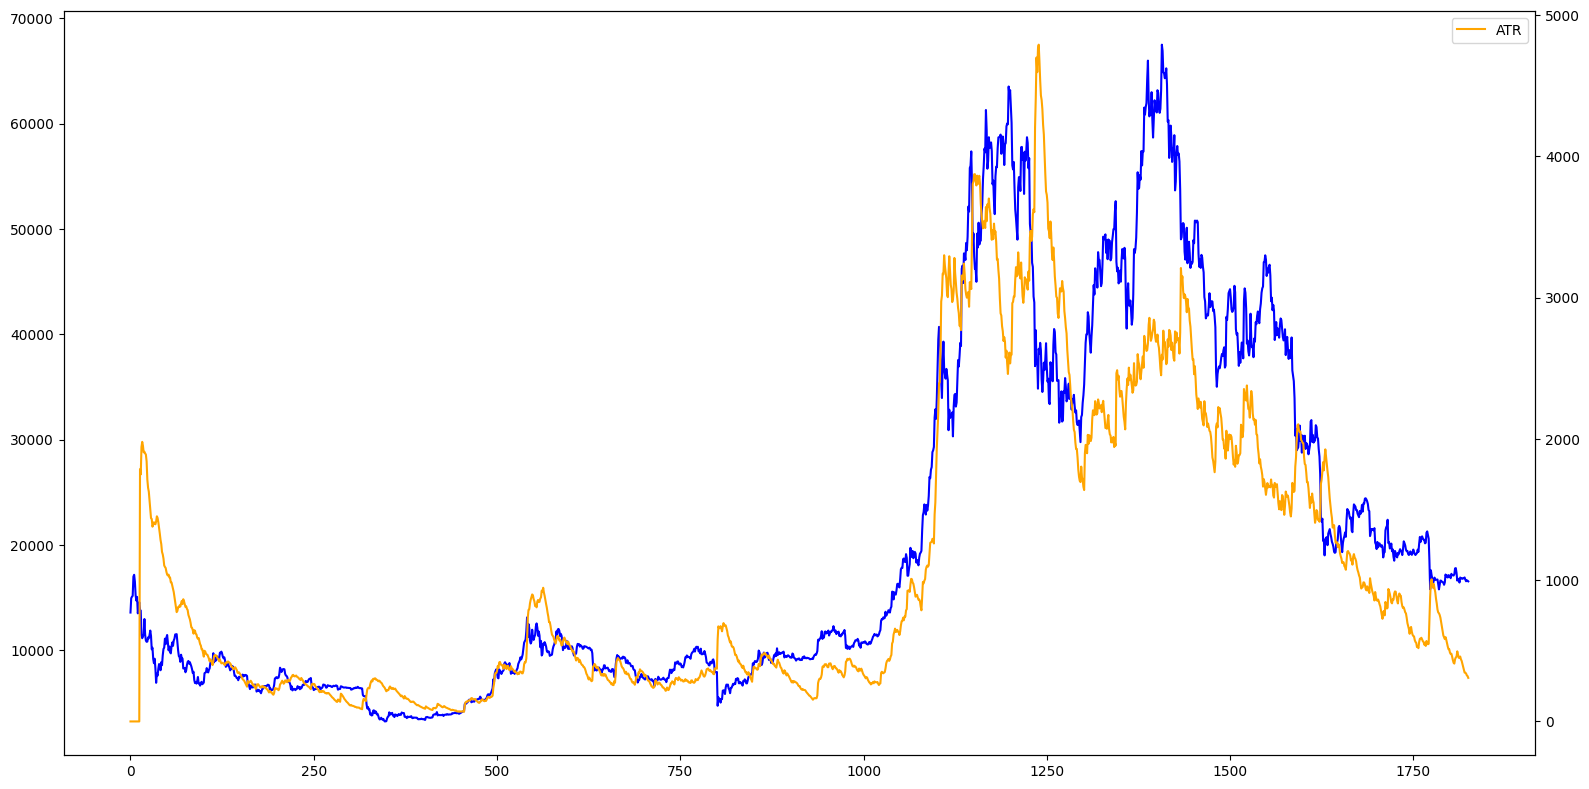

In [1738]:

# Average True Range
df['ATR'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14).average_true_range()

# Plot Average True Range(ATR) vs Close
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2  =  ax1.twinx()
ax1.plot(df.index, df['Close'], label='Close Price', color='blue')
ax2.plot(df.index, df['ATR'], label='ATR', color='orange')
plt.legend()
plt.tight_layout()
plt.show()

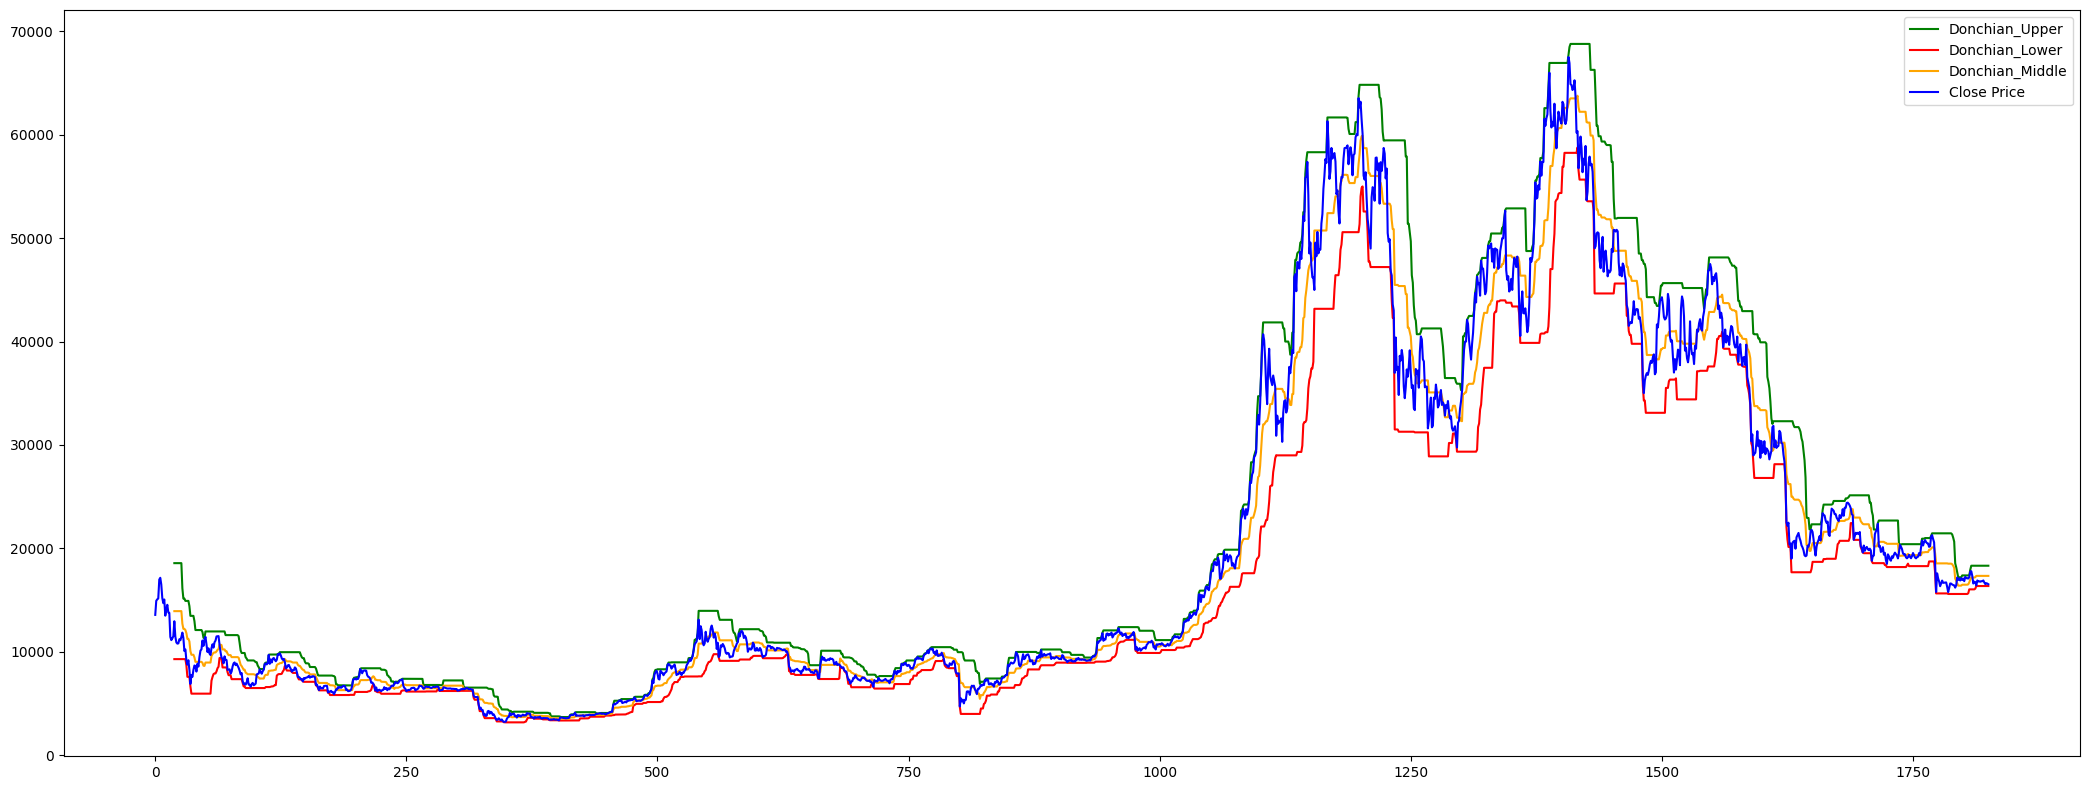

In [1739]:
# Donchian Channel
df['Donchian_Upper'] = df['High'].rolling(window=20).max()
df['Donchian_Lower'] = df['Low'].rolling(window=20).min()
df['Donchian_Middle'] = (df['Donchian_Upper'] +df['Donchian_Lower'])/2

# plot Donchian channel
plt.figure(figsize=(21,8))
plt.plot(df.index, df['Donchian_Upper'], label='Donchian_Upper', color='green')
plt.plot(df.index, df['Donchian_Lower'], label='Donchian_Lower', color='red')
plt.plot(df.index, df['Donchian_Middle'], label='Donchian_Middle', color='orange')
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.legend()
plt.tight_layout()
plt.show()

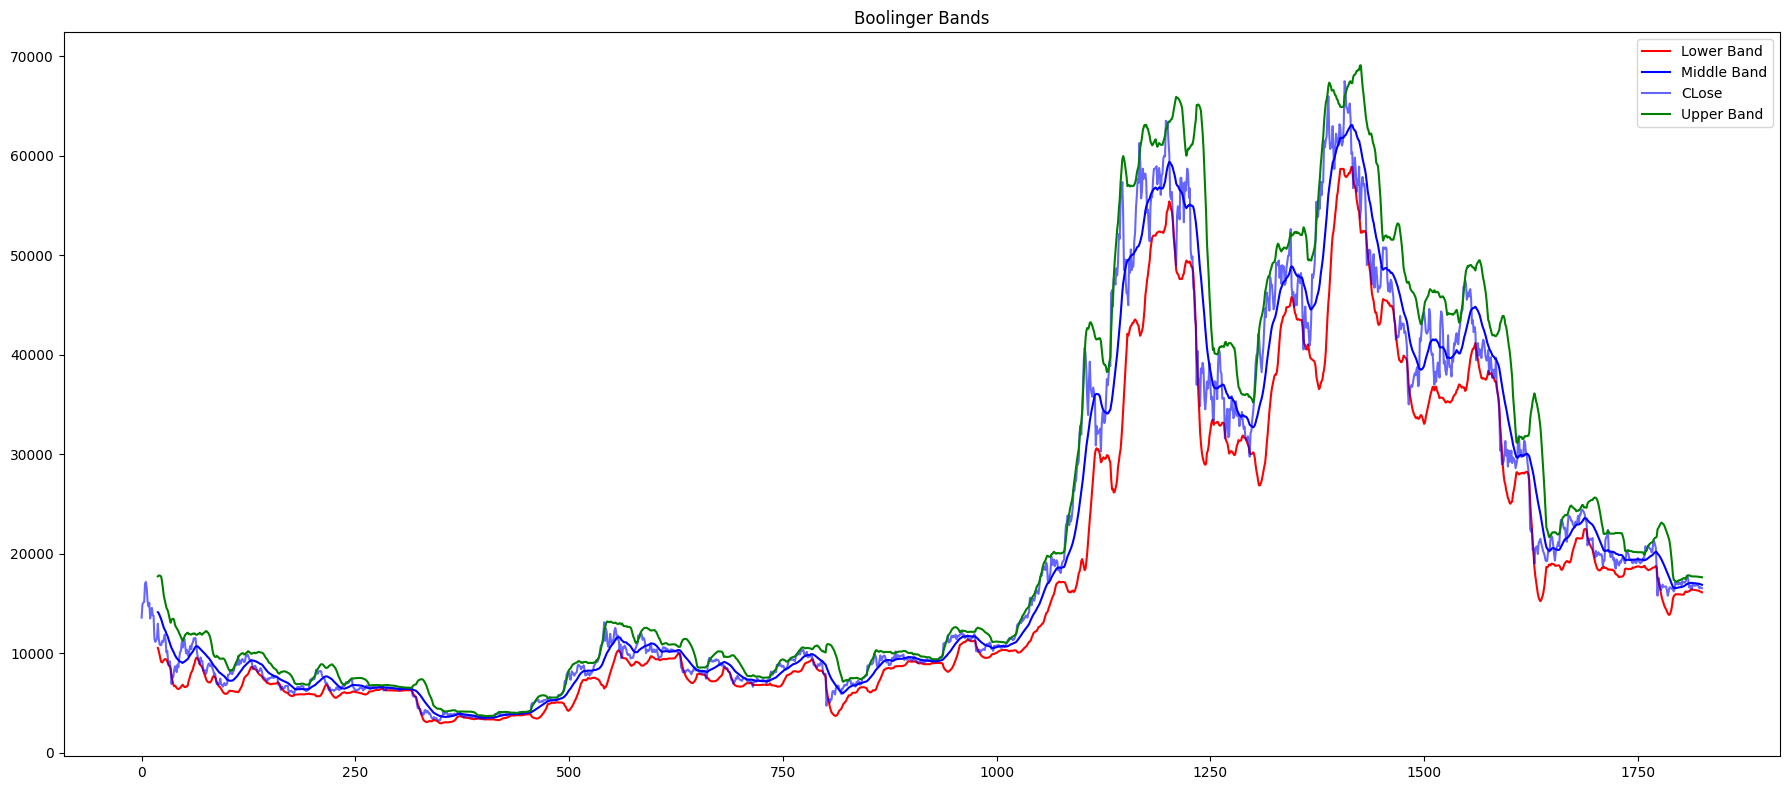

In [1740]:
# Boolinger Bands
df['Bollinger_Middle'] = df['Close'].rolling(window=20).mean()
df['Bollinger_Upper'] = df['Bollinger_Middle'] + 2 * df['Close'].rolling(window=20).std()
df['Bollinger_Lower'] = df['Bollinger_Middle'] - 2 * df['Close'].rolling(window=20).std()

# plot Boolinger Bands
plt.figure(figsize=(18,8))
plt.plot(df.index, df['Bollinger_Lower'], label='Lower Band', color='red')
plt.plot(df.index, df['Bollinger_Middle'], label='Middle Band', color='blue')
plt.plot(df.index, df['Close'], label='CLose', color='blue',alpha=0.6)
plt.plot(df.index, df['Bollinger_Upper'], label='Upper Band', color='green')
plt.legend()
plt.title('Boolinger Bands')
plt.tight_layout()
plt.show()

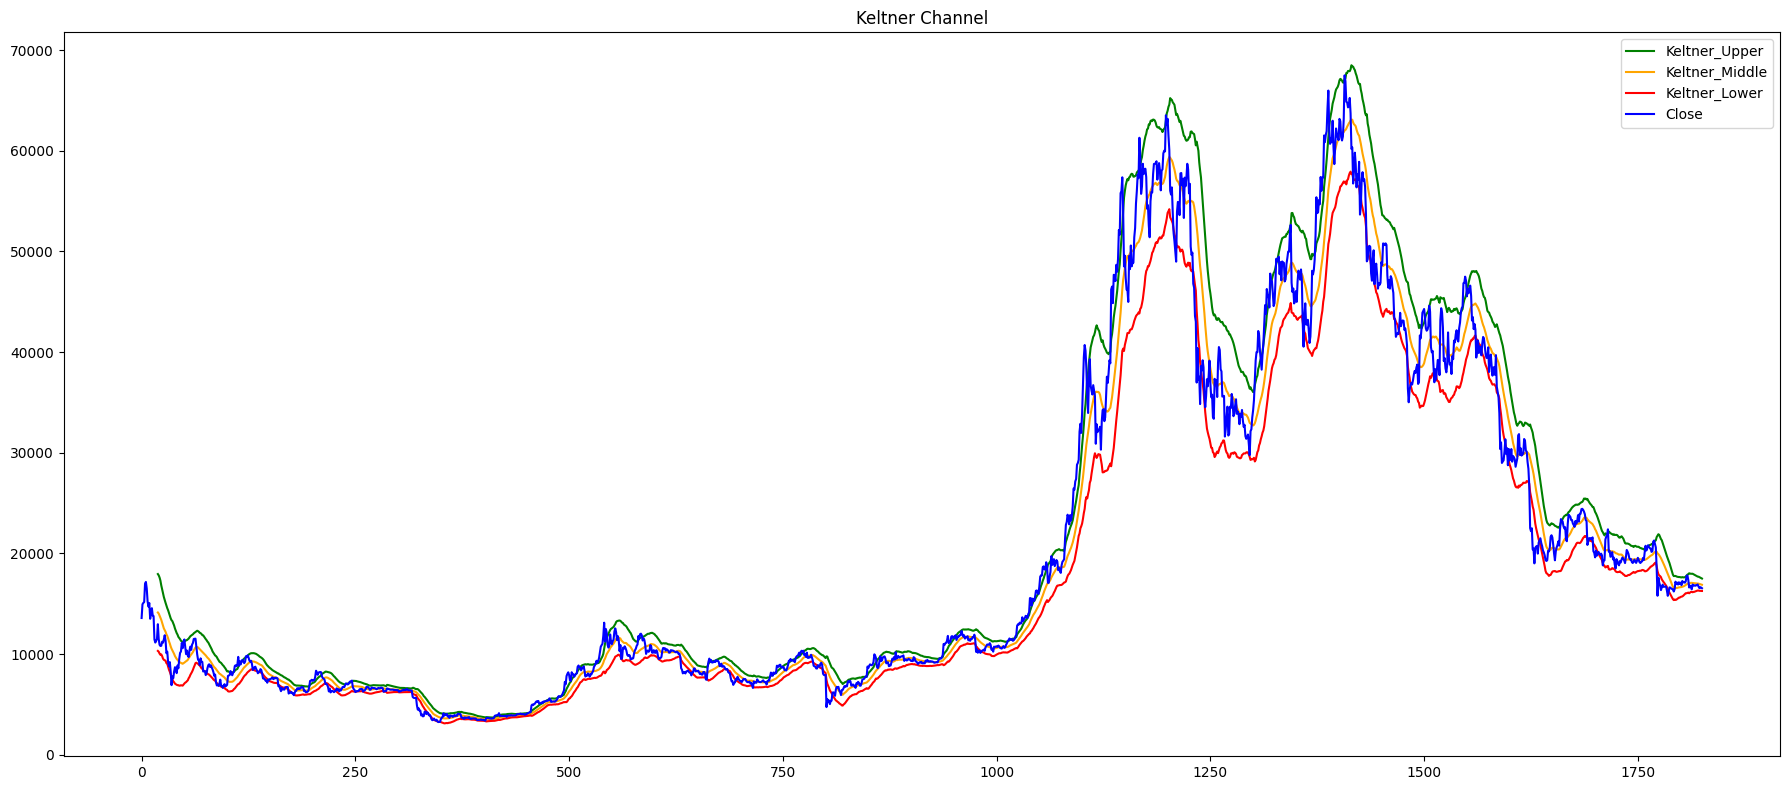

In [1741]:
# Keltner Channel
df['Keltner_Middle'] = df['Close'].rolling(window=20).mean()
df['Keltner_Upper'] = df['Keltner_Middle'] + 2 * df['ATR']
df['Keltner_Lower'] = df['Keltner_Middle'] - 2 * df['ATR']


plt.figure(figsize=(18,8))
plt.plot(df.index, df['Keltner_Upper'],label='Keltner_Upper', color='green')
plt.plot(df.index, df['Keltner_Middle'],label='Keltner_Middle', color='orange')
plt.plot(df.index, df['Keltner_Lower'],label='Keltner_Lower', color='red')
plt.plot(df.index, df['Close'],label='Close', color='blue')
plt.legend()
plt.title('Keltner Channel')
plt.tight_layout()
plt.show()

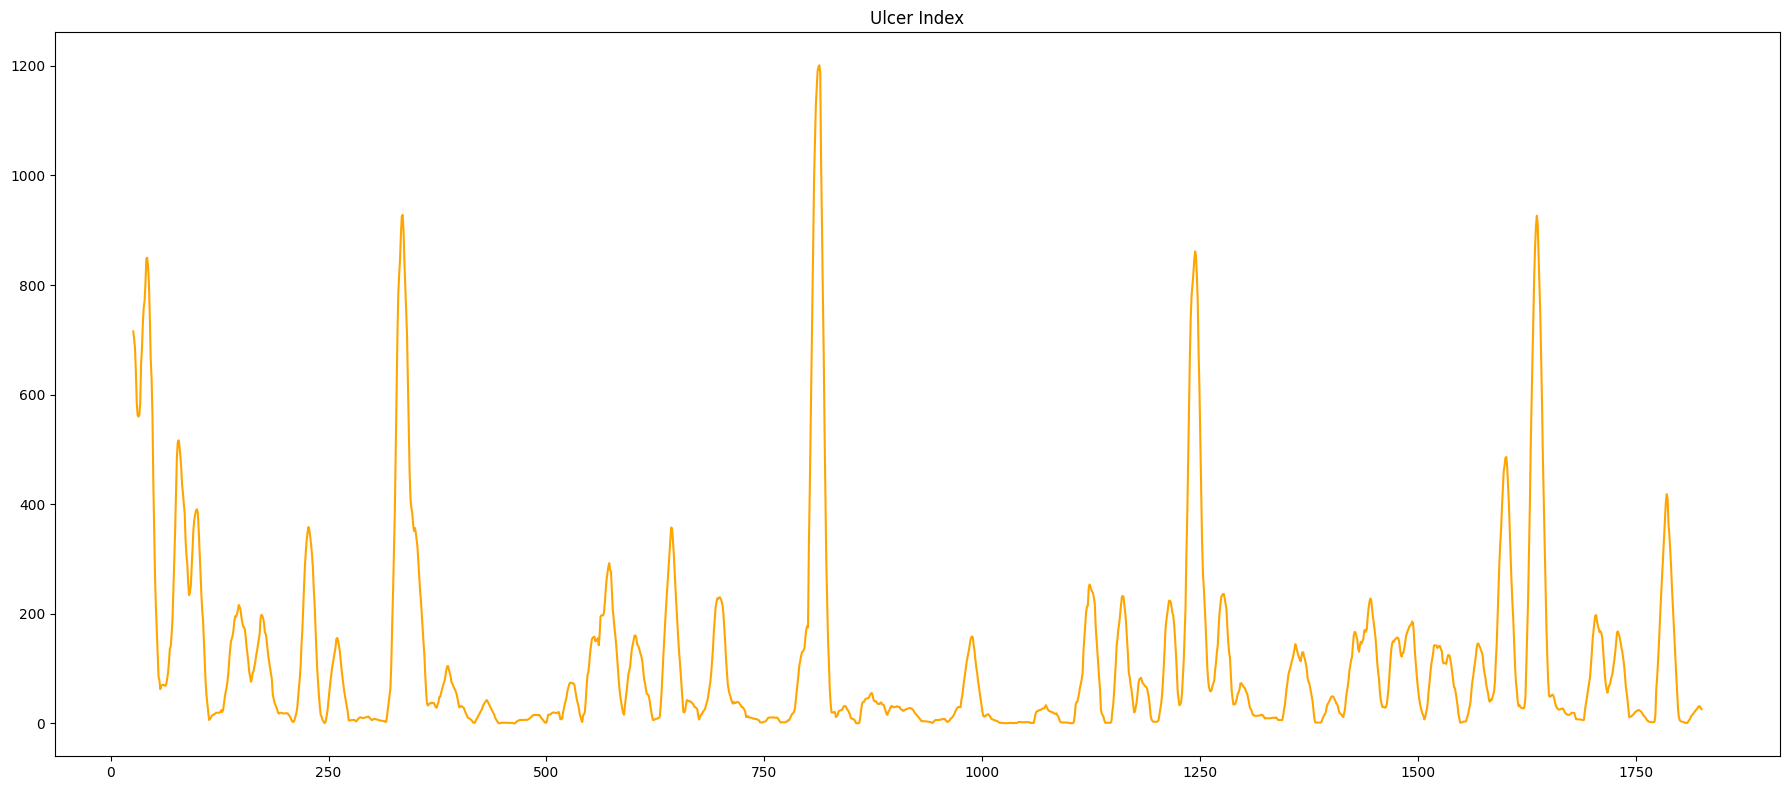

In [1742]:
# Ulcer Index
df['Drawdown_squared'] =(((df['Close']-df['Close'].rolling(14).max())*100)/df['Close'].rolling(14).max())**2
df['Ulcer_Index']=df['Drawdown_squared'].rolling(14).mean()
df=df.drop('Drawdown_squared',axis=1)
plt.figure(figsize=(18,8))
plt.plot(df.index, df['Ulcer_Index'], label='Ulcer Index', color='orange')

plt.title('Ulcer Index')
plt.tight_layout()
plt.show()

<Axes: >

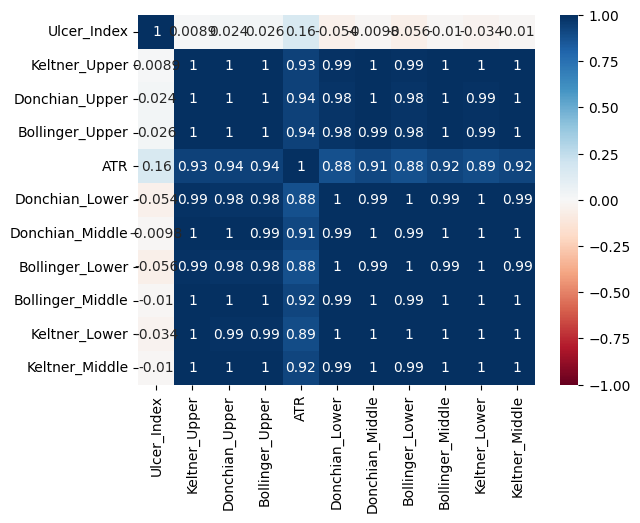

In [1743]:
import seaborn as sns
dataframe = df[['Ulcer_Index','Keltner_Upper','Donchian_Upper','Bollinger_Upper','ATR','Donchian_Lower','Donchian_Middle','Bollinger_Lower','Bollinger_Middle','Keltner_Lower','Keltner_Middle']]
corr = dataframe.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1,vmax = 1, annot=True)


In [1744]:
print(f'{df.shape[1]}')
#Dropping one of highly pairwise correlated features
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
# Drop the highly correlated features
df = df.drop(columns=to_drop)
print(f'{df.shape[1]}')

44
35


In [1745]:
df['Returns']=(df['Close']-df['Close'].shift(1))/df['Close'].shift(1)
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df


Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

      PVO_Signal    Volume_EMA       CMF        MFI            FI  \
0       0.000000  9.527935e+09       NaN        NaN           NaN   
1       0.328362  9.793446e+09       NaN        NaN           NaN   
2       1.446065  1.055248e+10       NaN        NaN           NaN   
3       3.261809  1.152599e+10       NaN        NaN           NaN   
4       5.542940  1.260385e+10       NaN        NaN           NaN   
...          ...           ...       ...        ...           ...   
1821   -9.704777  3.302983e+10 -0.046938  49.113864 -8.871320e+11   
1822   -9.672358  3.377292e+10 -0.114404  39.681165 -1.623321e+12   
1823   -9.125367  3.484124e+10 -0.038362  41.079190 -8.454530e+11   
1824   -8.508915  3.505595e+10  0.028189  42.108759 -9.209548e+11   
1825   -7.969816  3.492387e+10  0.032988  50.467134 -1.107677e+12   

               EoM  Keltner_Upper  Ulcer_Index   Returns  Log_Returns  
0              NaN            NaN          NaN       NaN          NaN  
1     11454.176428            NaN          NaN  0.100241     0.095529  
2      5516.394239            NaN          NaN  0.009437     0.009393  
3      5956.437352            NaN          NaN  0.005620     0.005604  
4      6080.471607            NaN          NaN  0.120369     0.113658  
...            ...            ...          ...       ...          ...  
1821    -64.353555   17683.007515    29.949294 -0.011975    -0.012048  
1822   -121.628497   17637.553301    31.430030 -0.009366    -0.009410  
1823    -16.812342   17586.634728    31.132325  0.005526     0.005511  
1824    -49.592561   17551.919292    28.168637 -0.002265    -0.002268  
1825     22.002253   17497.870086    26.196880 -0.003939    -0.003947  

[1826 rows x 37 columns]

0.001041938050100515

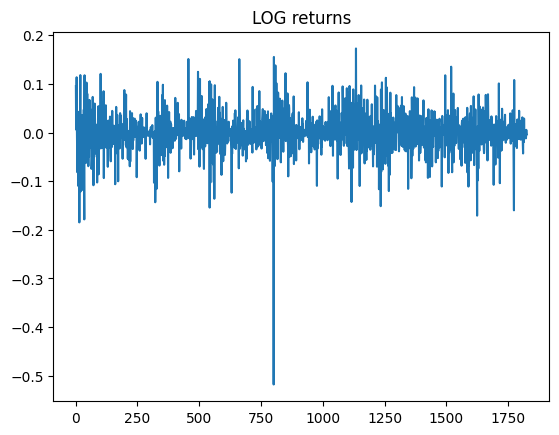

In [1746]:


df['Log_Returns'].plot(title='LOG returns')
df['Log_Returns'].dropna(inplace=True)
df['Log_Returns'].describe()
df['Log_Returns'].median()



Text(0, 0.5, 'Frequency')

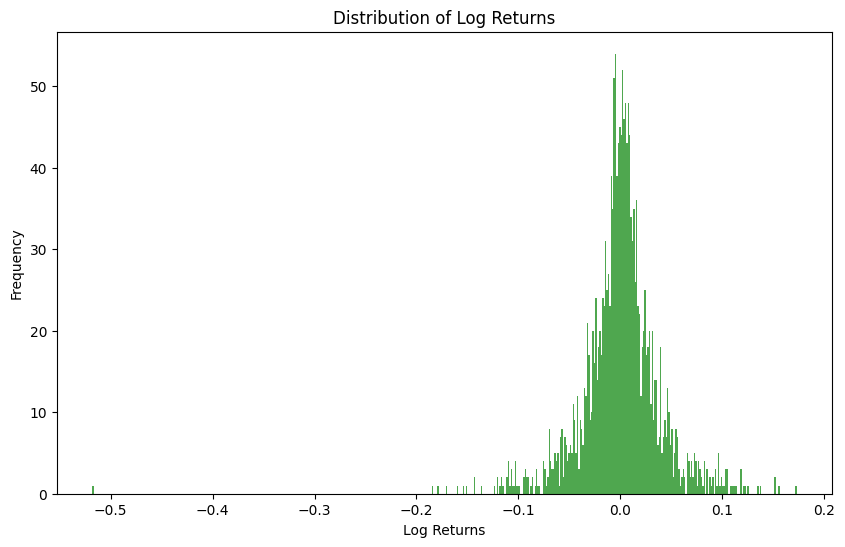

In [1747]:
# Distribution of Log Returns
# We are using log returns as they are more normally distributed than simple intraday returns.
#Even though log returns follow normal distribution for large dataset , they follow student t's distribution more closely for smaller samples as we will show later
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Distribution of Log Returns')
plt.hist(df['Log_Returns'],bins=500, color='green', alpha=0.69)
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

# New Section

In [1748]:
print(f'{df.shape[1]}')
df

37


Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11           NaN        NaN  ...   
1     14938.176676  1.151926e+10  2.345984e+11           NaN        NaN  ...   
2     15079.152185  1.548623e+10  2.538832e+11           NaN        NaN  ...   
3     15163.898948  1.785376e+10  2.510367e+11           NaN        NaN  ...   
4     16989.161482  1.960998e+10  2.718434e+11           NaN        NaN  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

      PVO_Signal    Volume_EMA       CMF        MFI            FI  \
0       0.000000  9.527935e+09       NaN        NaN           NaN   
1       0.328362  9.793446e+09       NaN        NaN           NaN   
2       1.446065  1.055248e+10       NaN        NaN           NaN   
3       3.261809  1.152599e+10       NaN        NaN           NaN   
4       5.542940  1.260385e+10       NaN        NaN           NaN   
...          ...           ...       ...        ...           ...   
1821   -9.704777  3.302983e+10 -0.046938  49.113864 -8.871320e+11   
1822   -9.672358  3.377292e+10 -0.114404  39.681165 -1.623321e+12   
1823   -9.125367  3.484124e+10 -0.038362  41.079190 -8.454530e+11   
1824   -8.508915  3.505595e+10  0.028189  42.108759 -9.209548e+11   
1825   -7.969816  3.492387e+10  0.032988  50.467134 -1.107677e+12   

               EoM  Keltner_Upper  Ulcer_Index   Returns  Log_Returns  
0              NaN            NaN          NaN       NaN          NaN  
1     11454.176428            NaN          NaN  0.100241     0.095529  
2      5516.394239            NaN          NaN  0.009437     0.009393  
3      5956.437352            NaN          NaN  0.005620     0.005604  
4      6080.471607            NaN          NaN  0.120369     0.113658  
...            ...            ...          ...       ...          ...  
1821    -64.353555   17683.007515    29.949294 -0.011975    -0.012048  
1822   -121.628497   17637.553301    31.430030 -0.009366    -0.009410  
1823    -16.812342   17586.634728    31.132325  0.005526     0.005511  
1824    -49.592561   17551.919292    28.168637 -0.002265    -0.002268  
1825     22.002253   17497.870086    26.196880 -0.003939    -0.003947  

[1826 rows x 37 columns]

In [1749]:
df['Log_Returns']=df['Log_Returns'].shift(-1)
df['Trade_Calls']=df['Log_Returns'].apply(lambda x:1 if x>0 else 0)
df = df.fillna(0) #since xgboost can deal with missing values if they are input as 0 , this is an advantage of using this approach
log_returns = df['Log_Returns'].copy()
df=df.drop('Log_Returns',axis=1)
df

Start         End          Open          High           Low  \
0     2018-01-01  2018-01-02  14046.002764  14521.965544  12980.811131   
1     2018-01-02  2018-01-03  13644.693035  15468.208138  13195.873515   
2     2018-01-03  2018-01-04  14895.275367  15646.498638  14470.737671   
3     2018-01-04  2018-01-05  15168.972365  16708.709267  14286.669853   
4     2018-01-05  2018-01-06  15197.764745  17161.635004  14878.048174   
...          ...         ...           ...           ...           ...   
1821  2022-12-27  2022-12-28  16919.823027  16963.002980  16631.430000   
1822  2022-12-28  2022-12-29  16706.249402  16762.014600  16488.762900   
1823  2022-12-29  2022-12-30  16547.534921  16655.070278  16503.195500   
1824  2022-12-30  2022-12-31  16636.993115  16639.843547  16379.532500   
1825  2022-12-31  2023-01-01  16608.070868  16632.899700  16495.873732   

             Close        Volume    Market Cap       SMA_100     RSI_20  ...  \
0     13577.188555  9.527935e+09  2.292229e+11      0.000000   0.000000  ...   
1     14938.176676  1.151926e+10  2.345984e+11      0.000000   0.000000  ...   
2     15079.152185  1.548623e+10  2.538832e+11      0.000000   0.000000  ...   
3     15163.898948  1.785376e+10  2.510367e+11      0.000000   0.000000  ...   
4     16989.161482  1.960998e+10  2.718434e+11      0.000000   0.000000  ...   
...            ...           ...           ...           ...        ...  ...   
1821  16706.459710  3.144405e+10  3.229231e+11  18259.838680  45.178431  ...   
1822  16549.983266  3.860298e+10  3.197136e+11  18229.572141  43.625623  ...   
1823  16641.444864  4.178537e+10  3.188295e+11  18207.254584  44.793094  ...   
1824  16603.751953  3.645157e+10  3.180110e+11  18188.273899  44.394263  ...   
1825  16538.347900  3.406534e+10  3.183907e+11  18159.366051  43.683836  ...   

      PVO_Signal    Volume_EMA       CMF        MFI            FI  \
0       0.000000  9.527935e+09  0.000000   0.000000  0.000000e+00   
1       0.328362  9.793446e+09  0.000000   0.000000  0.000000e+00   
2       1.446065  1.055248e+10  0.000000   0.000000  0.000000e+00   
3       3.261809  1.152599e+10  0.000000   0.000000  0.000000e+00   
4       5.542940  1.260385e+10  0.000000   0.000000  0.000000e+00   
...          ...           ...       ...        ...           ...   
1821   -9.704777  3.302983e+10 -0.046938  49.113864 -8.871320e+11   
1822   -9.672358  3.377292e+10 -0.114404  39.681165 -1.623321e+12   
1823   -9.125367  3.484124e+10 -0.038362  41.079190 -8.454530e+11   
1824   -8.508915  3.505595e+10  0.028189  42.108759 -9.209548e+11   
1825   -7.969816  3.492387e+10  0.032988  50.467134 -1.107677e+12   

               EoM  Keltner_Upper  Ulcer_Index   Returns  Trade_Calls  
0         0.000000       0.000000     0.000000  0.000000            1  
1     11454.176428       0.000000     0.000000  0.100241            1  
2      5516.394239       0.000000     0.000000  0.009437            1  
3      5956.437352       0.000000     0.000000  0.005620            1  
4      6080.471607       0.000000     0.000000  0.120369            1  
...            ...            ...          ...       ...          ...  
1821    -64.353555   17683.007515    29.949294 -0.011975            0  
1822   -121.628497   17637.553301    31.430030 -0.009366            1  
1823    -16.812342   17586.634728    31.132325  0.005526            0  
1824    -49.592561   17551.919292    28.168637 -0.002265            0  
1825     22.002253   17497.870086    26.196880 -0.003939            0  

[1826 rows x 37 columns]

In [1750]:
df.dtypes.value_counts()

float64    32
object      2
bool        2
int64       1
Name: count, dtype: int64

In [1751]:
df.columns

Index(['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       'SMA_100', 'RSI_20', 'Buy', 'Sell', 'MACD', 'MACD_Signal', 'MACD_diff',
       'ADX', '-DI', 'TRIX_30', 'Mass_Index', 'DPO', 'KST_Signal', 'STC',
       'TSI', 'UO', 'AO', 'KAMA', 'PPO_Signal', 'PVO_Signal', 'Volume_EMA',
       'CMF', 'MFI', 'FI', 'EoM', 'Keltner_Upper', 'Ulcer_Index', 'Returns',
       'Trade_Calls'],
      dtype='object')

In [1752]:
columns_to_drop = ['Start','End','Buy','Sell','Market Cap','Open','High','Low','Returns','Close','MACD_Signal','MACD','Volume']
df=df.drop(columns=columns_to_drop)
X=df.drop('Trade_Calls',axis=1).copy()
Y=df['Trade_Calls'].copy()
print(X)
print(Y)

           SMA_100     RSI_20  MACD_diff        ADX        -DI   TRIX_30  \
0         0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
1         0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
2         0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
3         0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
4         0.000000   0.000000   0.000000   0.000000   0.000000  0.000000   
...            ...        ...        ...        ...        ...       ...   
1821  18259.838680  45.178431  26.107809  21.011390  29.183679 -0.213969   
1822  18229.572141  43.625623  16.324325  21.111523  29.991675 -0.209623   
1823  18207.254584  44.793094  13.773002  21.206649  29.388362 -0.205473   
1824  18188.273899  44.394263  11.072717  21.431082  30.016409 -0.201538   
1825  18159.366051  43.683836   7.240132  21.644293  29.445128 -0.197872   

      Mass_Index         DPO  KST_Signal        STC  ...          KAMA  \
0       0.000

**THESE ARE THE FINAL SET OF INDICATORS THAT WE WILL USE FOR TRAINING THE BOOSTED TREE XGBOOST MODEL**

In [1753]:
df.columns

Index(['SMA_100', 'RSI_20', 'MACD_diff', 'ADX', '-DI', 'TRIX_30', 'Mass_Index',
       'DPO', 'KST_Signal', 'STC', 'TSI', 'UO', 'AO', 'KAMA', 'PPO_Signal',
       'PVO_Signal', 'Volume_EMA', 'CMF', 'MFI', 'FI', 'EoM', 'Keltner_Upper',
       'Ulcer_Index', 'Trade_Calls'],
      dtype='object')

# New Section

In [1754]:
file_path='/content/drive/My Drive/bitcoin_usd_next.csv'
df2=pd.read_csv(file_path)
df2_inverted = df2.iloc[::-1]
df2_inverted = df2_inverted.reset_index(drop=True)
df2 =df2_inverted
df2

Start         End          Open          High           Low  \
0    2023-01-01  2023-01-02  16537.454200  16621.165100  16507.390600   
1    2023-01-02  2023-01-03  16617.254396  16758.525308  16560.090732   
2    2023-01-03  2023-01-04  16673.748747  16763.447292  16616.632381   
3    2023-01-04  2023-01-05  16674.508700  16973.381191  16658.433945   
4    2023-01-05  2023-01-06  16852.132786  16877.126600  16781.464800   
..          ...         ...           ...           ...           ...   
644  2024-10-06  2024-10-07  62000.060000  62915.020000  61839.920000   
645  2024-10-07  2024-10-08  62845.990000  64436.040000  62213.980000   
646  2024-10-08  2024-10-09  62319.440000  63130.040000  61912.010000   
647  2024-10-09  2024-10-10  62130.050000  62530.420000  60439.870000   
648  2024-10-10  2024-10-11  60603.900000  61300.020000  59017.000000   

            Close        Volume    Market Cap  
0    16607.069459  2.350878e+10  3.181669e+11  
1    16677.449944  2.485967e+10  3.207060e+11  
2    16675.909037  2.964833e+10  3.207174e+11  
3    16857.282709  3.938416e+10  3.233862e+11  
4    16828.846400  3.896006e+10  3.234474e+11  
..            ...           ...           ...  
644  62823.430000  7.363212e+10  1.230673e+12  
645  62300.750000  9.609529e+10  1.252777e+12  
646  62215.970000  1.072401e+11  1.233788e+12  
647  60647.990000  9.309215e+10  1.222680e+12  
648  60260.020000  9.341987e+10  1.197203e+12  

[649 rows x 8 columns]

**IMPLEMENTATION OF THE SHORTLISTED INDICATORS FOR THE BACKTESTING DATA 2022-CURRENT DATE**

In [1755]:
#Implementation of feature indicators
df2['SMA_100']=ta.trend.SMAIndicator(close=df2['Close'],window=100).sma_indicator()
df2['RSI_20']=ta.momentum.RSIIndicator(close=df2['Close'],window=20).rsi()
macd=ta.trend.MACD(close=df2['Close'],window_slow=39,window_fast=19,window_sign=9)
df2['MACD']=macd.macd()
df2['MACD_Signal']=macd.macd_signal()
df2['MACD_diff']=macd.macd_diff()
adx_indicator=ta.trend.ADXIndicator(high=df2['High'],low=df2['Low'], close=df2['Close'],window=20)
df2['ADX']=adx_indicator.adx()
df2['-DI']=adx_indicator.adx_neg()
ichimoku = ta.trend.IchimokuIndicator(high=df2['High'], low=df2['Low'], window1=9, window2=26, window3=52)
df2['TRIX_30']=ta.trend.TRIXIndicator(close=df2['Close'], window=30).trix()
df2['Mass_Index']=ta.trend.MassIndex(high=df2['High'], low=df2['Low'], window_fast=9, window_slow=25).mass_index()
df2['DPO']=ta.trend.DPOIndicator(close=df2['Close'], window=20).dpo()
kst=ta.trend.KSTIndicator(close=df2['Close'], roc1=10, roc2=15, roc3=20, roc4=30)
df2['KST_Signal']=kst.kst_sig()
df2['STC']=ta.trend.STCIndicator(close=df2['Close'], window_slow=50, window_fast=23, cycle=10).stc()
slow_stochastic_oscillator = ta.momentum.StochasticOscillator(high=df2['High'], low=df2['Low'], close=df2['Close'], window=14, smooth_window=3)
df2['TSI']=ta.momentum.TSIIndicator(close=df2['Close'], window_slow=25, window_fast=13).tsi()
df2['UO']=ta.momentum.UltimateOscillator(high=df2['High'], low=df2['Low'], close=df2['Close'], window1=7, window2=14, window3=28).ultimate_oscillator()
df2['AO']=ta.momentum.AwesomeOscillatorIndicator(high=df2['High'], low=df2['Low'], window1=5, window2=34).awesome_oscillator()
df2['KAMA']=ta.momentum.KAMAIndicator(close=df2['Close'], window=10, pow1=2, pow2=30).kama()
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()
df2['EMA_Fast'] = ema(df2['Close'], window=50)
df2['EMA_Slow'] = ema(df2['Close'], window=100)
df2['PPO']=((df2['EMA_Slow']-df2['EMA_Fast'])/df2['EMA_Fast'])*100
df2['PPO_Signal']=ta.trend.EMAIndicator(df2['PPO']).ema_indicator()
df2=df2.drop('EMA_Fast',axis=1)
df2=df2.drop('EMA_Slow',axis=1)
df2=df2.drop('PPO',axis=1)
def ema(series, window):
    return series.ewm(span=window, adjust=False).mean()
df2['EMA_Short'] = ema(df2['Volume'], window=12)  # Short EMA (12 periods)
df2['EMA_Long'] = ema(df2['Volume'], window=26)   # Long EMA (26 periods)
df2['PVO'] = ((df2['EMA_Short'] - df2['EMA_Long']) / df2['EMA_Long']) * 100
df2['PVO_Signal'] = ema(df2['PVO'], window=9)
df2=df2.drop('EMA_Short',axis=1)
df2=df2.drop('EMA_Long',axis=1)
df2=df2.drop('PVO',axis=1)
ema_period = 14
df2['Volume_EMA'] = df2['Volume'].ewm(span=ema_period, adjust=False).mean()
df2['CMF']=ta.volume.ChaikinMoneyFlowIndicator(high=df2['High'], low=df2['Low'], close=df2['Close'], volume=df2['Volume'], window=20).chaikin_money_flow()
df2['MFI']=ta.volume.MFIIndicator(high=df2['High'],low=df2['Low'],close=df2['Close'],volume=df2['Volume'],window=14).money_flow_index()
df2['FI']=ta.volume.ForceIndexIndicator(close=df2['Close'], volume=df2['Volume'],window=13).force_index()
df2['EoM']=ta.volume.EaseOfMovementIndicator(high=df2['High'],low=df2['Low'],volume=df2['Volume'],window=14).ease_of_movement()
df2['ATR']=ta.volatility.AverageTrueRange(high=df2['High'], low=df2['Low'], close=df2['Close'], window=14).average_true_range()
df2['Keltner_Middle'] = df2['Close'].rolling(window=20).mean()
df2['Keltner_Upper'] = df2['Keltner_Middle'] + 2 * df2['ATR']
df2=df2.drop('ATR',axis=1)
df2=df2.drop('Keltner_Middle',axis=1)
df2['Drawdown_squared'] =(((df2['Close']-df2['Close'].rolling(14).max())*100)/df2['Close'].rolling(14).max())**2
df2['Ulcer_Index']=df2['Drawdown_squared'].rolling(14).mean()
df2=df2.drop('Drawdown_squared',axis=1)

In [1756]:
#Returns , log returns , lr_ad,  lr_z-score, outliers,  maxdiff of future data(from 2023 to present)
df2['Returns']=(df2['Close']-df2['Close'].shift(1))/df2['Close'].shift(1)
df2['Log_Returns'] = np.log(df2['Close'] / df2['Close'].shift(1))
df2['Log_Returns']=df2['Log_Returns'].shift(-1)
df2=df2.drop('Start',axis=1)
df2=df2.drop('End',axis=1)
df2=df2.drop('Market Cap',axis=1)
df2



Open          High           Low         Close        Volume  \
0    16537.454200  16621.165100  16507.390600  16607.069459  2.350878e+10   
1    16617.254396  16758.525308  16560.090732  16677.449944  2.485967e+10   
2    16673.748747  16763.447292  16616.632381  16675.909037  2.964833e+10   
3    16674.508700  16973.381191  16658.433945  16857.282709  3.938416e+10   
4    16852.132786  16877.126600  16781.464800  16828.846400  3.896006e+10   
..            ...           ...           ...           ...           ...   
644  62000.060000  62915.020000  61839.920000  62823.430000  7.363212e+10   
645  62845.990000  64436.040000  62213.980000  62300.750000  9.609529e+10   
646  62319.440000  63130.040000  61912.010000  62215.970000  1.072401e+11   
647  62130.050000  62530.420000  60439.870000  60647.990000  9.309215e+10   
648  60603.900000  61300.020000  59017.000000  60260.020000  9.341987e+10   

        SMA_100     RSI_20        MACD  MACD_Signal   MACD_diff  ...  \
0           NaN        NaN         NaN          NaN         NaN  ...   
1           NaN        NaN         NaN          NaN         NaN  ...   
2           NaN        NaN         NaN          NaN         NaN  ...   
3           NaN        NaN         NaN          NaN         NaN  ...   
4           NaN        NaN         NaN          NaN         NaN  ...   
..          ...        ...         ...          ...         ...  ...   
644  61089.2755  53.306035  698.633193   793.444903  -94.811710  ...   
645  61102.6413  51.854300  664.357991   767.627520 -103.269530  ...   
646  61096.3057  51.614298  627.491903   739.600397 -112.108494  ...   
647  61073.8864  47.347964  514.434939   694.567305 -180.132367  ...   
648  61055.2071  46.350104  395.800559   634.813956 -239.013397  ...   

     PVO_Signal    Volume_EMA       CMF        MFI            FI          EoM  \
0      0.000000  2.350878e+10       NaN        NaN           NaN          NaN   
1      0.091290  2.368890e+10       NaN        NaN           NaN    75.854884   
2      0.549388  2.448349e+10       NaN        NaN           NaN    15.218022   
3      1.795166  2.647025e+10       NaN        NaN           NaN   100.653897   
4      3.376651  2.813556e+10       NaN        NaN           NaN     3.287297   
..          ...           ...       ...        ...           ...          ...   
644   -0.958681  9.929446e+10  0.130479  56.484044  3.908033e+12   511.179767   
645   -1.306050  9.886791e+10  0.063903  56.087818 -3.825556e+12  2191.044663   
646   -1.400892  9.998421e+10 -0.016225  48.610261 -4.577879e+12  -913.163479   
647   -1.556336  9.906526e+10 -0.067726  49.108389 -2.477627e+13 -2326.253059   
648   -1.733834  9.831255e+10 -0.055483  42.012718 -2.641453e+13 -3242.066349   

     Keltner_Upper  Ulcer_Index   Returns  Log_Returns  
0              NaN          NaN       NaN     0.004229  
1              NaN          NaN  0.004238    -0.000092  
2              NaN          NaN -0.000092     0.010818  
3              NaN          NaN  0.010876    -0.001688  
4              NaN          NaN -0.001687     0.007408  
..             ...          ...       ...          ...  
644   66685.489049    20.852845  0.011910    -0.008355  
645   66842.206546    23.000027 -0.008320    -0.001362  
646   66789.909114    25.259822 -0.001361    -0.025525  
647   66715.090606    29.598622 -0.025202    -0.006418  
648   66638.075312    34.871247 -0.006397          NaN  

[649 rows x 32 columns]

In [1757]:
df2=df2.fillna(0)
df2.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_100', 'RSI_20', 'MACD',
       'MACD_Signal', 'MACD_diff', 'ADX', '-DI', 'TRIX_30', 'Mass_Index',
       'DPO', 'KST_Signal', 'STC', 'TSI', 'UO', 'AO', 'KAMA', 'PPO_Signal',
       'PVO_Signal', 'Volume_EMA', 'CMF', 'MFI', 'FI', 'EoM', 'Keltner_Upper',
       'Ulcer_Index', 'Returns', 'Log_Returns'],
      dtype='object')

In [1758]:
Log_Returns2=df2['Log_Returns'].copy()
df2=df2.drop('Log_Returns', axis=1).copy()

In [1759]:
df2

Open          High           Low         Close        Volume  \
0    16537.454200  16621.165100  16507.390600  16607.069459  2.350878e+10   
1    16617.254396  16758.525308  16560.090732  16677.449944  2.485967e+10   
2    16673.748747  16763.447292  16616.632381  16675.909037  2.964833e+10   
3    16674.508700  16973.381191  16658.433945  16857.282709  3.938416e+10   
4    16852.132786  16877.126600  16781.464800  16828.846400  3.896006e+10   
..            ...           ...           ...           ...           ...   
644  62000.060000  62915.020000  61839.920000  62823.430000  7.363212e+10   
645  62845.990000  64436.040000  62213.980000  62300.750000  9.609529e+10   
646  62319.440000  63130.040000  61912.010000  62215.970000  1.072401e+11   
647  62130.050000  62530.420000  60439.870000  60647.990000  9.309215e+10   
648  60603.900000  61300.020000  59017.000000  60260.020000  9.341987e+10   

        SMA_100     RSI_20        MACD  MACD_Signal   MACD_diff  ...  \
0        0.0000   0.000000    0.000000     0.000000    0.000000  ...   
1        0.0000   0.000000    0.000000     0.000000    0.000000  ...   
2        0.0000   0.000000    0.000000     0.000000    0.000000  ...   
3        0.0000   0.000000    0.000000     0.000000    0.000000  ...   
4        0.0000   0.000000    0.000000     0.000000    0.000000  ...   
..          ...        ...         ...          ...         ...  ...   
644  61089.2755  53.306035  698.633193   793.444903  -94.811710  ...   
645  61102.6413  51.854300  664.357991   767.627520 -103.269530  ...   
646  61096.3057  51.614298  627.491903   739.600397 -112.108494  ...   
647  61073.8864  47.347964  514.434939   694.567305 -180.132367  ...   
648  61055.2071  46.350104  395.800559   634.813956 -239.013397  ...   

     PPO_Signal  PVO_Signal    Volume_EMA       CMF        MFI            FI  \
0      0.000000    0.000000  2.350878e+10  0.000000   0.000000  0.000000e+00   
1      0.000000    0.091290  2.368890e+10  0.000000   0.000000  0.000000e+00   
2      0.000000    0.549388  2.448349e+10  0.000000   0.000000  0.000000e+00   
3      0.000000    1.795166  2.647025e+10  0.000000   0.000000  0.000000e+00   
4      0.000000    3.376651  2.813556e+10  0.000000   0.000000  0.000000e+00   
..          ...         ...           ...       ...        ...           ...   
644    0.462802   -0.958681  9.929446e+10  0.130479  56.484044  3.908033e+12   
645    0.409556   -1.306050  9.886791e+10  0.063903  56.087818 -3.825556e+12   
646    0.360141   -1.400892  9.998421e+10 -0.016225  48.610261 -4.577879e+12   
647    0.320838   -1.556336  9.906526e+10 -0.067726  49.108389 -2.477627e+13   
648    0.291728   -1.733834  9.831255e+10 -0.055483  42.012718 -2.641453e+13   

             EoM  Keltner_Upper  Ulcer_Index   Returns  
0       0.000000       0.000000     0.000000  0.000000  
1      75.854884       0.000000     0.000000  0.004238  
2      15.218022       0.000000     0.000000 -0.000092  
3     100.653897       0.000000     0.000000  0.010876  
4       3.287297       0.000000     0.000000 -0.001687  
..           ...            ...          ...       ...  
644   511.179767   66685.489049    20.852845  0.011910  
645  2191.044663   66842.206546    23.000027 -0.008320  
646  -913.163479   66789.909114    25.259822 -0.001361  
647 -2326.253059   66715.090606    29.598622 -0.025202  
648 -3242.066349   66638.075312    34.871247 -0.006397  

[649 rows x 31 columns]

In [1760]:
close_column=df2['Close']

In [1761]:
df2=df2.drop(['Open','High','Low','MACD','MACD_Signal','Returns','Close','Volume'],axis=1)

In [1762]:
df2.columns

Index(['SMA_100', 'RSI_20', 'MACD_diff', 'ADX', '-DI', 'TRIX_30', 'Mass_Index',
       'DPO', 'KST_Signal', 'STC', 'TSI', 'UO', 'AO', 'KAMA', 'PPO_Signal',
       'PVO_Signal', 'Volume_EMA', 'CMF', 'MFI', 'FI', 'EoM', 'Keltner_Upper',
       'Ulcer_Index'],
      dtype='object')

In [1763]:
df2.shape

(649, 23)

In [1764]:
#XGBoost Implementation
!pip install xgboost
!pip install scikit-optimize

In [1765]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV

In [1766]:
from xgboost import DMatrix
tscv = TimeSeriesSplit(n_splits=5)
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')



# Iterate over each train-test split
for train_index, test_index in tscv.split(X,Y,log_returns):

    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    R_train, R_test = log_returns.iloc[train_index],log_returns.iloc[test_index]

    # Split a validation set from the training data (e.g., last 10% of the training data)
val_split = int(len(X_train) * 0.9)
X_val, Y_val = X_train[val_split:], Y_train[val_split:]
X_train, Y_train = X_train[:val_split], Y_train[:val_split]
R_train,R_val=R_train[:val_split], R_train[val_split:]
    # Train the model with early stopping and constant evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:1213: UserWarning: The groups parameter is ignored by TimeSeriesSplit
  warnings.warn(


In [1767]:
#Preliminary modelling
model=XGBClassifier()


In [1768]:
         #Hyperparameter tuning using BayesSearchCV
param_space = {
    'n_estimators': (30, 500),  # The range for the number of trees
    'max_depth': (3, 7),       # The range for tree depth
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # Log-uniform for learning rate
    'subsample': (0.5, 1.0),    # Range for subsampling
    'colsample_bytree': (0.3, 1.0),  # Range for column sampling
    'alpha': (0.001,3,'log-uniform'), #Range for L1 regularization parameter
    'lambda': (0.001,3,'log-uniform')#Range for L2 regulariation parameter
}

In [1769]:
opt = BayesSearchCV(estimator=model,
                    search_spaces=param_space,
                    n_iter=32,   # Number of optimization steps
                    cv=3,        # Cross-validation splits
                    verbose=0,
                    n_jobs=-1,   # Use all cores
                    random_state=42)

**HERE WE HAVE TUNED THE HYPERPARAMETERS USING THE BAYES SEARCH CV METHOD AND THEN TRAINED THE CLASSIFIER MODEL USING THESE VALUES **

In [1770]:
# opt.fit(X_train,Y_train)
# print("Best parameters found: ", opt.best_params_)
# print("Best score: ", opt.best_score_)

In [1771]:
model = XGBClassifier(
    alpha=0.01,
    colsample_bytree=0.4,
    reg_lambda=2,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    subsample=1,
    random_state=42,  # Setting the random state for reproducibility
    use_label_encoder=False,  # To avoid warnings
    eval_metric='logloss'    # Set evaluation metric
)
model.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_val,Y_val)],
        verbose=True)

[0]	validation_0-logloss:0.69077	validation_1-logloss:0.69579
[1]	validation_0-logloss:0.69039	validation_1-logloss:0.69570
[2]	validation_0-logloss:0.69006	validation_1-logloss:0.69595
[3]	validation_0-logloss:0.68968	validation_1-logloss:0.69586
[4]	validation_0-logloss:0.68939	validation_1-logloss:0.69591
[5]	validation_0-logloss:0.68900	validation_1-logloss:0.69597
[6]	validation_0-logloss:0.68870	validation_1-logloss:0.69599
[7]	validation_0-logloss:0.68836	validation_1-logloss:0.69610
[8]	validation_0-logloss:0.68809	validation_1-logloss:0.69618
[9]	validation_0-logloss:0.68779	validation_1-logloss:0.69625
[10]	validation_0-logloss:0.68754	validation_1-logloss:0.69639
[11]	validation_0-logloss:0.68726	validation_1-logloss:0.69636
[12]	validation_0-logloss:0.68704	validation_1-logloss:0.69648
[13]	validation_0-logloss:0.68674	validation_1-logloss:0.69644
[14]	validation_0-logloss:0.68643	validation_1-logloss:0.69653
[15]	validation_0-logloss:0.68612	validation_1-logloss:0.69648
[1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[18]	validation_0-logloss:0.68522	validation_1-logloss:0.69662
[19]	validation_0-logloss:0.68499	validation_1-logloss:0.69650
[20]	validation_0-logloss:0.68469	validation_1-logloss:0.69649
[21]	validation_0-logloss:0.68437	validation_1-logloss:0.69640
[22]	validation_0-logloss:0.68411	validation_1-logloss:0.69637
[23]	validation_0-logloss:0.68381	validation_1-logloss:0.69641
[24]	validation_0-logloss:0.68354	validation_1-logloss:0.69643
[25]	validation_0-logloss:0.68323	validation_1-logloss:0.69639
[26]	validation_0-logloss:0.68293	validation_1-logloss:0.69622
[27]	validation_0-logloss:0.68269	validation_1-logloss:0.69633
[28]	validation_0-logloss:0.68248	validation_1-logloss:0.69632
[29]	validation_0-logloss:0.68227	validation_1-logloss:0.69620
[30]	validation_0-logloss:0.68203	validation_1-logloss:0.69614
[31]	validation_0-logloss:0.68168	validation_1-logloss:0.69638
[32]	validation_0-logloss:0.68141	validation_1-logloss:0.69637
[33]	validation_0-logloss:0.68120	validation_1-logloss:

XGBClassifier(alpha=0.01, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

**HERE WE HAVE PLOTTED THE FEATURE IMPORTANCE BASED ON GAIN AND WEIGHT METRICS**

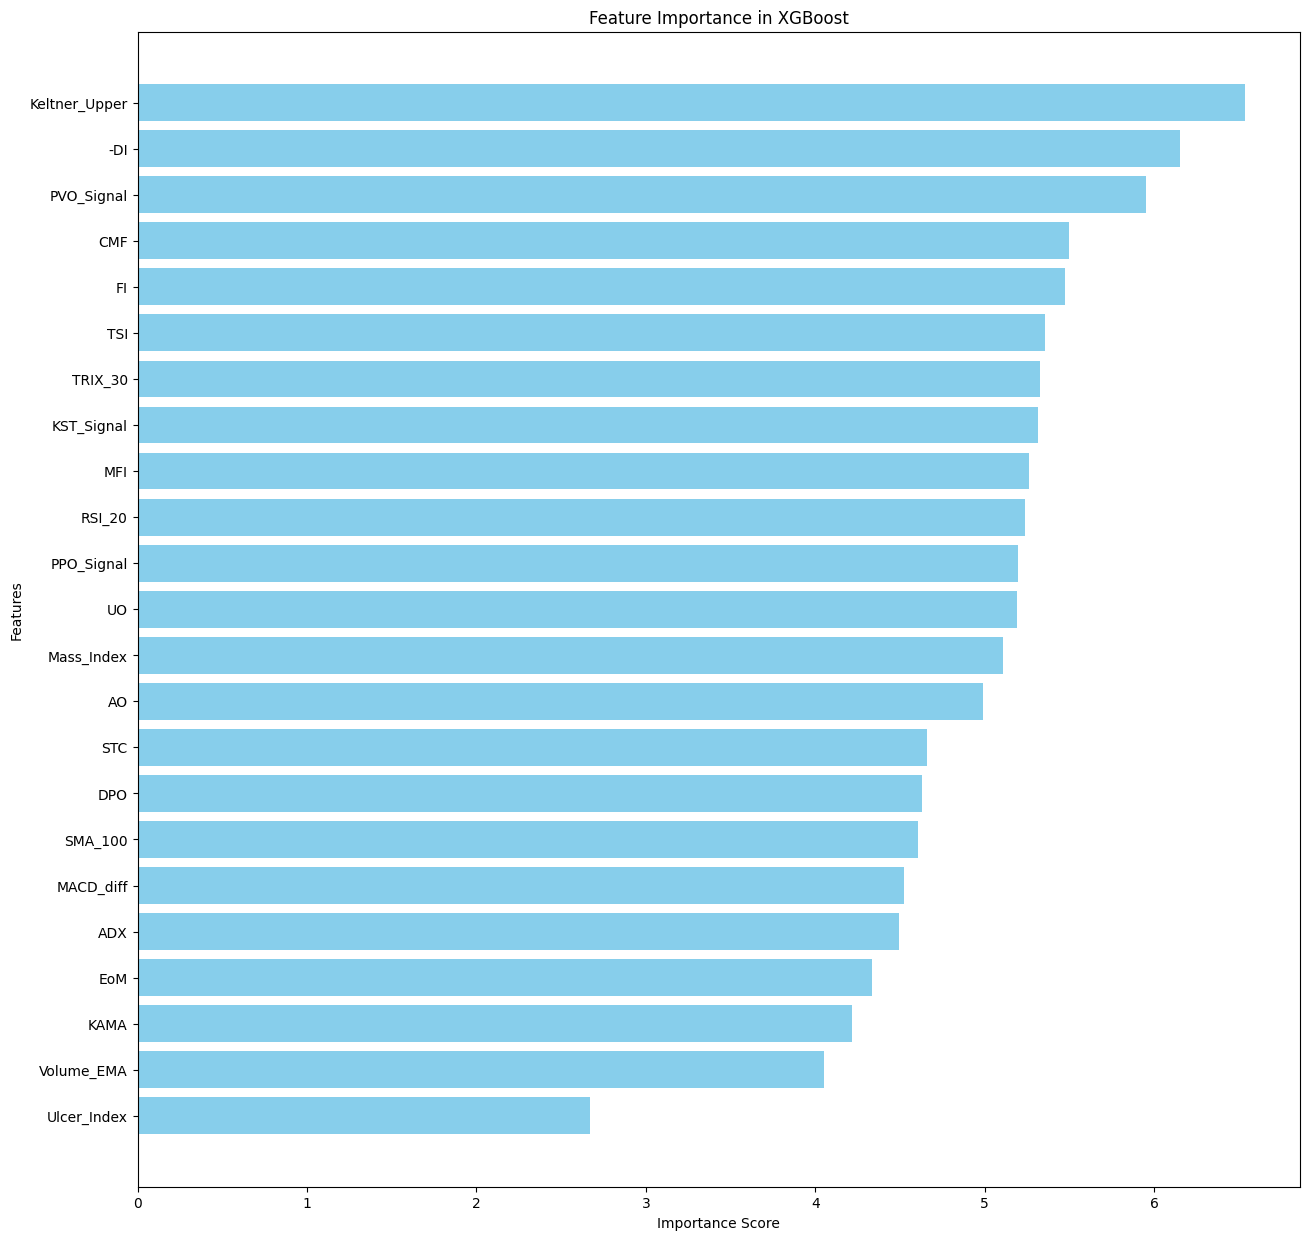

In [1772]:


# Example of feature importance
importance = model.get_booster().get_score(importance_type='gain')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted importance into feature names and their scores
features, scores = zip(*sorted_importance)

# Plotting the feature importance
plt.figure(figsize=(15, 15))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


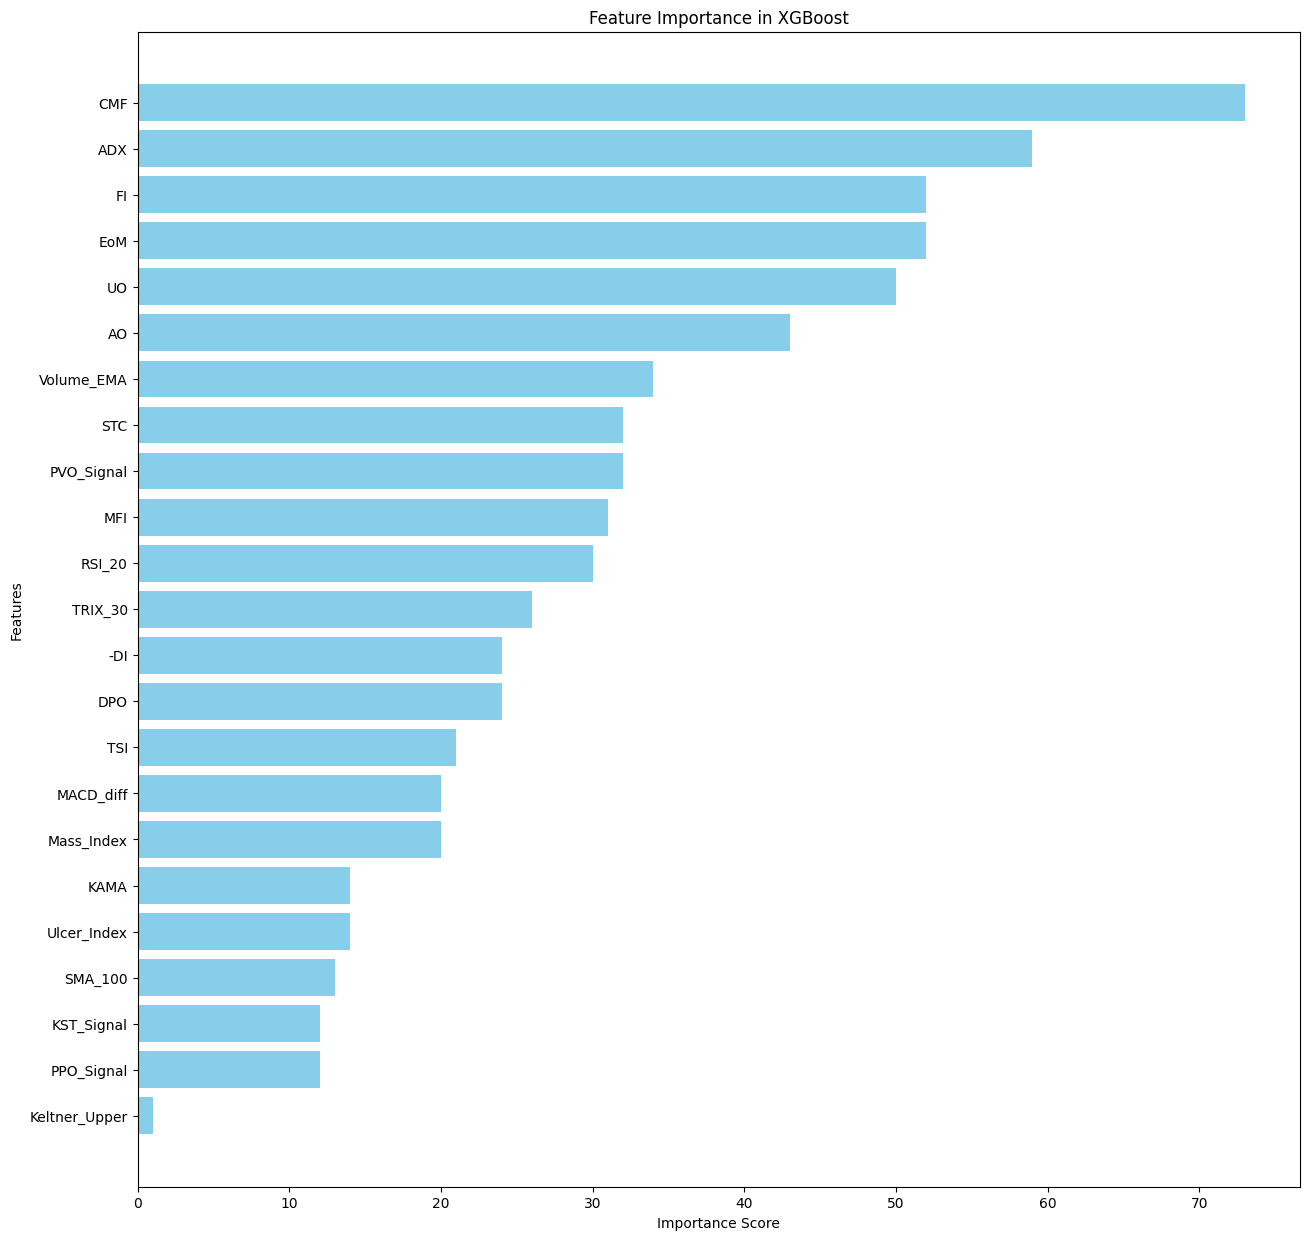

In [1773]:


# Example of feature importance
importance = model.get_booster().get_score(importance_type='weight')

# Sort features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Unzip the sorted importance into feature names and their scores
features, scores = zip(*sorted_importance)

# Plotting the feature importance
plt.figure(figsize=(15, 15))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [1774]:
#testing on test data
print(Y_test)

1522    0
1523    1
1524    0
1525    0
1526    1
       ..
1821    0
1822    1
1823    0
1824    0
1825    0
Name: Trade_Calls, Length: 304, dtype: int64


In [1775]:
print(model.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 0 0]


**WIN RATIO ON TEST DATA**

In [1776]:
print((np.sum(model.predict(X_test)==Y_test))/len(Y_test))

0.48026315789473684


In [1777]:
y_pred=model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]==0:
        y_pred[i]=-1
print(y_pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1]


In [1778]:
print(np.sum(y_pred*R_test))

-0.8813313348193594


In [1779]:
test_results=y_pred*R_test
cum_test_results=np.cumsum(test_results)
cum_test_returns=np.cumsum(R_test)
cum_test_results=np.exp(cum_test_results)-1
cum_test_returns=np.exp(cum_test_returns)-1
print(cum_test_results)
print(cum_test_returns)

1522   -0.078463
1523   -0.071652
1524   -0.095774
1525   -0.105039
1526   -0.087774
          ...   
1821   -0.588737
1822   -0.586464
1823   -0.587401
1824   -0.585769
1825   -0.585769
Name: Log_Returns, Length: 304, dtype: float64
1522   -0.078463
1523   -0.071652
1524   -0.095774
1525   -0.105039
1526   -0.087774
          ...   
1821   -0.610138
1822   -0.607984
1823   -0.608871
1824   -0.610412
1825   -0.610412
Name: Log_Returns, Length: 304, dtype: float64


**CUMULATIVE RESULTS ON TEST DATA ARE -61.04 %, THIS IS PRIMARILY DUE TO OVERFITTING AND HIGH IMBALANCE IN TRAIN TEST DATA , THE MODEL WILL PERFORM BETTER ON LARGER BACKTESTING DATA**

In [1780]:
print(len(X_test))

304


In [1781]:
# import matplotlib.pyplot as plt

# # Plot both cum_returns and cum_results
# plt.figure(figsize=(10, 6))

# # Plot cum_returns
# plt.plot(cum_test_returns, label='Cumulative Returns of bitcoin ', color='blue')

# # Plot cum_results
# plt.plot(cum_test_results, label='Cumulative Returns of our strategy', color='green')

# # Adding labels, title, and legend
# plt.title('Cumulative Returns Over Time')
# plt.xlabel('Time')
# plt.ylabel('Cumulative Value')

# # Optional: Show grid
# plt.grid(True)

# # Add legend to distinguish between the two lines
# plt.legend()

# # Show the plot
# plt.show()


In [1782]:
#testing training data returns

In [1783]:
print(Y_train)

0       1
1       1
2       1
3       1
4       1
       ..
1364    0
1365    0
1366    1
1367    1
1368    1
Name: Trade_Calls, Length: 1369, dtype: int64


In [1784]:
print(model.predict(X_train))

[1 1 1 ... 1 1 1]


**WIN RATIO ON TRAIN DATA IS HIGH DUE TO OVERFITTING**

In [1785]:
print((np.sum(model.predict(X_train)==Y_train))/len(Y_train))

0.6128560993425858


In [1786]:
y_pred_train=model.predict(X_train)
for i in range(len(y_pred)):
    if y_pred_train[i]==0:
        y_pred_train[i]=-1
print(y_pred_train)

[1 1 1 ... 1 1 1]


In [1787]:
print(np.sum(y_pred_train*R_train))

3.87646436346741


In [1788]:
train_results=y_pred_train*R_train
cum_train_results=np.cumsum(train_results)
cum_train_returns=np.cumsum(R_train)
cum_train_results=np.exp(cum_train_results)-1
cum_train_returns=np.exp(cum_train_returns)-1
print(cum_train_results)
print(cum_train_returns)

0        0.100241
1        0.110624
2        0.116866
3        0.251302
4        0.264033
          ...    
1364    41.430375
1365    40.056452
1366    40.693063
1367    42.955122
1368    47.253307
Name: Log_Returns, Length: 1369, dtype: float64
0       0.100241
1       0.110624
2       0.116866
3       0.251302
4       0.264033
          ...   
1364    2.113922
1365    2.013091
1366    2.059812
1367    2.225822
1368    2.541261
Name: Log_Returns, Length: 1369, dtype: float64


****

In [1789]:
print(len(X_train))

1369


In [1790]:
# import matplotlib.pyplot as plt

# # Plot both cum_returns and cum_results
# plt.figure(figsize=(10, 6))

# # Plot cum_returns
# plt.plot(cum_train_returns, label='Cumulative Returns of bitcoin', color='blue')

# # Plot cum_results
# plt.plot(cum_train_results, label='Cumulative Returns of our Strategy ', color='green')

# # Adding labels, title, and legend
# plt.title('Cumulative Returns Over Time')
# plt.xlabel('Time')
# plt.ylabel('Cumulative Value')

# # Optional: Show grid
# plt.grid(True)

# # Add legend to distinguish between the two lines
# plt.legend()

# # Show the plot
# plt.show()


In [1791]:
# !pip install -U vectorBT

In [1792]:
# import vectorbt as vbt

In [1793]:
# Close_prices = df['Close']
# signals =np.where(model.predict(df2)>0,1,0)
# signals = np.where(model.predict(df2)<0,-1,signals)
# portfolio = vbt.Portfolio.from_signals(Close_prices,
#                                        entries = (signals==1),
#                                        exits = (signals==-1),
#                                        freq = '1D',
#                                        fees=0.001,
#                                        slippage = 0.002,
#                                        sl_stop = 0.03,
#                                        tp_stop= 0.05,
#                                        init_cash=100000

#                                        )
# print(portfolio.stats())

In [1794]:
print(Log_Returns2)
backtesting_prediction=model.predict(df2)
for i in range(len(backtesting_prediction)):
    if backtesting_prediction[i]==0:
        backtesting_prediction[i]=-1
print(backtesting_prediction)
backtesting_result=backtesting_prediction*Log_Returns2    #signifies log_returns of strategy
print(backtesting_result)

0      0.004229
1     -0.000092
2      0.010818
3     -0.001688
4      0.007408
         ...   
644   -0.008355
645   -0.001362
646   -0.025525
647   -0.006418
648    0.000000
Name: Log_Returns, Length: 649, dtype: float64
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1 -1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  

**WIN RATIO ON BACKTESTING RESULT=0.53**

In [1795]:
print(np.sum(backtesting_prediction*Log_Returns2>0)/len(backtesting_prediction))

0.5331278890600925


In [1796]:
print(np.sum(backtesting_result))

1.408085498795347


In [1797]:
print(len(df2))

649


In [1798]:
cum_log_results=np.cumsum(backtesting_result)  #signifies cumulative log returns of strategy
results=np.exp(backtesting_result)-1           #signifies daily returns of strategy
print(results)
cum_results=np.exp(cum_log_results)-1          #signifies cumulative returns of strategy
print(cum_log_results)
print(cum_results)

0      0.004238
1     -0.000092
2      0.010876
3     -0.001687
4      0.007435
         ...   
644   -0.008320
645   -0.001361
646   -0.025202
647   -0.006397
648    0.000000
Name: Log_Returns, Length: 649, dtype: float64
0      0.004229
1      0.004137
2      0.014954
3      0.013266
4      0.020674
         ...   
644    1.441390
645    1.440028
646    1.414503
647    1.408085
648    1.408085
Name: Log_Returns, Length: 649, dtype: float64
0      0.004238
1      0.004145
2      0.015067
3      0.013354
4      0.020889
         ...   
644    3.226567
645    3.220815
646    3.114442
647    3.088121
648    3.088121
Name: Log_Returns, Length: 649, dtype: float64


**CUMULATIVE PORTFOLIO RETURN OF THE STRATEGY ON BEACKTESTING DATA OF 649 DAYS IS 308.8%**

In [1799]:
monthly_log_returns=[]
j=0
for i in range(len(cum_log_results)):
    if i%30==0:
        monthly_log_returns.append(cum_log_results[i]-cum_log_results[j])
        j=i
monthly_returns=np.exp(monthly_log_returns)-1
print(monthly_returns)
print(np.mean(monthly_returns))
print(np.std(monthly_returns))

[ 0.          0.42144419 -0.05788804  0.26213283  0.0160138   0.0008688
  0.15269966 -0.04456235 -0.0414295  -0.00768234  0.28334056  0.14564423
  0.12746338 -0.01125468  0.30476033  0.27683344 -0.02433227  0.12269991
 -0.09864863  0.06408871 -0.16084685 -0.01291182]
0.07811060666906672
0.1485835475312997


In [1800]:
monthly_sharpe_ratio=np.sqrt(12)*np.mean(monthly_returns)/np.std(monthly_returns)
print(monthly_sharpe_ratio)

1.8210837149698855


**THE ANNUALISED SHARPE RATIO OF THE STRATEGY IS 1.82**

In [1801]:
max=0
max_array=[]
for i in range(len(cum_log_results)):
    if cum_log_results[i]>max:
        max=cum_log_results[i]
        max_array.append([i,max])
print(max_array)

[[0, 0.0042290284164013415], [2, 0.014954295955164648], [4, 0.020673670840690564], [6, 0.027527716704705787], [7, 0.03477730004765783], [8, 0.04869431477779137], [9, 0.07716884512523442], [10, 0.1271439930163335], [11, 0.18158094144230774], [12, 0.23393060402957394], [14, 0.24280612563324352], [18, 0.31102652965373667], [19, 0.3148073221024465], [21, 0.3232680898569694], [23, 0.331117067706804], [27, 0.35884747357881375], [44, 0.3816541182228152], [46, 0.39122203804956135], [47, 0.3947064847294417], [49, 0.4009031509912945], [73, 0.4094945291246946], [74, 0.49743092621687046], [76, 0.5192214926638804], [78, 0.5266365601563631], [80, 0.5336768885610738], [86, 0.5355308858572717], [88, 0.5389239531629113], [98, 0.5782778710136695], [99, 0.59900875448047], [101, 0.6032836822222566], [102, 0.6071862298833915], [157, 0.6095133650719341], [158, 0.609664357127774], [159, 0.6343776951572127], [160, 0.6373921651074221], [165, 0.6535311361793428], [167, 0.6536511012074033], [168, 0.6703073443363

In [1802]:
max_drawdown = 0
for i in range(len(max_array)):
    current_min=max_array[i][1]
    drawdown=0
    end_idx=len(cum_log_results)-1 if i==len(max_array)-1 else max_array[i+1][0]
    for j in range(max_array[i][0],end_idx+1):
        if cum_log_results[j]<current_min:
            current_min=cum_log_results[j]
            drawdown=max_array[i][1]-current_min
    if drawdown>max_drawdown:
        max_drawdown=drawdown
max_drawdown=np.exp(max_drawdown)-1
print(max_drawdown)


0.5464875925058943


**THE MAXIMUM DRAWDOWN OF THE STRATEGY IS 54% WHICH IS HIGH DENOTING THAT OUR STRATEGY IS RISKY EVEN THOUGH RISK IS COMPENSATED BY REWARD AS DENOTED BY THE SHARPE RATIO VALUE**

In [1803]:
cum_log_returns=np.cumsum(Log_Returns2)
cum_returns=np.exp(cum_log_returns)-1
print(cum_log_returns)
print(cum_returns)

0      0.004229
1      0.004137
2      0.014954
3      0.013266
4      0.020674
         ...   
644    1.322145
645    1.320783
646    1.295258
647    1.288840
648    1.288840
Name: Log_Returns, Length: 649, dtype: float64
0      0.004238
1      0.004145
2      0.015067
3      0.013354
4      0.020889
         ...   
644    2.751460
645    2.746355
646    2.651938
647    2.628576
648    2.628576
Name: Log_Returns, Length: 649, dtype: float64


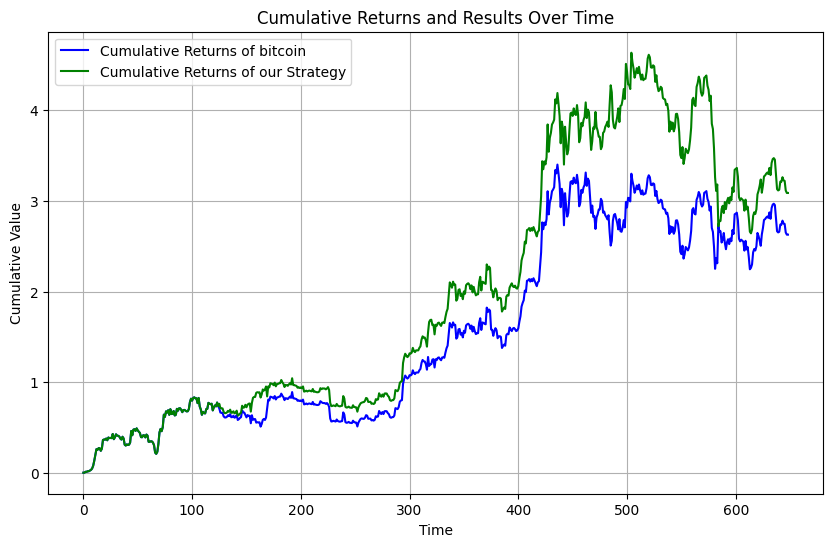

In [1804]:
import matplotlib.pyplot as plt

# Plot both cum_returns and cum_results
plt.figure(figsize=(10, 6))

# Plot cum_returns
plt.plot(cum_returns, label='Cumulative Returns of bitcoin', color='blue')

# Plot cum_results
plt.plot(cum_results, label='Cumulative Returns of our Strategy', color='green')

# Adding labels, title, and legend
plt.title('Cumulative Returns and Results Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')

# Optional: Show grid
plt.grid(True)

# Add legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()


# New Section

**WE USE A NEW APPROACH FOR RISK MANAGEMENT OF OUR STRATEGY BY USING XGBREGRESSOR INSTEAD OF CLASSIFIER AND THEN CHOOSING A LONG SHORT SPLIT BASED ON T-DISTRIBUTION PROBABILITY DENSITY**

In [1805]:
from xgboost import XGBRegressor

In [1806]:
model_2=XGBRegressor()

In [1807]:
opt = BayesSearchCV(estimator=model,
                    search_spaces=param_space,
                    n_iter=32,   # Number of optimization steps
                    cv=3,        # Cross-validation splits
                    verbose=0,
                    n_jobs=-1,   # Use all cores
                    random_state=42)

In [1808]:
# opt.fit(X_train,R_train)
# print("Best parameters found: ", opt.best_params_)
# print("Best score: ", opt.best_score_)

In [1809]:
model_2=XGBRegressor(
     alpha=0.01,
    colsample_bytree=0.3,
    reg_lambda=2,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=1,
    random_state=42,  # Setting the random state for reproducibility
    use_label_encoder=False,  # To avoid warnings    # Set evaluation metric
)
model_2.fit(X_train,R_train,verbose=True,eval_set=[(X_train,R_train),(X_test,R_test)])

[0]	validation_0-rmse:0.04120	validation_1-rmse:0.03360
[1]	validation_0-rmse:0.04119	validation_1-rmse:0.03360
[2]	validation_0-rmse:0.04118	validation_1-rmse:0.03360
[3]	validation_0-rmse:0.04117	validation_1-rmse:0.03360
[4]	validation_0-rmse:0.04115	validation_1-rmse:0.03362
[5]	validation_0-rmse:0.04114	validation_1-rmse:0.03362
[6]	validation_0-rmse:0.04113	validation_1-rmse:0.03362
[7]	validation_0-rmse:0.04111	validation_1-rmse:0.03362
[8]	validation_0-rmse:0.04110	validation_1-rmse:0.03361
[9]	validation_0-rmse:0.04108	validation_1-rmse:0.03361
[10]	validation_0-rmse:0.04107	validation_1-rmse:0.03361
[11]	validation_0-rmse:0.04106	validation_1-rmse:0.03361
[12]	validation_0-rmse:0.04104	validation_1-rmse:0.03360
[13]	validation_0-rmse:0.04103	validation_1-rmse:0.03360
[14]	validation_0-rmse:0.04102	validation_1-rmse:0.03360
[15]	validation_0-rmse:0.04101	validation_1-rmse:0.03360
[16]	validation_0-rmse:0.04100	validation_1-rmse:0.03360
[17]	validation_0-rmse:0.04098	validation

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[53]	validation_0-rmse:0.04058	validation_1-rmse:0.03358
[54]	validation_0-rmse:0.04057	validation_1-rmse:0.03358
[55]	validation_0-rmse:0.04056	validation_1-rmse:0.03358
[56]	validation_0-rmse:0.04055	validation_1-rmse:0.03358
[57]	validation_0-rmse:0.04054	validation_1-rmse:0.03360
[58]	validation_0-rmse:0.04053	validation_1-rmse:0.03360
[59]	validation_0-rmse:0.04052	validation_1-rmse:0.03360
[60]	validation_0-rmse:0.04051	validation_1-rmse:0.03360
[61]	validation_0-rmse:0.04050	validation_1-rmse:0.03360
[62]	validation_0-rmse:0.04049	validation_1-rmse:0.03360
[63]	validation_0-rmse:0.04048	validation_1-rmse:0.03361
[64]	validation_0-rmse:0.04047	validation_1-rmse:0.03361
[65]	validation_0-rmse:0.04046	validation_1-rmse:0.03361
[66]	validation_0-rmse:0.04045	validation_1-rmse:0.03363
[67]	validation_0-rmse:0.04044	validation_1-rmse:0.03362
[68]	validation_0-rmse:0.04042	validation_1-rmse:0.03362
[69]	validation_0-rmse:0.04041	validation_1-rmse:0.03362
[70]	validation_0-rmse:0.04041	

XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

**Using t-distribution **

In [1810]:
# import random
# import numpy as np
# from scipy import stats
# a = np.linspace(30,100,71)
# print(a)
# maximum= -1

# log_returns_list = log_returns.tolist()
# del log_returns_list[0]
# sample_values=[]
# for iterations in range(1,51):
#     for i in a:
#         i = int(i)
#         sample = random.sample(log_returns_list,i)
#         #print(sample)
#         df_est,loc,scale=stats.t.fit(sample)
#         ks_stat,p_value=stats.kstest(sample,'t', args=(df_est,loc,scale))
#         #print(p_value)
#         if p_value>maximum:

#             best_value=i
#             maximum=p_value

#     #print(best_value)

#     sample_values.append(best_value)
# #print(sample_values)

# #len(sample_values)
# Optimum_sample_size = np.mean(sample_values)
# print(Optimum_sample_size)



Ideal Sample Size: 38

In [1811]:
# random_sample=random.sample(log_returns_list,int(Optimum_sample_size))
# print(random_sample)
# a,b,c = stats.t.fit(random_sample)
# print(a)
# print(b)
# print(c)
# ks_stat,p_value = stats.kstest(random_sample,'t',args=(a,b,c))
# print(p_value)


parameters of t_distribution found to be:
a=0.0002167201883039903
b=0.027202880022048473
c=0.9415385878297772
p_value=0.94

**NOTE THAT P_VALUE DENOTES WHAT RATIO OF RANDOM SAMPLES OF SIZE 38 FOLLOW T-DISTRIBUTION MORE CLOSELY THAN NORMAL DISTRIBUTION SO HIGH P_VALUE OF 0.94 DENOTES THIS RANDOM SAMPLE SIZE DATA MORE CLOSELY FOLLOWS T-DISTRIBUTION **

In [1812]:
a=0.0002167201883039903
b=0.027202880022048473
c=0.9415385878297772

In [1813]:
from scipy.stats import t

**HERE WE DIVIDE THE PREDICTED LOG RETURNS OF THE MODEL WITH IT'S PROBABILITY DENSITY FUNCTION  BASED ON WHICH WE MAKE OUR PREDICTION **

In [1814]:
y_pred=model_2.predict(X_test)
pdf_t=t.pdf(y_pred,a,b,c)
output=y_pred/pdf_t
print(output)

[ 3.54257072e-02 -1.08027519e-01 -5.64489890e-01 -5.35361129e-01
 -4.81161982e-01 -3.65487038e-01 -1.08128196e-01  1.58038313e-01
 -2.71752346e-01 -3.58753485e-01 -2.41877040e-01 -2.08751972e-01
  3.13371628e-02 -2.74919031e-01 -1.56239840e-01  2.97220252e-01
  2.08761655e-01  1.70724218e-01 -1.70864633e-01  7.94260819e-02
  5.77598474e-01  1.05347615e+00  4.51764290e-01  5.34070443e-01
  5.32866743e-01  7.80746070e-01  7.80746070e-01  5.84471153e-01
  5.72989425e-01  7.80777893e-01  6.24709589e-01  6.09623922e-01
  4.42861259e-01  6.58113382e-01  3.15198746e-01  1.31545697e-01
  6.38259884e-01  1.69006634e-01  6.19503104e-01  8.78566585e-01
  6.77535433e-01  9.77282678e-01  9.77282678e-01  9.30011365e-01
  1.01273834e+00  1.19991969e+00  4.75288677e-01 -7.23717630e-02
  1.86933228e-01  5.86441194e-01  1.00176731e+00  7.24926023e-01
  6.46934683e-01  8.36740282e-03  6.38523348e-01  2.50639440e-01
  2.46190882e-02  2.67125862e-01  7.59870375e-01 -7.38025239e-01
  2.63471058e-01  6.32681

**WE USE SIGMOID FUNCTION WITH W=10 TO TRANSFORM OUR EXPECTED RETURNS TO A VALUE BETWEEN 0 AND 1 , 0 SIGNIFYING PURE SHORT AND 1 SIGNIFYING PURE LONG WHILE 0.5 SIGNIFIES NO DECISIVE TRADE SINCE EXPECTED RETURNS ARE ZERO**

In [1815]:
def sigmoid(x,w):
    return 1 / (1 + np.exp(-w*x))

In [1816]:
w=[0.01,0.1,1,10,100,1000,10000,100000,1000000]
for i in w:
    y=sigmoid(output,i)
    print(i)
    print(y)

0.01
[0.50008856 0.49972993 0.49858878 0.4986616  0.4987971  0.49908628
 0.49972968 0.5003951  0.49932062 0.49910312 0.49939531 0.49947812
 0.50007834 0.4993127  0.4996094  0.50074305 0.5005219  0.50042681
 0.49957284 0.50019857 0.50144399 0.50263367 0.50112941 0.50133517
 0.50133216 0.50195186 0.50195186 0.50146117 0.50143247 0.50195193
 0.50156177 0.50152406 0.50110715 0.50164528 0.500788   0.50032886
 0.50159564 0.50042252 0.50154875 0.5021964  0.50169383 0.50244319
 0.50244319 0.50232501 0.50253182 0.50299976 0.50118822 0.49981907
 0.50046733 0.5014661  0.5025044  0.50181231 0.50161733 0.50002092
 0.5015963  0.5006266  0.50006155 0.50066781 0.50189967 0.49815495
 0.50065868 0.5015817  0.5003728  0.5023262  0.50198377 0.50114839
 0.50305331 0.50491753 0.50367616 0.5054167  0.50554573 0.50507749
 0.50405546 0.5041434  0.50381445 0.50507044 0.50486419 0.50330087
 0.50514023 0.50306652 0.50201769 0.50205999 0.50128561 0.50096386
 0.50083531 0.50118046 0.50108784 0.50074223 0.50153361 0

<ipython-input-1815-18bd8d8e60b6>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-w*x))


In [1817]:
#we choose w=10

In [1818]:
    w=10
    y=sigmoid(output,w)
    log_returns=np.array(R_test)
    cum_logreturn=np.cumsum((y-(1-y))*log_returns)
    print(cum_logreturn)

[-1.43241754e-02 -1.79556405e-02  8.18687320e-03  1.83890263e-02
 -4.10904214e-04 -7.64893277e-02 -4.62505676e-02 -5.78890761e-02
 -6.02797918e-02 -3.43327494e-02 -7.26871858e-02 -6.68195970e-02
 -5.96888000e-02 -5.56374664e-02 -6.84154159e-02 -5.98309684e-02
 -7.69142034e-02 -8.02856846e-02 -1.02308498e-01 -9.74473724e-02
 -7.40427824e-02 -6.46156923e-02 -6.09169404e-02 -1.08390202e-02
 -9.87749523e-03  3.04711125e-03 -5.36490883e-03 -3.88440376e-02
 -2.38999485e-02 -3.22567941e-02 -1.96319945e-02 -1.58889245e-02
 -3.77544098e-02 -9.25132842e-02 -8.52716087e-02 -1.01371379e-01
 -8.95324341e-02 -9.83728587e-02 -1.66318909e-01 -1.48433245e-01
 -1.24121645e-01 -1.54966384e-01 -1.38851866e-01 -1.43091432e-01
 -1.60788975e-01 -1.32250635e-01 -1.16067953e-01 -1.14888331e-01
 -1.29826898e-01 -1.48930549e-01 -1.57468269e-01 -1.55937690e-01
 -1.31117602e-01 -1.33726774e-01 -1.02211322e-01 -9.14296379e-02
 -9.50504610e-02 -1.16323645e-01 -9.51522487e-02 -9.61076661e-02
 -1.13640888e-01 -6.30118

In [1819]:
y_pred=model_2.predict(X_train)
pdf_t=t.pdf(y_pred,a,b,c)
output=y_pred/pdf_t
y=sigmoid(output,w)
log_returns=np.array(R_train)
cum_logreturn=np.cumsum((y-(1-y))*log_returns)
print(cum_logreturn)

[ 0.09552897  0.1049214   0.11052579 ... 14.63303772 14.68441156
 14.77639361]


In [1820]:
print(Log_Returns2)
backtesting_prediction=model_2.predict(df2)
print(backtesting_prediction)
pdf_t=t.pdf(backtesting_prediction,a,b,c)
backtesting_prediction=backtesting_prediction/pdf_t
y=sigmoid(backtesting_prediction,w)
backtesting_result=(y-(1-y))*Log_Returns2    #signifies log_returns of strategy
print(backtesting_result)

0      0.004229
1     -0.000092
2      0.010818
3     -0.001688
4      0.007408
         ...   
644   -0.008355
645   -0.001362
646   -0.025525
647   -0.006418
648    0.000000
Name: Log_Returns, Length: 649, dtype: float64
[ 3.45510361e-03  3.45510361e-03  3.45510361e-03  3.45510361e-03
  3.45510361e-03  7.39010400e-04 -1.29423093e-03 -1.29423093e-03
 -1.29423093e-03 -5.51947067e-03 -5.90252085e-03 -5.90252085e-03
 -5.66805853e-03 -5.99289779e-03 -7.28581753e-03 -7.28581753e-03
 -7.28581753e-03 -7.85106141e-03 -7.84348045e-03 -2.14587362e-03
 -7.83698168e-03 -8.06119759e-03 -7.95955677e-03 -6.59460668e-03
 -4.47251694e-03 -4.52592270e-03 -2.99663702e-03 -2.83501204e-03
 -3.70975723e-03 -4.02061455e-03 -3.22060660e-03 -2.99639069e-03
 -3.44208581e-03 -3.15872300e-03 -2.93450709e-03 -3.32400110e-03
 -3.08564049e-03 -1.58649217e-03 -2.66979658e-03 -8.42391571e-04
  1.81554089e-04  1.74894102e-03  2.29024002e-03  1.86833437e-03
  2.73595145e-03  1.84964086e-03  2.69289222e-03  1.27824314e-

In [1821]:
cumulative_log_results=np.cumsum(backtesting_result)
cumulative_results=np.exp(cumulative_log_results)-1
print(cumulative_results)

0      0.004237
1      0.004144
2      0.015062
3      0.013350
4      0.020882
         ...   
644    1.347666
645    1.350865
646    1.411643
647    1.427170
648    1.427170
Name: Log_Returns, Length: 649, dtype: float64


**USING THIS MODEL WE GET CUMULATIVE RETURNS OF 142.5% ON BACKTESTING DATA OF 649 WHICH IS SMALL BUT THE CORRESPONDING RISK IS LOWERED AS EXPLAINED FURTHER , HENCE A RISK AVERSE WILL CHOOSE SUCH A MODEL WITHOUT INVESTING FULL AMOUNT AT ONCE AND CHOOSING A LONG SHORT SPLIT **

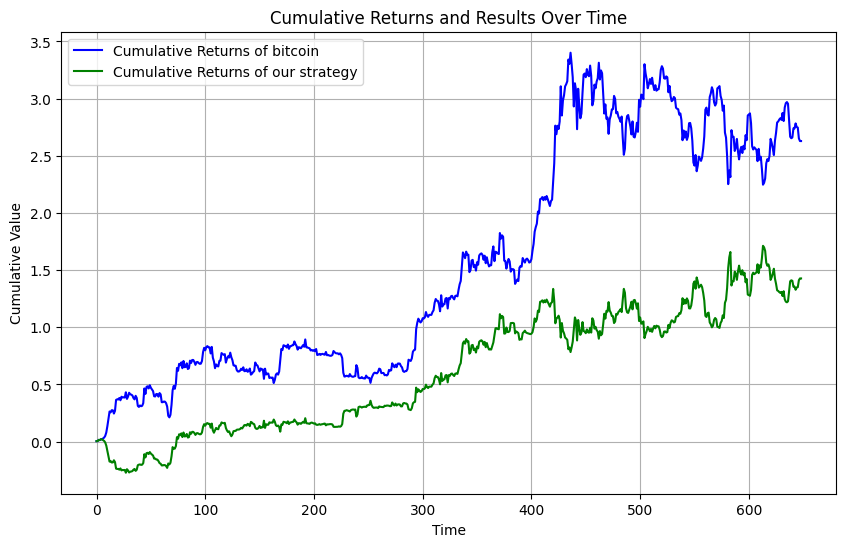

In [1822]:
import matplotlib.pyplot as plt

# Plot both cum_returns and cum_results
plt.figure(figsize=(10, 6))

# Plot cum_returns
plt.plot(cum_returns, label='Cumulative Returns of bitcoin', color='blue')

# Plot cum_results
plt.plot(cumulative_results, label='Cumulative Returns of our strategy', color='green')

# Adding labels, title, and legend
plt.title('Cumulative Returns and Results Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')

# Optional: Show grid
plt.grid(True)

# Add legend to distinguish between the two lines
plt.legend()

# Show the plot
plt.show()


In [1823]:
monthly_log_returns=[]
j=0
for i in range(len(cumulative_log_results)):
    if i%30==0:
        monthly_log_returns.append(cumulative_log_results[i]-cumulative_log_results[j])
        j=i
monthly_returns=np.exp(monthly_log_returns)-1
print(monthly_returns)
print(np.mean(monthly_returns))
print(np.std(monthly_returns))

[ 0.         -0.27274744  0.08450268  0.35722321  0.02092415  0.0361628
  0.03063325 -0.01202736  0.06823475  0.05892816  0.1151981   0.09191072
  0.14649061  0.03755778  0.23105145 -0.16581658  0.09495208 -0.06923691
  0.10944525 -0.06022873  0.1020173   0.01224155]
0.0462462199535137
0.12403934693233525


In [1824]:
monthly_sharpe_ratio=np.sqrt(12)*np.mean(monthly_returns)/np.std(monthly_returns)
print(monthly_sharpe_ratio)

1.2915386060712999


**THE SHARPE RATIO IS FOUND TO BE 1.29 WHICH SAYS THAT THE RETURNS ARE SIGNIFICANT COMPARED TO THE AMOUNT OF RISK**

In [1825]:
max=0
max_array=[]
for i in range(len(cumulative_log_results)):
    if cumulative_log_results[i]>max:
        max=cumulative_log_results[i]
        max_array.append([i,max])
print(max_array)

[[0, 0.004227715021712087], [2, 0.01494965165133049], [4, 0.020667250290432676], [74, 0.03855845086210925], [76, 0.06231183291889582], [78, 0.06975863825598756], [80, 0.07677882187596216], [86, 0.07874128515901493], [88, 0.08214248962843228], [98, 0.12152945683800523], [99, 0.14224927904094023], [101, 0.14652149071047996], [102, 0.15042368601459868], [115, 0.15550782738828686], [142, 0.1592172860564183], [154, 0.16785707809943537], [163, 0.17654979180703542], [182, 0.17695657911117066], [192, 0.18647557015438607], [227, 0.2185603008444596], [228, 0.23834595832605315], [229, 0.2395874007484293], [230, 0.24300653027336502], [234, 0.24354630068309144], [235, 0.24645755846817502], [236, 0.2478313985567931], [241, 0.2636974777887313], [242, 0.26723893796236187], [249, 0.2757726861705454], [250, 0.2764432390278245], [251, 0.2784322698723124], [252, 0.3058053088952887], [294, 0.38675180909830087], [303, 0.40421628356639544], [310, 0.4113204026292101], [311, 0.4415186362612924], [312, 0.455001

In [1826]:
max_drawdown = 0
for i in range(len(max_array)):
    current_min=max_array[i][1]
    drawdown=0
    end_idx=len(cumulative_log_results)-1 if i==len(max_array)-1 else max_array[i+1][0]
    for j in range(max_array[i][0],end_idx+1):
        if cumulative_log_results[j]<current_min:
            current_min=cumulative_log_results[j]
            drawdown=max_array[i][1]-current_min
    if drawdown>max_drawdown:
        max_drawdown=drawdown
max_drawdown=np.exp(max_drawdown)-1
print(max_drawdown)

0.4019549551543926


**SUCH A STRATEGY HAS A MUCH LOWER DRAWDOWN OF 40% COMPARED TO PURE LONG-SHORT STRATEGY**